# Analyse NEUC transport in INALT20 and observation along 23$^{\circ}$W

![](../figures/INALT20_obs_23w_comparison/1_INALT20_obs_23w_1999_2012.png)

Boundary condition for along pathway algorithm

| var         | EUC                   | NEUC                   | SEUC                   | NECC                  | nSECu                | nSECl                 |
| ----------- | ----------------------| ---------------------- | ---------------------- | ----------------------| -------------------- | --------------------- |
|$ Z_{U} $    | $0\,$kg$\,$m$^{-3}$   | $24.5\,$kg$\,$m$^{-3}$ | $24.5\,$kg$\,$m$^{-3}$ | $0\,$kg$\,$m$^{-3}$   | $0\,$kg$\,$m$^{-3}$  | $24.5\,$kg$\,$m$^{-3}$|
|$ Z_{L} $    | $26.8\,$kg$\,$m$^{-3}$| $26.8\,$kg$\,$m$^{-3}$ | $27.0\, $kg$\,$m$^{-3}$| $24.5\,$kg$\,$m$^{-3}$|$24.5\,$kg$\,$m$^{-3}$|$26.8\,$kg$\,$m$^{-3}$ |
|$ Y_{S} $    | $1.2^{\circ}$S        | $3.5^{\circ}$N         | $6^{\circ}$S           | $4^{\circ}$N          | $0^{\circ}$          | $0^{\circ}$           |
|$ Y_{N} $    | $1.2^{\circ}$N        | $6.0^{\circ}$N         | $4^{\circ}$S           | $10^{\circ}$N         | $5^{\circ}$N         | $4^{\circ}$N          |
|$ W $        | 2$^{\circ}$           | 2$^{\circ}$            | 2$^{\circ}$            | 3.5$^{\circ}$         | $2^{\circ}$          | $2^{\circ}$           |
|$ Y_{CM}-W $ | 3$^{\circ}$S          | 2.5$^{\circ}$N         | 6$^{\circ}$S (model 7$^{\circ}$S) | 2.5$^{\circ}$N| $0^{\circ}$S      | $0 ^{\circ}$          |
|$ Y_{CM}+W $ | 2.5$^{\circ}$N        | 8$^{\circ}$N           | 3$^{\circ}$S           | 10$^{\circ}$N         | $6^{\circ}$N         | $5 ^{\circ}$N         |

$Z_u$ ($Z_l$) is upper (lower) boundary of the flow, and $Y_N$ ($Y_S$) is the northern (southern) limit of the current core, $ W $ is half mean width of current, $ Y_{CM}+W $ ($ Y_{CM}-W $) is the northern (southern) absolut limit for the flow integration.


 & EUC    & NEUC    & SEUC    & NECC   & nSECu & nSECl  \\
 ----------- & ----------------------& ---------------------- & ---------------------- & ----------------------& -------------------- & --------------------- \\
$ Z_{U} $    & $0\,$kg$\,$m$^{-3}$   & $24.5\,$kg$\,$m$^{-3}$ & $24.5\,$kg$\,$m$^{-3}$ & $0\,$kg$\,$m$^{-3}$   & $0\,$kg$\,$m$^{-3}$  & $24.5\,$kg$\,$m$^{-3}$\\
$ Z_{L} $    & $26.8\,$kg$\,$m$^{-3}$& $26.8\,$kg$\,$m$^{-3}$ & $27.0\, $kg$\,$m$^{-3}$& $24.5\,$kg$\,$m$^{-3}$&$24.5\,$kg$\,$m$^{-3}$&$26.8\,$kg$\,$m$^{-3}$ \\
$ Y_{S} $    & $1.2^{\circ}$S        & $3.5^{\circ}$N         & $6^{\circ}$S           & $4^{\circ}$N          & $0^{\circ}$          & $0^{\circ}$           \\
$ Y_{N} $    & $1.2^{\circ}$N        & $6.0^{\circ}$N         & $4^{\circ}$S           & $10^{\circ}$N         & $5^{\circ}$N         & $4^{\circ}$N          \\
$ W $        & 2$^{\circ}$           & 2$^{\circ}$            & 2$^{\circ}$            & 3.5$^{\circ}$         & $2^{\circ}$          & $2^{\circ}$           \\
$ Y_{CM}-W $ & 3$^{\circ}$S          & 2.5$^{\circ}$N         & 6$^{\circ}$S (model 7$^{\circ}$S) & 2.5$^{\circ}$N& $0^{\circ}$S      & $0 ^{\circ}$          \\
$ Y_{CM}+W $ & 2.5$^{\circ}$N        & 8$^{\circ}$N           & 3$^{\circ}$S           & 10$^{\circ}$N         & $6^{\circ}$N         & $5 ^{\circ}$N         \\      

## Tech preample

In [1]:
%matplotlib inline
import os
import dask
import cmocean
import datetime
import nc_time_axis
import cftime
import gsw
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cmocean as co
from pathlib import Path
from matplotlib import dates
from scipy.io import loadmat
from IPython.display import Markdown as md
import xscale.signal.fitting as xfit
import xscale.spectral.fft as xfft
from xscale.spectral.tools import plot_spectrum
from numpy.polynomial import polynomial as P

/gxfs_work/geomar/smomw294/.conda/envs/py3_std/lib/python3.9/site-packages/xscale-0.1.dev0+35.ga804866-py3.9.egg/xscale/signal/generator.py:48: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def ar(coeffs, n, c=0.):


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Dask jobqueue and client
To controle the resources used for parallel computations on computing nodes.

In [3]:
# import dask_jobqueue
# cluster = dask_jobqueue.SLURMCluster(
#     # Dask worker size
#     cores=4, memory='24GB',
#     processes=1, # Dask workers per job
#     # SLURM job script things
#     queue='cluster', walltime='01:30:00',
#     # Dask worker network and temporary storage
#     interface='ib0', local_directory='$TMPDIR',
#     log_directory='./slurm-logs'
# )

In [4]:
from dask.distributed import Client

In [5]:
# client = Client(cluster)
client = Client(n_workers=1, threads_per_worker=8, memory_limit=24e9)
client

<Client: 'tcp://127.0.0.1:40641' processes=1 threads=8, memory=22.35 GiB>

In [6]:
# cluster.adapt(
#     minimum=1, maximum=20
# )

## Output parameters

In [7]:
out_dir_fig = Path('../figures/INALT20_obs_current_transport_23W/')
Path(out_dir_fig).mkdir(parents=True, exist_ok=True)
fig_format = '.png'

savefig = 1; #set one if figures should be saved

## Input parameters
For Observations: mean section along 23$^{\circ}$W from Brandt et al 2015

In [8]:
global_data_path_obs2 = Path('../data/')
file_name_obs = '23W_ship_section/Burmeister_et_al_2021/ship_sections_23w_merged_all_mean.mat'
file_name_obs_35W = '35W_ship_section/ship_sections_35w_merged_all_mean.mat'
file_name_moor_NEUC = '23W_5N_mooring_transports/transportz_uXwidth_kpo_1090_ew_4p25n5p25n.mat'
file_name_moor_EUC = '23W_0_mooring_transports/euc_transport_2005_2019_upos_1.2NS_30_300m.mat'

For INALT20 

In [9]:
EUC_data_path = Path("../data/INALT20_EUC_calc_transport/")
NEUC_data_path = Path("../data/INALT20_NEUC_calc_transport/")
SEUC_data_path = Path("../data/INALT20_SEUC_calc_transport/")
NECC_data_path = Path("../data/INALT20_NECC_calc_transport/")
nSECu_data_path = Path("../data/INALT20_nSECu_calc_transport/")
nSECl_data_path = Path("../data/INALT20_nSECl_calc_transport/")

## Figure settings

In [10]:
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

font = {'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

## Load model output

Find relevant data files for INALT20

In [11]:
def load_model_output(data_path):
    JRA_exp_id = "INALT20.L46-KFS10?"
    CORE_exp_id = "INALT20.L46-KFS044" # INALT COREv2

    temp_res = "_5d_" # 5d:5-daily; 1m:monthly; 1y:yearly; 1d:daily(stored currently on TAPE) 
    nest_prefix = "1_" # "1_" for high resolution; leave empty for base model

    JRA_files = list(sorted(
        (data_path).glob(
            f"{nest_prefix}{JRA_exp_id}{temp_res}*transport.nc")
    ))

    CORE_files = list(sorted(
        (data_path ).glob(
            f"{nest_prefix}{CORE_exp_id}{temp_res}*transport.nc"
        )
    ))

    print(f"Found {len(CORE_files)} CORE files and {len(JRA_files)} JRA files.")
    
    ds_JRA = xr.open_mfdataset(
        JRA_files,
        combine='by_coords',
        decode_cf=True
    )
    
    ds_CORE = xr.open_mfdataset(
        CORE_files,
        combine='by_coords',
        decode_cf=True
    )
    ds_CORE.coords['time_counter']=ds_JRA.sel(time_counter=slice('1958','2009')).time_counter
    
    return ds_JRA, ds_CORE

In [12]:
%%time
EUC_JRA, EUC_CORE = load_model_output(EUC_data_path)
NEUC_JRA, NEUC_CORE = load_model_output(NEUC_data_path)
SEUC_JRA, SEUC_CORE = load_model_output(SEUC_data_path)
NECC_JRA, NECC_CORE = load_model_output(NECC_data_path)
nSECu_JRA, nSECu_CORE = load_model_output(nSECu_data_path)
nSECl_JRA, nSECl_CORE = load_model_output(nSECl_data_path)

Found 52 CORE files and 61 JRA files.
Found 52 CORE files and 61 JRA files.
Found 52 CORE files and 61 JRA files.
Found 52 CORE files and 61 JRA files.
Found 52 CORE files and 61 JRA files.
Found 52 CORE files and 61 JRA files.
CPU times: user 4.8 s, sys: 653 ms, total: 5.45 s
Wall time: 23 s


## Load observations

In [13]:
mooring = loadmat((global_data_path_obs2/file_name_moor_NEUC))

matlab_datenum = mooring['tim'].squeeze()
pd.to_datetime(matlab_datenum)
dt_time = np.empty(np.shape(matlab_datenum),np.dtype('datetime64[s]'))

for i,time in enumerate(matlab_datenum):
    dt_time[i]=pd.to_datetime(datetime.date.fromordinal(int(matlab_datenum[i]))) #+ datetime.timedelta(days=matlab_datenum[i]%1)
t_moor = dt_time
dt_time

# mooring
T = np.nansum(mooring['transportz'],axis=0)*np.diff(mooring['depth_grid'].squeeze()[:2])*1e-6

moor = xr.DataArray(T,
                     coords=[('time',t_moor)],
                     dims=['time'])
moor.name = 'NEUC transport'
moor.attrs['long_name'] = 'NEUC transport'
moor.attrs['units']='Sv'
moor_NEUC = moor

In [14]:
def jd2dt64ns(jd):
    #  function jd2dt64ns(jd)
    #  
    #  jd2dt64ns Convert Julian day to datetime64.
    #  jd2dt64ns(JD) converts decimal Julian days to datetime64
    #  dates using the astronomical convension, but with time zero starting
    #  at midnight instead of noon.  In this convention, Julian day 2440000
    #  begins at 0000 hours, May 23, 1968. A datetime64ns array
    #  is returned.
    # 
    # Kristin Burmeister, SAMS
    # adapted from Matlab routine "gregorian" by Christian Mertens, IfM Kiel 
    # version: GEOMAR SVN $Id: gregorian.m 178 2016-06-21 09:53:03Z gkrahmann@geomar.de $
    # $Revision: 178 $ $Date: 2016-06-21 10:53:03 +0100 (Tue, 21 Jun 2016) $
    # Matlab routine adapted from the FORTRAN routine `kdate' by L. Masannek, M. Hirschberg,
    # and J. Holtorff (1980)

    hh = jd%1*24;
    jd = np.fix(jd-2385859);
    yy = np.fix((4*jd - 1)/1461);
    dd = np.fix(4*jd - 1461*yy - 1);
    yy = np.fix(yy + 1820);
    dd = np.fix((dd + 4)/4);
    mm = np.fix((5*dd - 3)/153);
    dd = np.fix(5*dd - 153*mm - 3);
    dd = np.fix((dd + 5)/5);

    mm = mm + 3;
    yy[mm>12]+=1
    mm[mm>12]-=12

    date = np.column_stack((yy,mm,dd,hh,hh*0,hh*0)).astype(int)
    time_test = np.array([(datetime.datetime(y,m,d,h,mi,s))
                         for y,m,d,h,mi,s in date])
    return pd.to_datetime(time_test)

In [15]:
mooring = loadmat((global_data_path_obs2/file_name_moor_EUC))
t_moor = jd2dt64ns(mooring['euc_time'].squeeze())

moor = xr.DataArray(mooring['euc_transport'].squeeze(),
                     coords=[('time',t_moor)],
                     dims=['time'])
moor.name = 'EUC transport'
moor.attrs['long_name'] = 'EUC transport'
moor.attrs['units']='Sv'
moor_EUC = moor

In [16]:
section = loadmat((global_data_path_obs2/file_name_obs))

matlab_datenum = section['mt_sec'].squeeze().mean(0)
pd.to_datetime(matlab_datenum)
dt_time = np.empty(np.shape(matlab_datenum),np.dtype('datetime64[s]'))

for i,time in enumerate(matlab_datenum):
    dt_time[i]=datetime.date.fromordinal(int(matlab_datenum[i])) + datetime.timedelta(days=matlab_datenum[i]%1) - datetime.timedelta(days = 366)
dt_time = pd.to_datetime(dt_time)

u_array = xr.DataArray(section['u_array'],
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze()),
                             ('time',dt_time)],
                     dims=['depth','lat','time'])
u_array.name = 'u_array'
u_array.attrs['long_name'] = 'Zonal velocity'
u_array.attrs['units']='m/s'
u_array.lat.attrs['units']='degN'
u_array.lat.attrs['long_name']='Latitude'
u_array.depth.attrs['units']='m'
u_array.depth.attrs['long_name']='Depth'
v_array = xr.DataArray(section['v_array'],
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze()),
                             ('time',dt_time)],
                     dims=['depth','lat','time'])
v_array.name = 'v_array'
v_array.attrs['long_name'] = ('Meridioanl velocity')
v_array.attrs['units']='m/s'
t_array = xr.DataArray(section['t_insitu_array'],
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze()),
                             ('time',dt_time)],
                     dims=['depth','lat','time'])
t_array.name = 't_array'
t_array.attrs['long_name'] = ('Temperature')
t_array.attrs['units']='degC'
s_array = xr.DataArray(section['s_practical_array'],
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze()),
                             ('time',dt_time)],
                     dims=['depth','lat','time'])
s_array.name = 's_array'
s_array.attrs['long_name'] = ('Salinity')
s_array.attrs['units']='PSU'
o2_array = xr.DataArray(section['o_mumolkg_array'],
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze()),
                             ('time',dt_time)],
                     dims=['depth','lat','time'])
o2_array.name = 'o2_array'
o2_array.attrs['long_name'] = ('Dissolved oxygen')
o2_array.attrs['units']='mu_mol/kg'
s0_array = xr.DataArray(section['sigma0_array'],
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze()),
                             ('time',dt_time)],
                     dims=['depth','lat','time'])
s0_array.name = 's0_array'
s0_array.attrs['long_name'] = ('Potential density anomaly reference to 0m')
s0_array.attrs['units']='kg/m3'
s0_mean = xr.DataArray(section['sigma0_mean'],
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze())],
                     dims=['depth','lat'])
s0_mean.name = 's0_mean'
s0_mean.attrs['long_name'] = ('Potential density anomaly reference to 0m')
s0_mean.attrs['units']='kg/m3'
obs_23W_2021 = xr.merge([u_array,v_array,t_array,s_array,o2_array,s0_array,s0_mean])

In [17]:
section = loadmat((global_data_path_obs2/file_name_obs_35W))

matlab_datenum = section['mt_sec'].squeeze()
pd.to_datetime(matlab_datenum)
dt_time = np.empty(np.shape(matlab_datenum),np.dtype('datetime64[s]'))

for i,time in enumerate(matlab_datenum):
    dt_time[i]=datetime.date.fromordinal(int(matlab_datenum[i]))  - datetime.timedelta(days = 366)
dt_time = pd.to_datetime(dt_time)

u_array = xr.DataArray(section['u_array']/100,
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze()),
                             ('time',dt_time)],
                     dims=['depth','lat','time'])
u_array.name = 'u_array'
u_array.attrs['long_name'] = 'Zonal velocity'
u_array.attrs['units']='m/s'
u_array.lat.attrs['units']='degN'
u_array.lat.attrs['long_name']='Latitude'
u_array.depth.attrs['units']='m'
u_array.depth.attrs['long_name']='Depth'
v_array = xr.DataArray(section['v_array']/100,
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze()),
                             ('time',dt_time)],
                     dims=['depth','lat','time'])
v_array.name = 'v_array'
v_array.attrs['long_name'] = ('Meridioanl velocity')
v_array.attrs['units']='m/s'
t_array = xr.DataArray(section['t_insitu_array'],
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze()),
                             ('time',dt_time)],
                     dims=['depth','lat','time'])
t_array.name = 't_array'
t_array.attrs['long_name'] = ('Temperature')
t_array.attrs['units']='degC'
s_array = xr.DataArray(section['s_practical_array'],
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze()),
                             ('time',dt_time)],
                     dims=['depth','lat','time'])
s_array.name = 's_array'
s_array.attrs['long_name'] = ('Salinity')
s_array.attrs['units']='PSU'
o2_array = xr.DataArray(section['o_mumolkg_array'],
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze()),
                             ('time',dt_time)],
                     dims=['depth','lat','time'])
o2_array.name = 'o2_array'
o2_array.attrs['long_name'] = ('Dissolved oxygen')
o2_array.attrs['units']='mu_mol/kg'
s0_array = xr.DataArray(section['s0_array'],
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze()),
                             ('time',dt_time)],
                     dims=['depth','lat','time'])
s0_array.name = 's0_array'
s0_array.attrs['long_name'] = ('Potential density anomaly reference to 0m')
s0_array.attrs['units']='kg/m3'
s0_mean = xr.DataArray(section['s0_mean'],
                     coords=[('depth',section['depth_grid'].squeeze()),
                             ('lat',section['lat_grid'].squeeze())],
                     dims=['depth','lat'])
s0_mean.name = 's0_mean'
s0_mean.attrs['long_name'] = ('Potential density anomaly reference to 0m')
s0_mean.attrs['units']='kg/m3'
obs_35W = xr.merge([u_array,v_array,t_array,s_array,o2_array,s0_array,s0_mean])

## Functions
### $INT$, $Y_{CM}$ and $Z_{CM}$ for observations

In [18]:
def prep_ship_section(obs_23W_2021,ylim_N,ylim_S,fig):
    """ data_sel=prep_ship_section(data,Y_N,Y_S,fig) 
    select ship section that covers the latitude range Y_S to Y_N and add mean density field if single section has no hydrographic data
    """
    lat_max = obs_23W_2021.lat.where(obs_23W_2021.sel(depth=100,method='nearest').u_array.notnull()).drop(['depth'])
    obs_23W= obs_23W_2021.where((lat_max.max(dim='lat')>=ylim_N)&(lat_max.min(dim='lat')<=ylim_S),drop=True)
    # obs_23W = obs_23W_2021.where((lat_max.max(dim='lat')>=ylim_N),drop=True)

    lat_max = obs_23W.lat.where(obs_23W.sel(depth=100,method='nearest').s0_array.notnull()).notnull().sum('lat')
    tIdx = obs_23W.time.where(lat_max.values==0)
    s0_mean = obs_23W.s0_mean.where(tIdx.notnull())
    s0_merged = (s0_mean.fillna(0)+obs_23W.s0_array.fillna(0))
    s0_merged = s0_merged.where(s0_merged!=0)
    
    if fig:
        fig,axs = plt.subplots(8,4,figsize=[12.8, 19.2],sharex=True,sharey=True)

        for i,ax in enumerate(axs.flat[0:obs_23W.time.size]):
            im = obs_23W.isel(time=i).u_array.plot(ax=ax,x='lat',y='depth',
                                                yincrease=False,xlim=[ylim_S,ylim_N],ylim=[300,30],
                                                add_colorbar=False)
            s0_merged.isel(time=i).plot.contour(ax=ax,x='lat',y='depth',colors='grey',
                                                levels=[23,24.5,26.8],
                                                yincrease=False,xlim=[ylim_S,ylim_N],ylim=[300,30],
                                                add_colorbar=False)
            ax.set_xlabel('')
            plt.tight_layout
            ax.grid()

        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
    obs_23W['s0_merged'] = s0_merged
    return obs_23W

def eastw_transport(ucur,dy,dz,z_dim,y_dim):
    """
    eastw_transport(ucur,dy,dz,z_dim,y_dim)
    calculate eastward transport
    """
    ucur = ucur.where(ucur>=0)
    trs_e = 1e-6*(dy*(ucur*dz).sum(dim=z_dim)).sum(dim=y_dim,skipna=True)
    trs_e.attrs['units']='Sv'
    trs_e.attrs['long_name']='Eastward transport'
    return trs_e

def calc_YCM(ucur,sigma,lat,dy,dz,sigma_lim,z_dim,y_dim,east):
    """
    calc_YCM(ucur,sigma,lat,dy,dz,sigma_lim,z_dim,y_dim,east)
    calculate central position of eastward current after Hsin (2012)
    """
    if east:
        ucur = ucur.where((ucur>=0)&
                  (sigma_lim[0]<=sigma)&
                  (sigma<=sigma_lim[1]))
    else:
        ucur = ucur.where((ucur<=0)&
              (sigma_lim[0]<=sigma)&
              (sigma<=sigma_lim[1]))

    y_cm = (dy*(lat*ucur*dz).sum(dim=z_dim)).sum(dim=y_dim,skipna=True)/(
            dy*(ucur*dz).sum(dim=z_dim)).sum(dim=y_dim,skipna=True)

    y_cm.attrs['units']='degN'
    y_cm.attrs['name']='Y_CM'
    y_cm.attrs['long_name'] = 'Central latitude'
    return y_cm

def calc_ZCM(ucur,sigma,z,dy,dz,sigma_lim,z_dim,y_dim,east):
    """
    calc_ZCM(ucur,sigma,z,dy,dz,sigma_lim,z_dim,y_dim,east)
    calculate core depth of current
"""
    if east:
        ucur = ucur.where((ucur>=0)&
              (sigma_lim[0]<=sigma)&
              (sigma<=sigma_lim[1]))
    else:
        ucur = ucur.where((ucur<=0)&
              (sigma_lim[0]<=sigma)&
              (sigma<=sigma_lim[1]))
        
    z_cm = (dy*(z*ucur*dz).sum(dim=z_dim)).sum(dim=y_dim,skipna=True)/(
            dy*(ucur*dz).sum(dim=z_dim)).sum(dim=y_dim,skipna=True)
    
    z_cm.attrs['units']='m'
    z_cm.attrs['name']='Z_CM'
    z_cm.attrs['long_name'] = 'Central depth'
    return z_cm

def calc_eastw_INT(ucur,sigma,Y_CM,depth,lat,dy,dz,sigma_lim,W,z_dim,y_dim,east):
    """
    calc_eastw_INT(ucur,sigma,Y_CM,depth,lat,dy,dz,sigma_lim,W,z_dim,y_dim,east)
    calcuation eastward current intensity after Hsin (2012)
    """
    if east:
        ucur = ucur.where(((ucur>0)&
                  (sigma_lim[0]<=sigma)&
                  (sigma<=sigma_lim[1])&
                  (Y_CM-W < lat)&
                  (Y_CM+W > lat)))
    else:
        ucur = ucur.where(((ucur<0)&
                  (sigma_lim[0]<=sigma)&
                  (sigma<=sigma_lim[1])&
                  (Y_CM-W < lat)&
                  (Y_CM+W > lat)))
    
    INT_e = (dy*(ucur*dz).sum(dim=z_dim)).sum(dim=y_dim,skipna=True)*1e-6
    
    INT_e.attrs['units']='Sv'
    INT_e.attrs['name']='INT'
    
    if east:
        INT_e.attrs['long_name']='Eastward along-pathway intensity'
        INT_e.attrs['history']='Eastward along-pathway intensity'
    else:
        INT_e.attrs['long_name']='Westward along-pathway intensity'
        INT_e.attrs['history']='Westward along-pathway intensity'
        
    return INT_e

def calc_transp_fix(obs,Z_u,Z_l,Y_S,Y_N):
    """
    calc_transp_fix(obs,Z_u,Z_l,Y_S,Y_N)
    calculate fixed transport for data with depth from Z_u to Z_l and latitude from Y_S to Y_N
    """
    obs = prep_ship_section(obs,Y_N,Y_S,0)
    dy = gsw.distance([-23,-23],np.array(obs.lat[:2]))
    dz = obs.depth[:2].diff(dim='depth')
    ucur = obs.sel(depth=slice(Z_u,Z_l),lat=slice(Y_S,Y_N)).u_array
    trans = eastw_transport(ucur,dy,dz.values,'depth','lat')
    return trans

def calc_int_obs(obs_23W_2021,Y_S,Y_N,Y_S2,Y_N2,sigma_lim,W,east):
    """
    calc_int_obs(obs_23W_2021,Y_S,Y_N,sigma_lim,W,east)
    calculate INT, Y_CM and Z_CM for a current
    """
    obs = prep_ship_section(obs_23W_2021,Y_N,Y_S,0)
    dy = gsw.distance([-23,-23],np.array(obs.lat[:2]))
    dz = obs.depth[:2].diff(dim='depth')
    ucur = obs.sel(lat=slice(Y_S2,Y_N2)).u_array
    sigma = obs.sel(lat=slice(Y_S2,Y_N2)).s0_merged
    
    ycm = calc_YCM(ucur,sigma,ucur.lat,dy,dz.values,sigma_lim,'depth','lat',east)
    zcm = calc_ZCM(ucur,sigma,ucur.depth,dy,dz.values,sigma_lim,'depth','lat',east)
    
    
    ucur = obs.sel(lat=slice(Y_S,Y_N)).u_array
    sigma = obs.sel(lat=slice(Y_S,Y_N)).s0_merged
    INT = calc_eastw_INT(ucur,sigma,ycm,ucur.depth,ucur.lat,dy,dz.values,sigma_lim,W,'depth','lat',east)
    flow = xr.merge([INT.rename('INT'),ycm.rename('YCM'),zcm.rename('ZCM')])
    return flow

### Harmonic fit function Willy

In [19]:
def harmonic_cycle(t, T=1, phi=0):
    """Create harmonic cycles."""
    return np.sin(2 * np.pi / T * (t + phi))

def normalize(x=None, y=None):
    return y / np.linalg.norm(y) / (x.max() - x.min()) ** 0.5

def harmonic_proj(t=None, T=None, dt=None, signal=None, dims='time'):
    #     harmonic_mode = (
    #         normalize(t, harmonic_cycle(t, T=T, phi=0))
    #         + 1j * normalize(t, harmonic_cycle(t, T=T, phi=T / 4.0))
    #     ) / (2 ** 0.5)
    harmonic_mode = normalize(
        t,
        harmonic_cycle(t, T=T, phi=0) + 1j * harmonic_cycle(t, T=T, phi=T / 4.0)
    )
    return (signal * xr.DataArray(harmonic_mode, dims=dims)* dt**0.5).sum(dims)

def harmonic_phase(t=None, T=None, dt=None, signal=None, dims='time'):
    proj = harmonic_proj(t=t, T=T, dt=dt, signal=signal, dims=dims)
    phi = np.arctan2(np.imag(proj), np.real(proj)) * T / np.pi / 2
    phi.attrs['name'] = 'Phase'
    phi.attrs['units'] = 'days'
    return phi

def harmonic_amplitude(t=None, T=None, dt=None, signal=None, dims='time'):
    proj = harmonic_proj(t=t, T=T, dt=dt, signal=signal, dims=dims)
    return 2 * np.abs(proj)

def harm_fit(s_n,dims='time'):
    time_ordinal = np.array([pd.to_datetime(x).toordinal() for x in s_n[dims].values])
    time_ordinal -= time_ordinal[0]
    s_n.coords['time_ordinal']=([dims],time_ordinal)
    dt = time_ordinal[1]-time_ordinal[0]

    ah_pha = harmonic_phase(s_n.time_ordinal, 365,dt, s_n, dims=dims)
    ah_amp = harmonic_amplitude(s_n.time_ordinal, 365,dt, s_n, dims=dims)
    sh_pha = harmonic_phase(time_ordinal, 365 / 2.0,dt, s_n, dims=dims)
    sh_amp = harmonic_amplitude(time_ordinal, 365 / 2.0,dt, s_n, dims=dims)
    return xr.merge((ah_pha.rename('ah_pha'), ah_amp.rename('ah_amp'), sh_pha.rename('sh_pha'), sh_amp.rename('sh_amp')))

def reconstr_ts(harmo_JRA_obs,time,T,dims='time'):
    t = np.array([pd.to_datetime(x).toordinal() for x in time])
    t -= t[0]
    t=xr.DataArray(data=t,dims=dims)
    if T==365:
        amp,phi = harmo_JRA_obs.ah_amp,harmo_JRA_obs.ah_pha
    elif T==365/2:
        amp,phi = harmo_JRA_obs.sh_amp,harmo_JRA_obs.sh_pha
    
    JRA_rec = amp * harmonic_cycle(
        t, T=T, phi=phi)
    JRA_rec.coords[dims]=time
    return JRA_rec

### Harmonic fit function xscale

In [20]:
def sinfit_kb(array, periods, dim=None, coord=None, unit='s'):
    #     """
    #     Least squares sinusoidal fit.
    #     Fit sinusoidal functions ``y = A[p] * sin(2 * pi * ax * f[1] + phi[1])``
    #     Parameters
    #     ----------
    #     array : xarray.DataArray
    #         Data to be fitted
    #     periods: float or list of float
    #         The periods of the sinusoidal functions to be fitted
    #     dim : str, optional
    #         The dimension along which the data will be fitted. If not precised,
    #         the first dimension will be used
    #     unit : {'D', 'h', 'm', 's', 'ms', 'us', 'ns'}, optional
    #         If the fit uses a datetime dimension, the unit of the period may be
    #         specified here.
    #     Returns
    #     -------
    #     modes : Dataset
    #     A Dataset with the amplitude and the phase for each periods
    #     """
    import dask.array as da
   
    dim = array.dims[0]
    n = 2 * len(periods) + 1
    # # Sort frequencies in ascending order
    periods.sort(reverse=True)
    # # Re-order the array to place the fitting dimension as the first dimension
    # # + stack the other dimensions
    array_stacked = array
    
    # # Check if the dimension is associated with a numpy.datetime
    # # and normalize to use periods and time in seconds
    # if coord is None:
    coord = array[dim]
    t = coord.data.astype('f8') * 1e-9
    freqs = 1. / pd.to_timedelta(periods, unit=unit).total_seconds()
 
    # # Build coefficient matrix for the fit using the exponential form
    x = da.vstack([da.cos(2 * np.pi * f * t) for f in reversed(freqs)] +
                  [da.ones(len(t), chunks=73), ] +
                  [da.sin(2 * np.pi * f * t) for f in freqs]).T
    x = x.rechunk((73, n))
    
    # # Solve the least-square system
    c, _, _, _ = da.linalg.lstsq(x, array_stacked.data)
    
    # Get cosine (a) and sine (b) ampitudes
    b = c[0:n//2, ][::-1]
    a = c[n//2 + 1:, ]
    
    # # Compute amplitude and phase
    amplitude = da.sqrt(a ** 2 + b ** 2)
    phase = da.arctan2(b, a) * 180. / np.pi
    
    # Store the results
    new_dims = ('periods',) + array_stacked.dims[1:]
    new_coords = {co: array_stacked.coords[co] for co in array_stacked.coords
                  if co != dim}
    var_dict = {'amplitude': (new_dims, amplitude),
                'phase': (new_dims, phase),
                'offset': (array_stacked.dims[1:], c[n//2, ])}
    ds = xr.Dataset(var_dict, coords=new_coords)
    ds = ds.assign_coords(periods=periods)
    ds['periods'].attrs['units'] = unit
    # Unstack the data
    modes = ds
    return modes

def calc_AH_SAH_model(ds_JRA,JRA_cyc):
    JRA_fit2w = sinfit_kb(ds_JRA,
                    dim='time_counter', periods=[182.5,365], unit='D')
    JRA_AH_SAH_CYC = xfit.sinval(JRA_fit2w, JRA_cyc.dayofyear)
    JRA_SAH_CYC = xfit.sinval(JRA_fit2w.sel(periods=[182.5,]),JRA_cyc.dayofyear)
    JRA_AH_CYC = xfit.sinval(JRA_fit2w.sel(periods=[365,]), JRA_cyc.dayofyear)
    return JRA_AH_SAH_CYC, JRA_SAH_CYC, JRA_AH_CYC
def calc_AH_SAH_obs(moor,moor_cyc):
    moor_fit2w = sinfit_kb(moor, periods=[182.5,365], unit='D')
    moor_AH_SAH_CYC = xfit.sinval(moor_fit2w, moor_cyc.dayofyear)
    moor_SAH_CYC = xfit.sinval(moor_fit2w.sel(periods=[182.5,]),moor_cyc.dayofyear)
    moor_AH_CYC = xfit.sinval(moor_fit2w.sel(periods=[365,]), moor_cyc.dayofyear)
    return moor_AH_SAH_CYC, moor_SAH_CYC, moor_AH_CYC

### Power spectrum

In [21]:
def calc_power_spec(x_JRA,x_CORE,x_moor):
    import xscale.spectral.fft as xfft
    from xscale.spectral.tools import plot_spectrum
    nfft = np.array(x_JRA.time_counter.shape)
    dt = 5
    df = 1/(nfft*dt);
    f_nyq = 1/(2*dt);

    JRA_time_spectrum = xfft.fft(x_JRA, dim='time_counter', dx=5., detrend='mean', tapering=True)
    CORE_time_spectrum = xfft.fft(x_CORE, dim='time_counter', dx=5., detrend='mean', tapering=True)
    moor_time_spectrum = xfft.fft(x_moor, dim='time', dx=5., detrend='mean', tapering=True)
    
    JRA_time_ps = xfft.ps(JRA_time_spectrum)
    CORE_time_ps = xfft.ps(CORE_time_spectrum)
    moor_time_ps = xfft.ps(moor_time_spectrum)
    
    return JRA_time_ps, CORE_time_ps, moor_time_ps

### Linear trend

In [22]:
# def regression_line_ci(alpha,slope,intercept,y,dims):

#     # regression_line_ci(ALPHA,ds)
#     # creates two curves marking the 1 - ALPHA confidence interval for a
#     # regression line given by slope and intercept of a time series y

#     x = np.array([pd.to_datetime(x).toordinal() for x in y[dims].values])/5
# #     x -= x[0]
#     N = len(x);

#     x_min = min(x);
#     x_max = max(x);
#     n_pts = N-1;
#     dx = (x_max-x_min)/n_pts

#     X = np.arange(x_min,x_max+dx,dx);
#     Y = np.ones(X.shape)*ds.INT_reg_intc.values + ds.INT_reg_slope.values*X;

#     SE_y_cond_x = sum((y - intercept*np.ones(y.shape)-slope*x)**2)/(N-2);
#     SSX = (N-1)*np.var(x);
#     SE_Y = SE_y_cond_x.values*(np.ones(X.shape)*(1/N + (np.mean(x)**2)/SSX) + (X**2 - 2*np.mean(x)*X)/SSX);

#     Yoff = (2*scipy.stats.t.ppf(1-alpha,2,N-2)*SE_Y)**0.5;

#     top_int = Y + Yoff;
#     bot_int = Y - Yoff;
#     return top_int,bot_int

def detrend_data(ds,dims,time):
    
    # remove annual and semiannual harmonic
    ds_HF = harm_fit(ds,dims=dims)
    ds_AH = reconstr_ts(ds_HF,ds[dims].values,365,dims=dims)
    ds_SH = reconstr_ts(ds_HF,ds[dims].values,365/2,dims=dims)
    ds_no_cyc = ds-ds_AH-ds_SH
    
    p = ds_no_cyc.polyfit(dim=dims, deg=1)
    fit = xr.polyval(ds_no_cyc[dims], p.polyfit_coefficients)
    trnd_10yrs = xr.polyval(time, p.polyfit_coefficients)


    ## SIGNIFICANCE TEST

    # calculate autorcorrelation to find degrees of freedom (dof) using the e-folding timescale (Te)
    def acf(x, length=70):
        return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1]  \
            for i in range(1, length)])
    
    ds_acf = acf(ds_no_cyc)
    for i,val in enumerate(ds_acf):
        Te = i
        val_Te = val
        if val < 1/np.exp(1):
            break

            
    dof = (len(ds_no_cyc)*5)/(2*Te) #(Panofsky and Brier, 1958)

    #print results if wanted
    if False:
        print(f"Num degrees of freedom is {dof}")

        plt.plot(ds_acf,'-o')
        plt.plot(Te,val_Te,'bo')
        plt.axhline(1/np.exp(1),color='r',label='1/e)')
        plt.axhline(val_Te,color='b',label='Te')
        plt.legend(loc=0)
        plt.xlabel('Lags')
        plt.ylabel('Correlation')
        plt.title(f'Autocorrelation, dof = {dof}',fontsize=14)

    #find T critical value
    alpha =  1-0.05/2; # two-sided t-test
    t_crit = scipy.stats.t.ppf(q=alpha,df=dof)

    yresid = ds_no_cyc-fit
    yresid = (yresid**2).sum(dims); # sum of the squared residuals
    ytotal = (len(ds_no_cyc)-1) * ds_no_cyc.var(dims); # n * variance

    # adjusted coefficient of determination
    rsq_y = 1 - yresid/ytotal*(len(ds_no_cyc)-1)/(len(ds_no_cyc)-2);

    # calculate t-value
    t_val = np.sqrt((rsq_y*(dof-2))/(1-rsq_y));

    # significance test, t-test, 95% interval, H_0: R=0.0
    if abs(t_crit)<abs(t_val):
        trend_significant = True
    else:
        trend_significant = False
        
#     top_int,bot_int = regression_line_ci(0.05,
#                                          p.polyfit_coefficients.sel(degree=1).values,
#                                          p.polyfit_coefficients.sel(degree=0).values,
#                                          ds,dims)
    
    ds_detrend = xr.Dataset(data_vars=dict(
            INT_orig=(['time_counter'],ds.values),
            INT_reg_slope=(p.polyfit_coefficients.sel(degree=1).values),
            INT_reg_intc=(p.polyfit_coefficients.sel(degree=0).values),
            INT_trnd_10yrs=(trnd_10yrs[-1].values-trnd_10yrs[0].values),
            INT_trnd=(['time_counter'],fit.data),
#             INT_trnd_top = ('time_counter',top_int),
#             INT_trnd_bot = ('time_counter',bot_int),
            INT_dtnd=(['time_counter'],(ds-fit+ds.mean(dims)).values),
            INT_trnd_signf=(trend_significant),
        ),
        coords=dict(
            time_counter=ds[dims].values),
        )

    return ds_detrend

def calc_ps_inner(ds,dims,time):
    nfft = np.array(ds.time_counter.shape)
    dt = 5
    df = 1/(nfft*dt);
    f_nyq = 1/(2*dt);
    
    ds_detrend = detrend_data(ds,dims,time)
    
    ds_time_spectrum = xfft.fft(ds_detrend.INT_dtnd, dim='time_counter', dx=5., detrend='mean', tapering=True)
    ds_time_ps = xfft.ps(ds_time_spectrum)
    return ds_time_ps, ds_detrend

def calc_power_spec_model(x_JRA,x_CORE,dims,time):
    import xscale.spectral.fft as xfft
    from xscale.spectral.tools import plot_spectrum
    
    JRA_time_ps, JRA_detrend = calc_ps_inner(x_JRA,dims,time)
    CORE_time_ps, CORE_detrend = calc_ps_inner(x_CORE,dims,time)
    
    return JRA_time_ps, CORE_time_ps, JRA_detrend, CORE_detrend

def plot_PS_INT(ds_CORE,ds_JRA,ps_CORE,ps_JRA,idx,axs,tmin,tmax):
    
    ds_CORE.INT_orig.plot.line(ax=axs[idx,0],color='C0',label='INALT20 CORE',xlim=[np.datetime64(tmin),np.datetime64(tmax)])
    ds_JRA.INT_orig.plot.line(ax=axs[idx,0],color='C1',label='INALT20 JRA')
    axs[idx,0].text(0.01, 0.01, f"{ds_JRA.INT_trnd_10yrs.values:.1f} Sv/dec",color='C1',transform=axs[idx,0].transAxes,fontsize=14)
    axs[idx,0].text(0.2, 0.01, f"{ds_CORE.INT_trnd_10yrs.values:.1f} Sv/dec",color='C0',transform=axs[idx,0].transAxes,fontsize=14)
    
    if ds_CORE.INT_trnd_signf:
        k='-'
    else:
        k='--'
    ds_CORE.INT_trnd.plot.line(ax=axs[idx,0],linestyle=k,color='C0',linewidth=3,xlim=[np.datetime64(tmin),np.datetime64(tmax)])
    
    if ds_JRA.INT_trnd_signf:
        k='-'
    else:
        k='--'
    ds_JRA.INT_trnd.plot.line(ax=axs[idx,0],linestyle=k,color='C1',linewidth=3,xlim=[np.datetime64(tmin),np.datetime64(tmax)])
    
    
    plot_spectrum(ps_CORE.sel(f_time_counter=slice(1e-3,1e-1)), variance_preserving=True, ylim=[0,1e-2], ax=axs[idx,1],label='CORE');
    plot_spectrum(ps_JRA.sel(f_time_counter=slice(1e-3,1e-1)), variance_preserving=True, ylim=[0,1e-2], ax=axs[idx,1],label='JRA');

## 23 zonal velocity sections

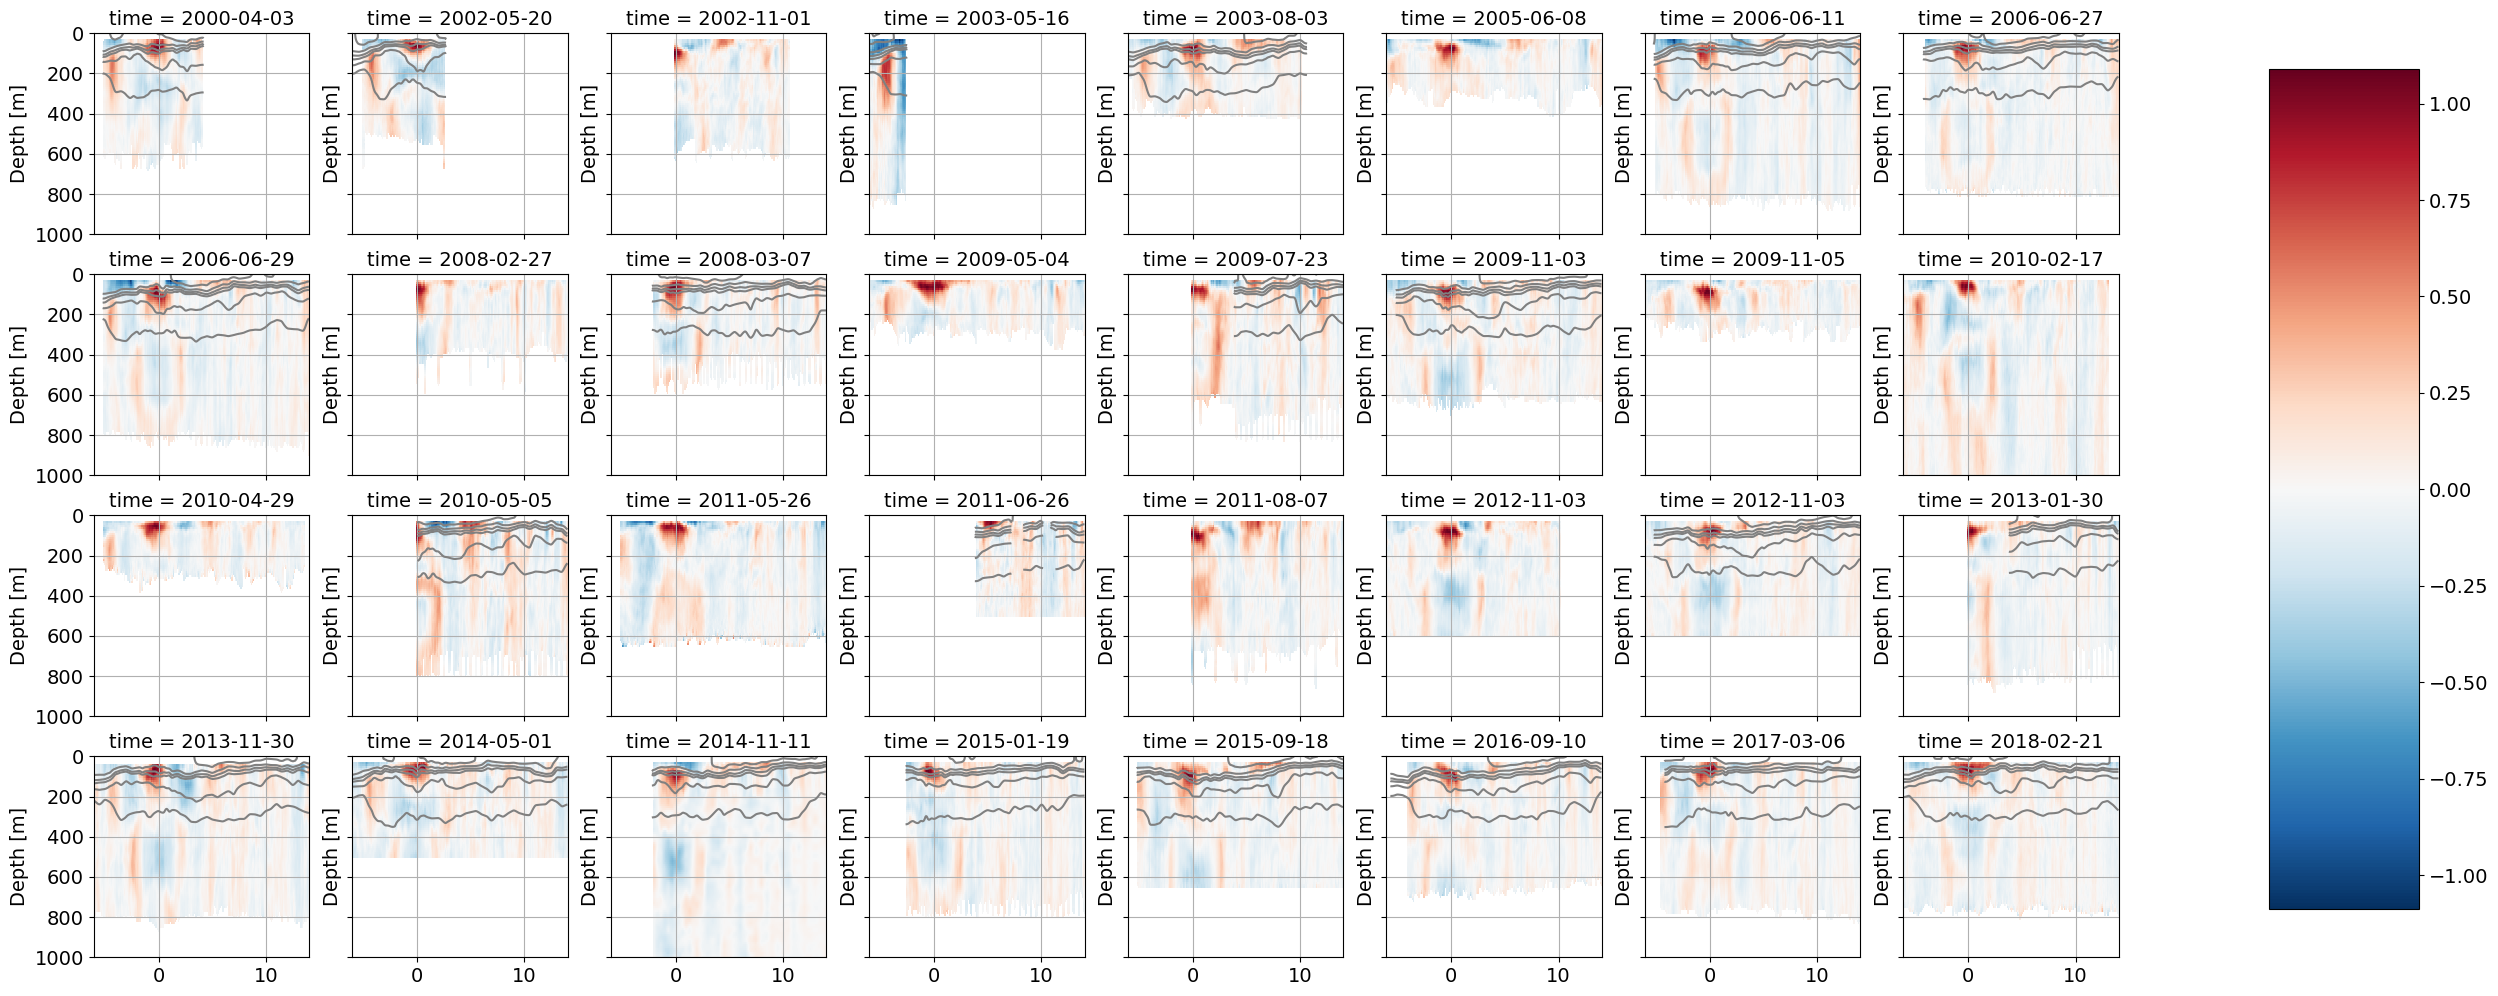

In [23]:
fig,axs = plt.subplots(4,8,figsize=[30, 12],sharex=True,sharey=True)

for i,ax in enumerate(axs.flat[0:32]):
    im = obs_23W_2021.isel(time=i).u_array.plot(ax=ax,x='lat',y='depth',
                                                yincrease=False,ylim=[1000,0], #xlim=[2.5,8],
                                          add_colorbar=False)
    obs_23W_2021.isel(time=i).s0_array.plot.contour(ax=ax,x='lat',y='depth',colors='grey',
                                                yincrease=False,ylim=[1000,0],#xlim=[2.5,8] ,
                                                levels=[23,24.5, 25.5,26,26.5 ,26.8],
                                                add_colorbar=False)
    plt.tight_layout
    ax.grid()
    ax.set_xlabel('')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

## 35 zonal velocity sections

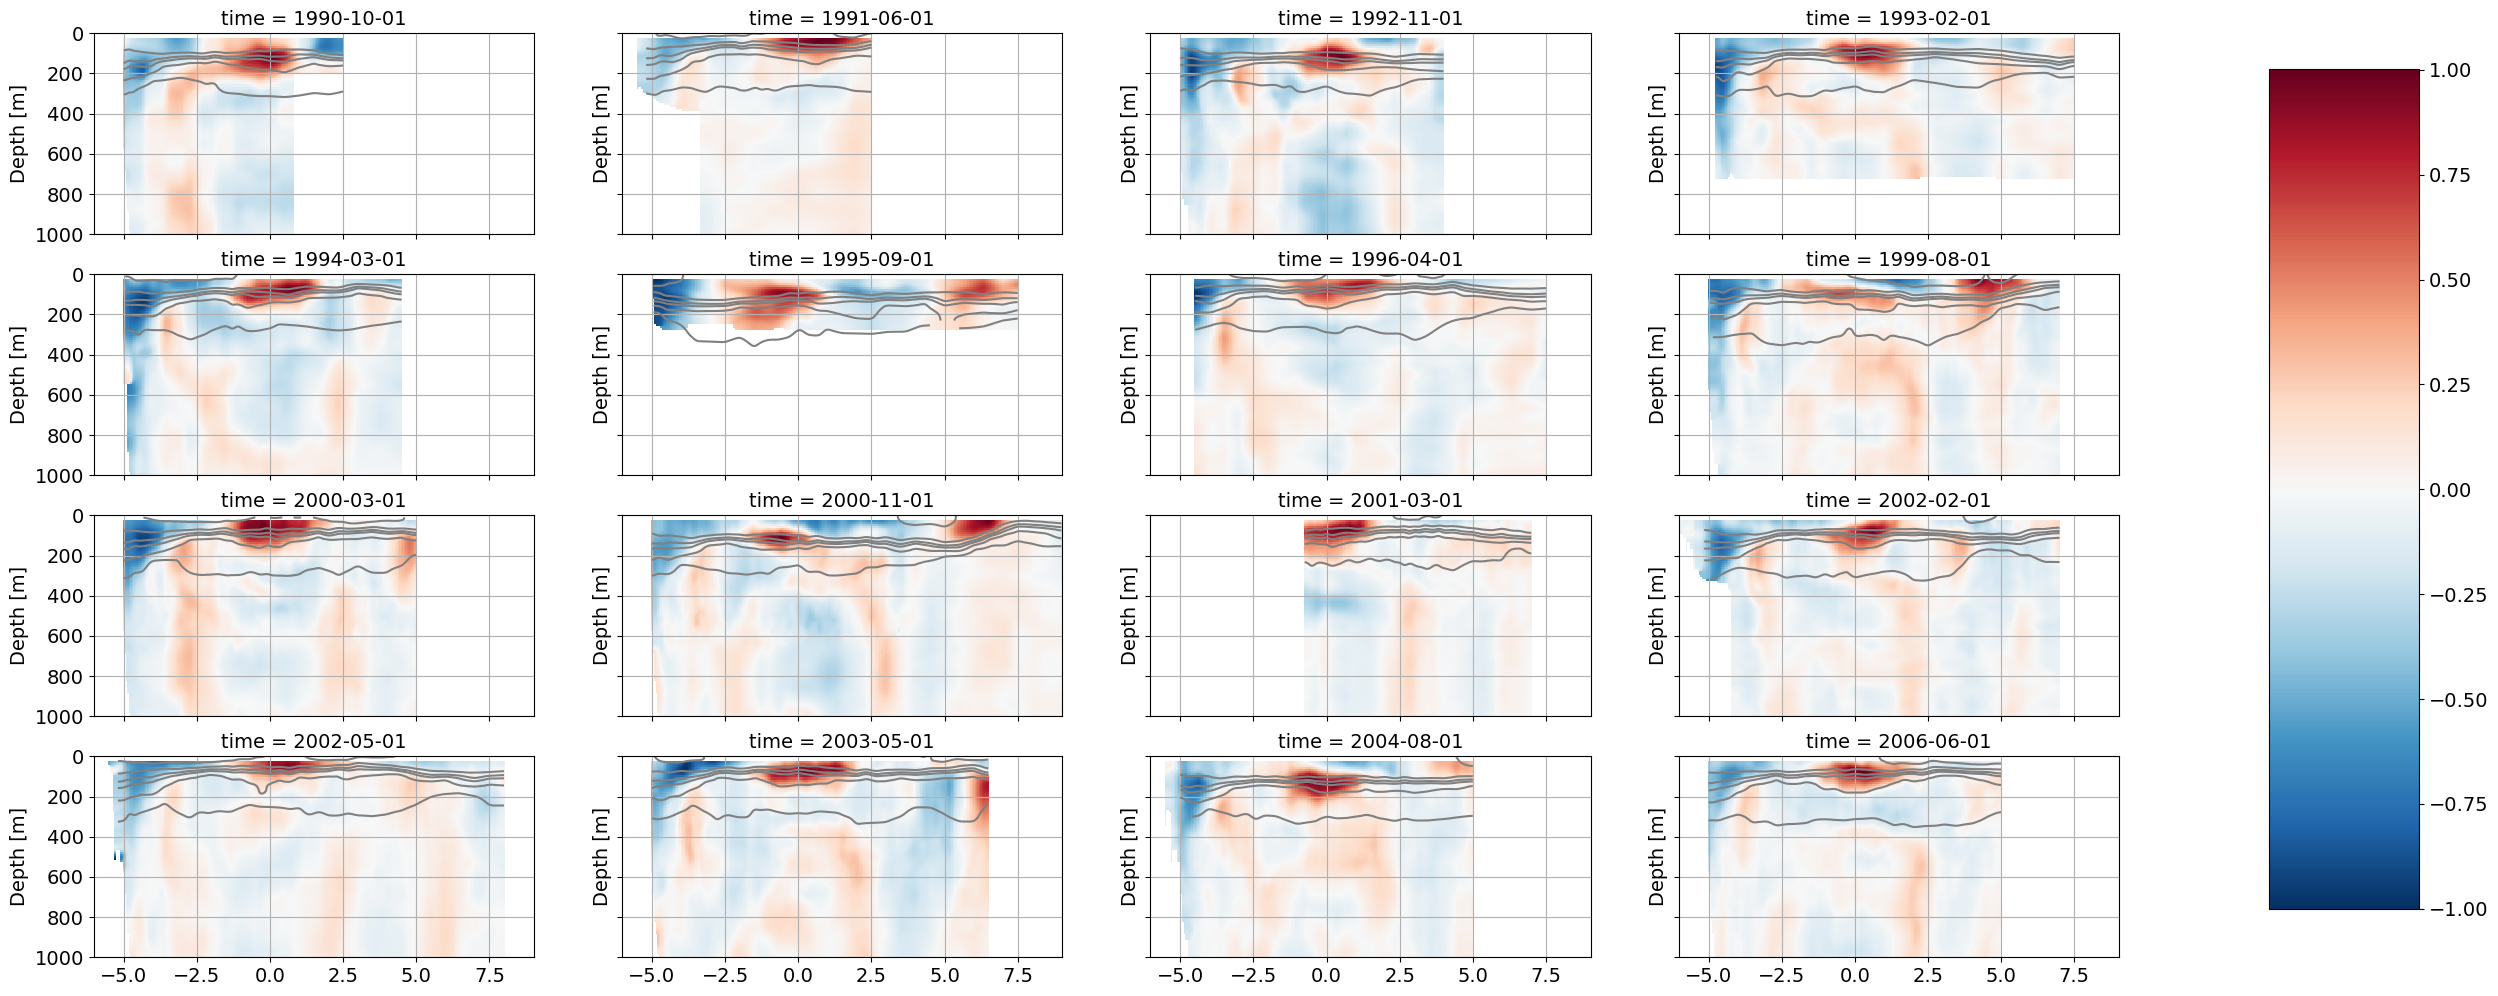

In [24]:
fig,axs = plt.subplots(4,4,figsize=[30, 12],sharex=True,sharey=True)

for i,ax in enumerate(axs.flat[0:16]):
    im = obs_35W.isel(time=i).u_array.plot(ax=ax,x='lat',y='depth',
                                                yincrease=False,ylim=[1000,0], #xlim=[2.5,8],
                                          add_colorbar=False)
    obs_35W.isel(time=i).s0_array.plot.contour(ax=ax,x='lat',y='depth',colors='grey',
                                                yincrease=False,ylim=[1000,0],#xlim=[2.5,8] ,
                                                levels=[23,24.5, 25.5,26,26.5 ,26.8],
                                                add_colorbar=False)
    plt.tight_layout
    ax.grid()
    ax.set_xlabel('')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

### Transport estimation from ship sections

In [25]:
EUC_obs_35 = calc_int_obs(obs_35W,-3,2.5,-1.2,1.2,[0, 26.8],2,True)
NEUC_obs_35 = calc_int_obs(obs_35W,2.5,8,3.5,6,[24.5, 26.8],2,True)
SEUC_obs_35 = calc_int_obs(obs_35W,-6,-3,-6,-4,[24.5, 27.0],2,True)
NECC_obs_35 = calc_int_obs(obs_35W,3,10,4,10,[0,24.5],3.5,True)
nSECu_obs_35 = calc_int_obs(obs_35W,0,6,0,5,[0,24.5],2,False)
nSECl_obs_35 = calc_int_obs(obs_35W,0,4,0,4,[24.5,26.8],2,False)


In [26]:
EUC_fix = calc_transp_fix(obs_23W_2021,30,300,-1.2,1.2)
EUC_obs = calc_int_obs(obs_23W_2021,-3,2.5,-1.2,1.2,[0, 26.8],2,True)

NEUC_fix = calc_transp_fix(obs_23W_2021,65,270,4.25,5.25)
NEUC_obs = calc_int_obs(obs_23W_2021,2.5,8,3.5,6,[24.5, 26.8],2,True)

SEUC_obs = calc_int_obs(obs_23W_2021,-6,-3,-6,-4,[24.5, 27.0],2,True)
NECC_obs = calc_int_obs(obs_23W_2021,3,10,4,10,[0,24.5],3.5,True)
nSECu_obs = calc_int_obs(obs_23W_2021,0,6,0,5,[0,24.5],2,False)
nSECl_obs = calc_int_obs(obs_23W_2021,0,4,0,4,[24.5,26.8],2,False)



# fig,axs = plt.subplots(3,2,figsize=[12,9],sharex=True)
# title = ['EUC','NECC','NEUC','nSECu','SEUC','nSECl']

# EUC_fix.sel(time=slice('2000','2019')).plot.line('o',ax=axs[0,0],label='fix',ylim=[0,25])
# EUC_obs.INT.sel(time=slice('2000','2019')).plot.line('o',ax=axs[0,0],label='INT',ylim=[0,25])
# NEUC_fix.sel(time=slice('2000','2019')).plot.line('o',ax=axs[1,0],label='fix',ylim=[-1,10])
# NEUC_obs.INT.sel(time=slice('2000','2019')).plot.line('o',ax=axs[1,0],label='INT',ylim=[-1,10])

# SEUC_obs.INT.sel(time=slice('2000','2019')).plot.line('o',ax=axs[2,0],label='INT',ylim=[0,15])
# NECC_obs.INT.sel(time=slice('2000','2019')).plot.line('o',ax=axs[0,1],label='INT',ylim=[-1,10])
# nSECu_obs.INT.sel(time=slice('2000','2019')).plot.line('o',ax=axs[1,1],label='INT',ylim=[1,-10])
# nSECl_obs.INT.sel(time=slice('2000','2019')).plot.line('o',ax=axs[2,1],label='INT',ylim=[1,-15])

# for i,ax in enumerate(axs.flat):
#     ax.grid()
#     ax.set_title(title[i])
#     ax.set_xlabel('')
    
# axs[0,0].legend()
# plt.tight_layout()

# Temporal Mean plots

In [27]:
def plot_temp_mean(EUC_CORE,EUC_JRA,EUC_obs,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs,title,linestyle='solid',obs='yes'):
    with xr.set_options(keep_attrs=True):
        mean_CORE = EUC_CORE.sel(time_counter=slice(tlim1_C,tlim2_C)).mean(dim=['time_counter'])
        std_CORE = EUC_CORE.sel(time_counter=slice(tlim1_C,tlim2_C)).std(dim=['time_counter'])

        mean_JRA = EUC_JRA.sel(time_counter=slice(tlim1_J,tlim2_J)).mean(dim=['time_counter'])
        std_JRA = EUC_JRA.sel(time_counter=slice(tlim1_J,tlim2_J)).std(dim=['time_counter'])

        mean_obs = EUC_obs.sel(time=slice(tlim1_J,tlim2_J)).mean(dim="time")
        std_obs = EUC_obs.sel(time=slice(tlim1_J,tlim2_J)).std(dim="time")

        mean_CORE.coords['units'] = 'Sv'
        mean_CORE.plot.line(x='lon',ax=axs,label=f'CORE {tlim1_C}-{tlim2_C}',color='C0',linestyle=linestyle)
        (mean_CORE+std_CORE).plot.line(x='lon',ax=axs,color='lightblue',linestyle=linestyle)
        (mean_CORE-std_CORE).plot.line(x='lon',ax=axs,color='lightblue',linestyle=linestyle)

        mean_JRA.plot.line('r',x='lon',ax=axs,label=f'JRA {tlim1_J}-{tlim2_J}',color='C1',linestyle=linestyle)
        (mean_JRA+std_JRA).plot.line(x='lon',ax=axs,color='khaki',linestyle=linestyle)
        (mean_JRA-std_JRA).plot.line(x='lon',ax=axs,color='khaki',linestyle=linestyle)
        
        if obs =='yes':
            axs.plot(-23,mean_obs,'ok',label=f'ship {tlim1_J}-{tlim2_J}')
            axs.vlines(-23,mean_obs-std_obs,mean_obs+std_obs,colors='k')
       
        
        axs.set_ylabel('')
        axs.set_xlabel('')
        axs.set_title(title)

        axs.grid()

In [28]:
def plot_temp_mean_35w(EUC_obs_35,axs):
    mean_obs = EUC_obs_35.mean(dim="time")
    std_obs = EUC_obs_35.std(dim="time")

    axs.plot(-35,mean_obs,'o',color='C7',label=f'ship 1990-2006')
    axs.vlines(-35,mean_obs-std_obs,mean_obs+std_obs,colors='C7')
    
def plot_temp_mean_23w(EUC_obs_35,axs):
    mean_obs = EUC_obs_35.mean(dim="time")
    std_obs = EUC_obs_35.std(dim="time")

    axs.plot(-23,mean_obs,'o',color='C2',label=f'ship 2000-2018')
    axs.vlines(-23,mean_obs-std_obs,mean_obs+std_obs,colors='C2',linestyles='dashed')

### time periods

In [29]:
tlim1_C,tlim2_C = '1980','2009'
tlim1_J,tlim2_J = '1980','2009'

### INT

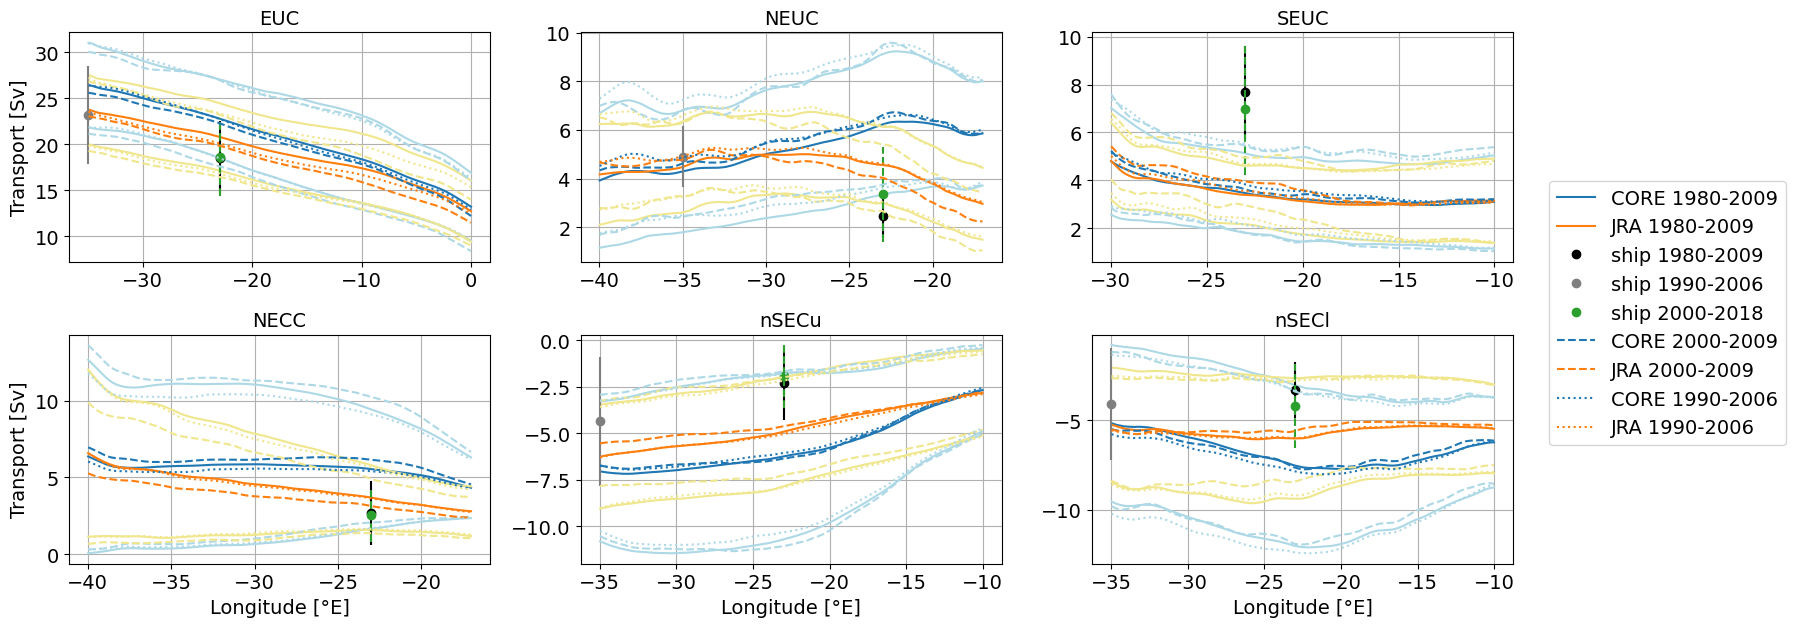

In [30]:
fig,axs = plt.subplots(2,3,figsize=[15.5,6.5])
# tlim1_C,tlim2_C = '1991','2009'
# tlim1_J,tlim2_J = '2000','2018'
tlim1_C,tlim2_C = '1980','2009'
tlim1_J,tlim2_J = '1980','2009'

for ax in axs.flat:
    ax.grid()

plot_temp_mean(EUC_CORE.INT.sel(lon=slice(-35,0)),EUC_JRA.INT.sel(lon=slice(-35,0)),EUC_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,0],'EUC')
plot_temp_mean(NEUC_CORE.INT.sel(lon=slice(-40,0)),NEUC_JRA.INT.sel(lon=slice(-40,0)),NEUC_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,1],'NEUC')
plot_temp_mean(SEUC_CORE.INT,SEUC_JRA.INT,SEUC_obs.INT,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,2],'SEUC')
plot_temp_mean(NECC_CORE.INT.sel(lon=slice(-40,0)),NECC_JRA.INT.sel(lon=slice(-40,0)),NECC_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,0],'NECC')
plot_temp_mean(nSECu_CORE.INT,nSECu_JRA.INT,nSECu_obs.INT,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,1],'nSECu')
plot_temp_mean(nSECl_CORE.INT,nSECl_JRA.INT,nSECl_obs.INT,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,2],'nSECl')

plot_temp_mean_35w(EUC_obs_35.INT,axs[0,0])
plot_temp_mean_35w(NEUC_obs_35.INT,axs[0,1])
plot_temp_mean_35w(SEUC_obs_35.INT,axs[0,2])
plot_temp_mean_35w(NECC_obs_35.INT,axs[1,0])
plot_temp_mean_35w(nSECu_obs_35.INT,axs[1,1])
plot_temp_mean_35w(nSECl_obs_35.INT,axs[1,2])

plot_temp_mean_23w(EUC_obs.INT,axs[0,0])
plot_temp_mean_23w(NEUC_obs.INT,axs[0,1])
plot_temp_mean_23w(SEUC_obs.INT,axs[0,2])
plot_temp_mean_23w(NECC_obs.INT,axs[1,0])
plot_temp_mean_23w(nSECu_obs.INT,axs[1,1])
plot_temp_mean_23w(nSECl_obs.INT,axs[1,2])

tlim1_C,tlim2_C = '2000','2009'
tlim1_J,tlim2_J = '2000','2009'

plot_temp_mean(EUC_CORE.INT.sel(lon=slice(-35,0)),EUC_JRA.INT.sel(lon=slice(-35,0)),EUC_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,0],'EUC',linestyle='dashed',obs='no')
plot_temp_mean(NEUC_CORE.INT.sel(lon=slice(-40,0)),NEUC_JRA.INT.sel(lon=slice(-40,0)),NEUC_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,1],'NEUC',linestyle='dashed',obs='no')
plot_temp_mean(SEUC_CORE.INT,SEUC_JRA.INT,SEUC_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,2],'SEUC',linestyle='dashed',obs='no')
plot_temp_mean(NECC_CORE.INT.sel(lon=slice(-40,0)),NECC_JRA.INT.sel(lon=slice(-40,0)),NECC_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,0],'NECC',linestyle='dashed',obs='no')
plot_temp_mean(nSECu_CORE.INT,nSECu_JRA.INT,nSECu_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,1],'nSECu',linestyle='dashed',obs='no')
plot_temp_mean(nSECl_CORE.INT,nSECl_JRA.INT,nSECl_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,2],'nSECl',linestyle='dashed',obs='no')

tlim1_C,tlim2_C = '1990','2006'
tlim1_J,tlim2_J = '1990','2006'

plot_temp_mean(EUC_CORE.INT.sel(lon=slice(-35,0)),EUC_JRA.INT.sel(lon=slice(-35,0)),EUC_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,0],'EUC',linestyle='dotted',obs='no')
plot_temp_mean(NEUC_CORE.INT.sel(lon=slice(-40,0)),NEUC_JRA.INT.sel(lon=slice(-40,0)),NEUC_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,1],'NEUC',linestyle='dotted',obs='no')
plot_temp_mean(SEUC_CORE.INT,SEUC_JRA.INT,SEUC_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,2],'SEUC',linestyle='dotted',obs='no')
plot_temp_mean(NECC_CORE.INT.sel(lon=slice(-40,0)),NECC_JRA.INT.sel(lon=slice(-40,0)),NECC_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,0],'NECC',linestyle='dotted',obs='no')
plot_temp_mean(nSECu_CORE.INT,nSECu_JRA.INT,nSECu_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,1],'nSECu',linestyle='dotted',obs='no')
plot_temp_mean(nSECl_CORE.INT,nSECl_JRA.INT,nSECl_obs.INT,
               tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,2],'nSECl',linestyle='dotted',obs='no')

axs[0,0].set_ylabel('Transport [Sv]')
axs[1,0].set_ylabel('Transport [Sv]')
axs[1,0].set_xlabel('Longitude [°E]')
axs[1,1].set_xlabel('Longitude [°E]')
axs[1,2].set_xlabel('Longitude [°E]')

handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels,loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

for ax in axs.flat:
    ax.grid()
if savefig:
    plt.savefig((out_dir_fig / f"Currents_INT_model_ship_mean_std_obsperiod_and_C{tlim1_C}_{tlim2_C}_J{tlim1_J}_{tlim2_J}{fig_format}"),dpi=300, bbox_inches='tight')

### $Y_{CM}$

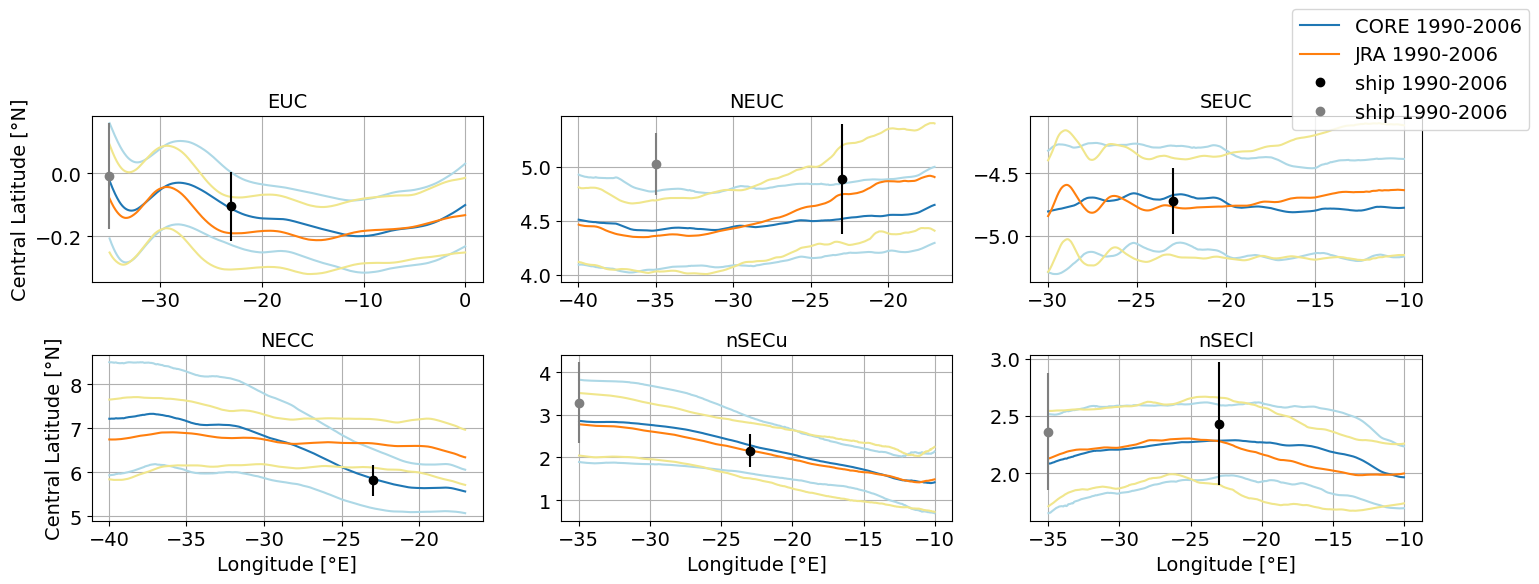

In [31]:
fig,axs = plt.subplots(2,3,figsize=[15.5,6.5])
# tlim1_C,tlim2_C = '1991','2009'
# tlim1_J,tlim2_J = '2000','2018'

plot_temp_mean(EUC_CORE.Y_CM.sel(lon=slice(-35,0)),EUC_JRA.Y_CM.sel(lon=slice(-35,0)),EUC_obs.YCM,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,0],'EUC')
plot_temp_mean(NEUC_CORE.Y_CM.sel(lon=slice(-40,0)),NEUC_JRA.Y_CM.sel(lon=slice(-40,0)),NEUC_obs.YCM,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,1],'NEUC')
plot_temp_mean(SEUC_CORE.Y_CM,SEUC_JRA.Y_CM,SEUC_obs.YCM,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,2],'SEUC')
plot_temp_mean(NECC_CORE.Y_CM.sel(lon=slice(-40,0)),NECC_JRA.Y_CM.sel(lon=slice(-40,0)),NECC_obs.YCM,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,0],'NECC')
plot_temp_mean(nSECu_CORE.Y_CM,nSECu_JRA.Y_CM,nSECu_obs.YCM,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,1],'nSECu')
plot_temp_mean(nSECl_CORE.Y_CM,nSECl_JRA.Y_CM,nSECl_obs.YCM,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,2],'nSECl')


plot_temp_mean_35w(EUC_obs_35.YCM,axs[0,0])
plot_temp_mean_35w(NEUC_obs_35.YCM,axs[0,1])
plot_temp_mean_35w(SEUC_obs_35.YCM,axs[0,2])
plot_temp_mean_35w(NECC_obs_35.YCM,axs[1,0])
plot_temp_mean_35w(nSECu_obs_35.YCM,axs[1,1])
plot_temp_mean_35w(nSECl_obs_35.YCM,axs[1,2])

axs[0,0].set_ylabel('Central Latitude [°N]')
axs[1,0].set_ylabel('Central Latitude [°N]')
axs[1,0].set_xlabel('Longitude [°E]')
axs[1,1].set_xlabel('Longitude [°E]')
axs[1,2].set_xlabel('Longitude [°E]')
axs[0,2].legend(loc=1, bbox_to_anchor=(1.3,1.7))

plt.tight_layout()

if savefig:
    plt.savefig((out_dir_fig / f"Currents_Y_CM_model_ship_mean_std_C{tlim1_C}_{tlim2_C}_J{tlim1_J}_{tlim2_J}{fig_format}"),dpi=300)

### $Z_{CM}$

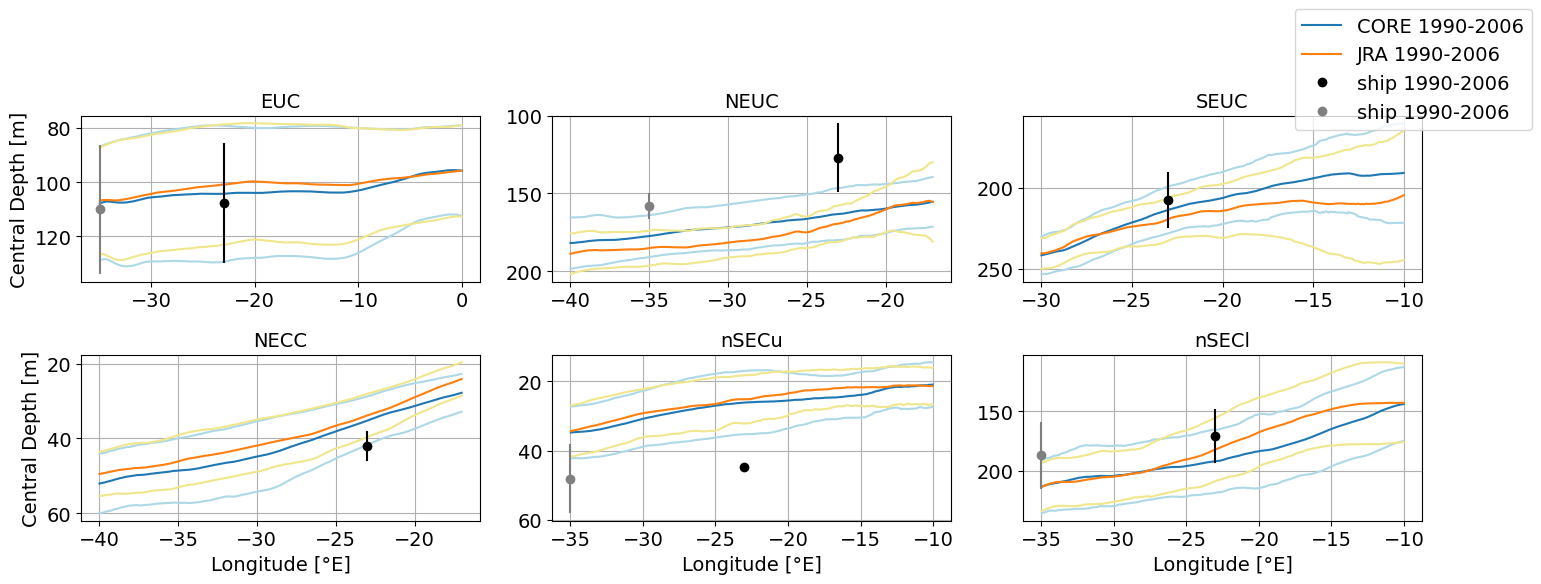

In [32]:
fig,axs = plt.subplots(2,3,figsize=[15.5,6.5])
# tlim1_C,tlim2_C = '1991','2009'
# tlim1_J,tlim2_J = '2000','2018'

plot_temp_mean(EUC_CORE.Z_CM.sel(lon=slice(-35,0)),EUC_JRA.Z_CM.sel(lon=slice(-35,0)),EUC_obs.ZCM,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,0],'EUC')
plot_temp_mean(NEUC_CORE.Z_CM.sel(lon=slice(-40,0)),NEUC_JRA.Z_CM.sel(lon=slice(-40,0)),NEUC_obs.ZCM,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,1],'NEUC')
plot_temp_mean(SEUC_CORE.Z_CM,SEUC_JRA.Z_CM,SEUC_obs.ZCM,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[0,2],'SEUC')
plot_temp_mean(NECC_CORE.Z_CM.sel(lon=slice(-40,0)),NECC_JRA.Z_CM.sel(lon=slice(-40,0)),NECC_obs.ZCM,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,0],'NECC')
plot_temp_mean(nSECu_CORE.Z_CM,nSECu_JRA.Z_CM,nSECu_obs.ZCM,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,1],'nSECu')
plot_temp_mean(nSECl_CORE.Z_CM,nSECl_JRA.Z_CM,nSECl_obs.ZCM,tlim1_C,tlim2_C,tlim1_J,tlim2_J,axs[1,2],'nSECl')


plot_temp_mean_35w(EUC_obs_35.ZCM,axs[0,0])
plot_temp_mean_35w(NEUC_obs_35.ZCM,axs[0,1])
plot_temp_mean_35w(SEUC_obs_35.ZCM,axs[0,2])
plot_temp_mean_35w(NECC_obs_35.ZCM,axs[1,0])
plot_temp_mean_35w(nSECu_obs_35.ZCM,axs[1,1])
plot_temp_mean_35w(nSECl_obs_35.ZCM,axs[1,2])

axs[0,0].set_ylabel('Central Depth [m]')
axs[1,0].set_ylabel('Central Depth [m]')
axs[1,0].set_xlabel('Longitude [°E]')
axs[1,1].set_xlabel('Longitude [°E]')
axs[1,2].set_xlabel('Longitude [°E]')
axs[0,2].legend(loc=1, bbox_to_anchor=(1.3,1.7))

plt.tight_layout()

for ax in axs.flat:
    ax.invert_yaxis()

if savefig:
    plt.savefig((out_dir_fig / f"Currents_Z_CM_model_ship_mean_std_C{tlim1_C}_{tlim2_C}_J{tlim1_J}_{tlim2_J}{fig_format}"),dpi=300)

# Time series

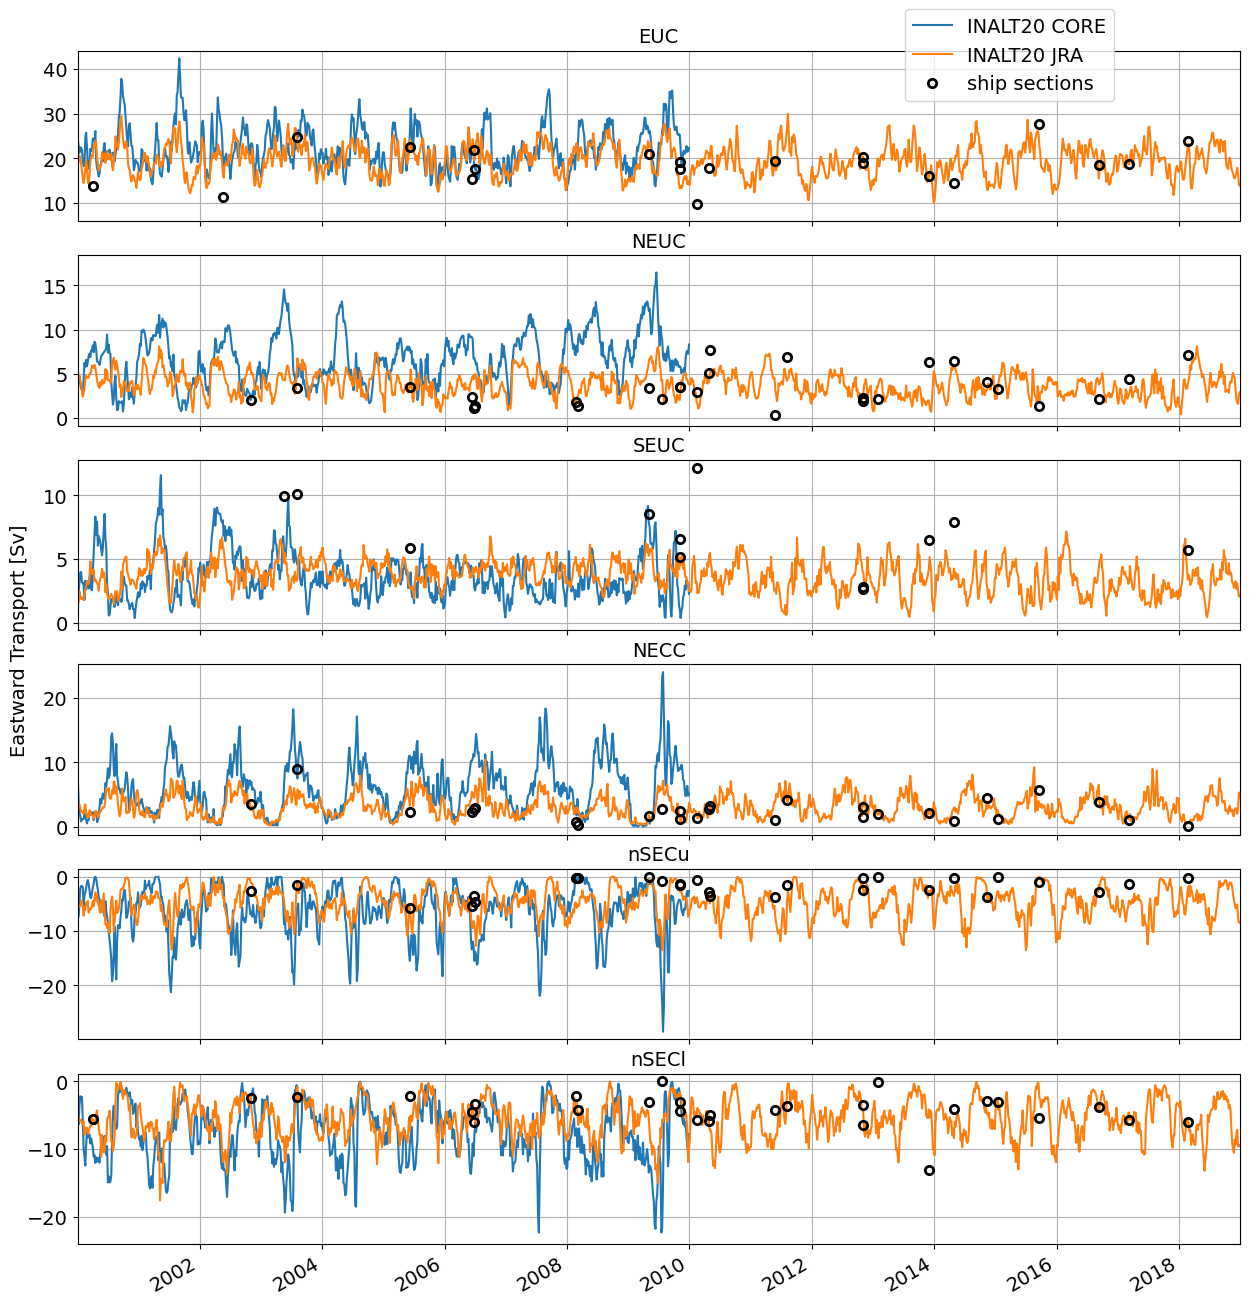

In [33]:
fig,axs = plt.subplots(6,1,figsize=[15,15.5],sharex=True)
title = ['EUC','NEUC','SEUC','NECC','nSECu','nSECl']

EUC_CORE.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[0],label='INALT20 CORE',xlim=[np.datetime64('2000-01-02'),np.datetime64('2018-12-31')])
EUC_JRA.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[0],label='INALT20 JRA')
EUC_obs.INT.plot.line('ok',ax=axs[0],label='ship sections',markerfacecolor='None',markeredgewidth=2)

NEUC_CORE.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[1],label='INALT20 CORE')
NEUC_JRA.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[1],label='INALT20 JRA')
NEUC_obs.INT.plot.line('ok',ax=axs[1],label='ship sections',markerfacecolor='None',markeredgewidth=2)

SEUC_CORE.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[2],label='INALT20 CORE')
SEUC_JRA.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[2],label='INALT20 JRA')
SEUC_obs.INT.plot.line('ok',ax=axs[2],label='ship sections',markerfacecolor='None',markeredgewidth=2)

NECC_CORE.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[3],label='INALT20 CORE')
NECC_JRA.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[3],label='INALT20 JRA')
NECC_obs.INT.plot.line('ok',ax=axs[3],label='ship sections',markerfacecolor='None',markeredgewidth=2)

nSECu_CORE.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[4],label='INALT20 CORE')
nSECu_JRA.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[4],label='INALT20 JRA')
nSECu_obs.INT.plot.line('ok',ax=axs[4],label='ship sections',markerfacecolor='None',markeredgewidth=2)

nSECl_CORE.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[5],label='INALT20 CORE')
nSECl_JRA.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[5],label='INALT20 JRA')
nSECl_obs.INT.plot.line('ok',ax=axs[5],label='ship sections',markerfacecolor='None',markeredgewidth=2)

for i,ax in enumerate(axs.flat):
    ax.grid()
    ax.set_title(title[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
axs[0].legend(loc=1, bbox_to_anchor=(0.9,1.3))
fig.text(0.08, 0.5, 'Eastward Transport [Sv]', va='center', rotation='vertical')

if savefig:
    plt.savefig((out_dir_fig / f"Currents_INT_model_ship_2000_2018{fig_format}"),dpi=300)

# Central latitude Y$_{CM}$

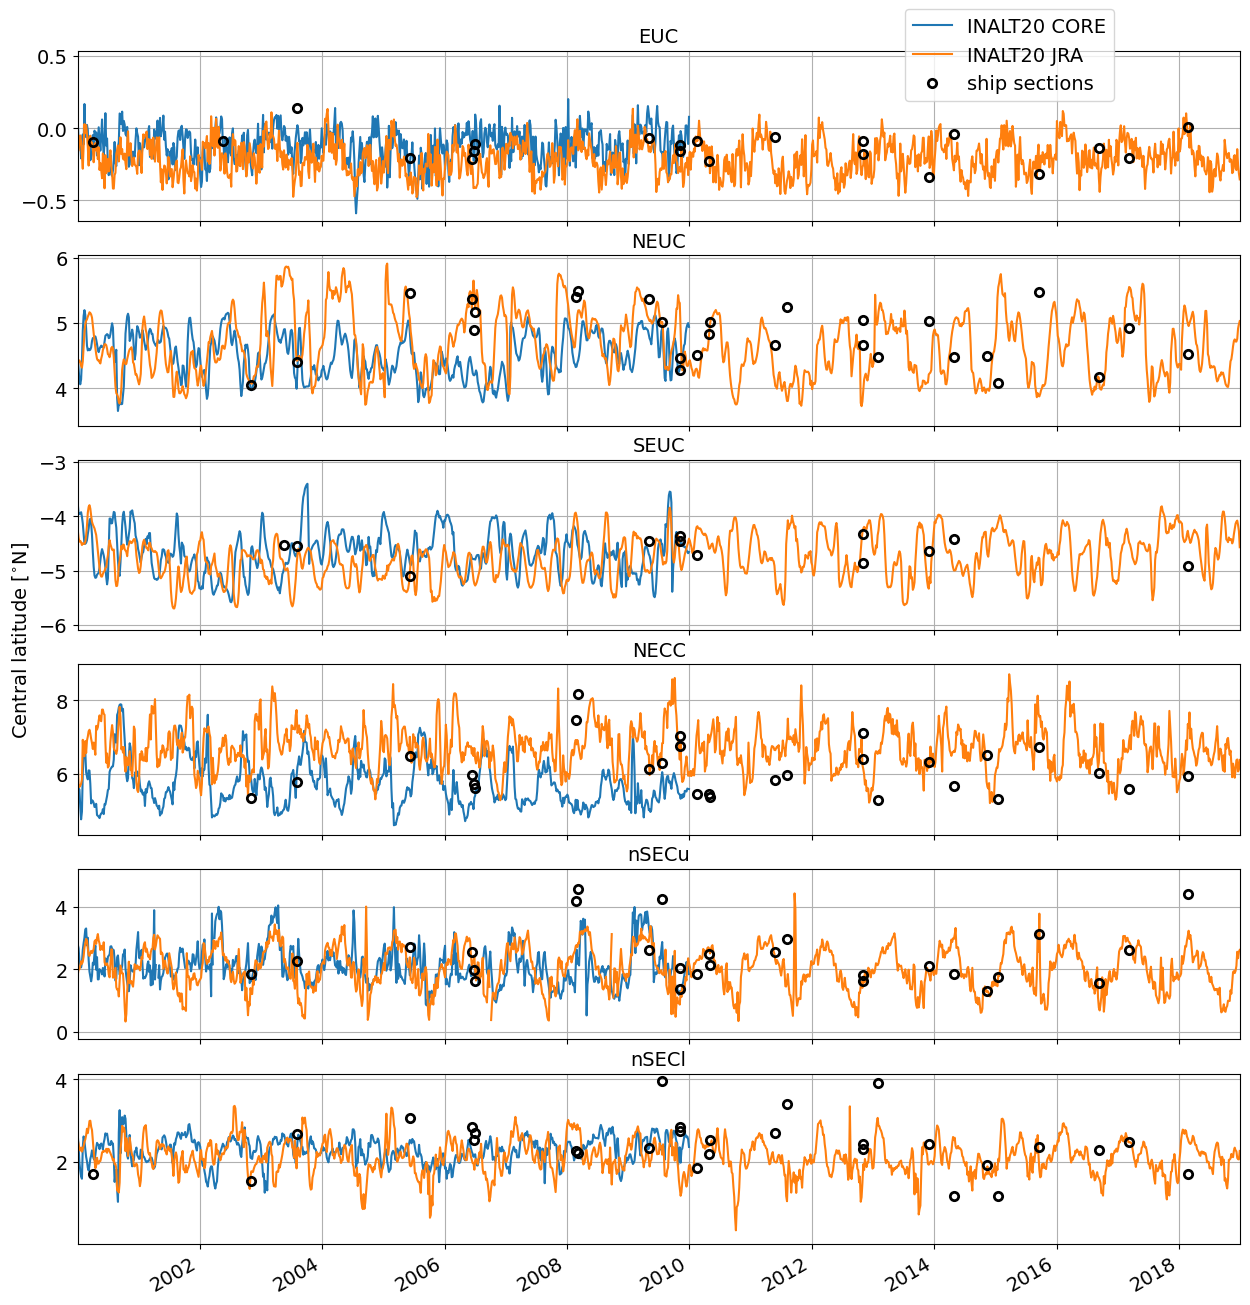

In [34]:
fig,axs = plt.subplots(6,1,figsize=[15,15.5],sharex=True)
title = ['EUC','NEUC','SEUC','NECC','nSECu','nSECl']

EUC_CORE.Y_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[0],label='INALT20 CORE',xlim=[np.datetime64('2000-01-02'),np.datetime64('2018-12-31')])
EUC_JRA.Y_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[0],label='INALT20 JRA')
EUC_obs.YCM.plot.line('ok',ax=axs[0],label='ship sections',markerfacecolor='None',markeredgewidth=2)

NEUC_CORE.Y_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[1],label='INALT20 CORE')
NEUC_JRA.Y_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[1],label='INALT20 JRA')
NEUC_obs.YCM.plot.line('ok',ax=axs[1],label='ship sections',markerfacecolor='None',markeredgewidth=2)

SEUC_CORE.Y_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[2],label='INALT20 CORE')
SEUC_JRA.Y_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[2],label='INALT20 JRA')
SEUC_obs.YCM.plot.line('ok',ax=axs[2],label='ship sections',markerfacecolor='None',markeredgewidth=2)

NECC_CORE.Y_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[3],label='INALT20 CORE')
NECC_JRA.Y_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[3],label='INALT20 JRA')
NECC_obs.YCM.plot.line('ok',ax=axs[3],label='ship sections',markerfacecolor='None',markeredgewidth=2)

nSECu_CORE.Y_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[4],label='INALT20 CORE')
nSECu_JRA.Y_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[4],label='INALT20 JRA')
nSECu_obs.YCM.plot.line('ok',ax=axs[4],label='ship sections',markerfacecolor='None',markeredgewidth=2)

nSECl_CORE.Y_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[5],label='INALT20 CORE')
nSECl_JRA.Y_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[5],label='INALT20 JRA')
nSECl_obs.YCM.plot.line('ok',ax=axs[5],label='ship sections',markerfacecolor='None',markeredgewidth=2)

for i,ax in enumerate(axs.flat):
    ax.grid()
    ax.set_title(title[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
axs[0].legend(loc=1, bbox_to_anchor=(0.9,1.3))
fig.text(0.08, 0.5, 'Central latitude [$^{\circ}$N]', va='center', rotation='vertical')

if savefig:
    plt.savefig((out_dir_fig / f"Currents_YCM_model_ship_2000_2018{fig_format}"),dpi=300)

# Core depth Z$_{CM}$

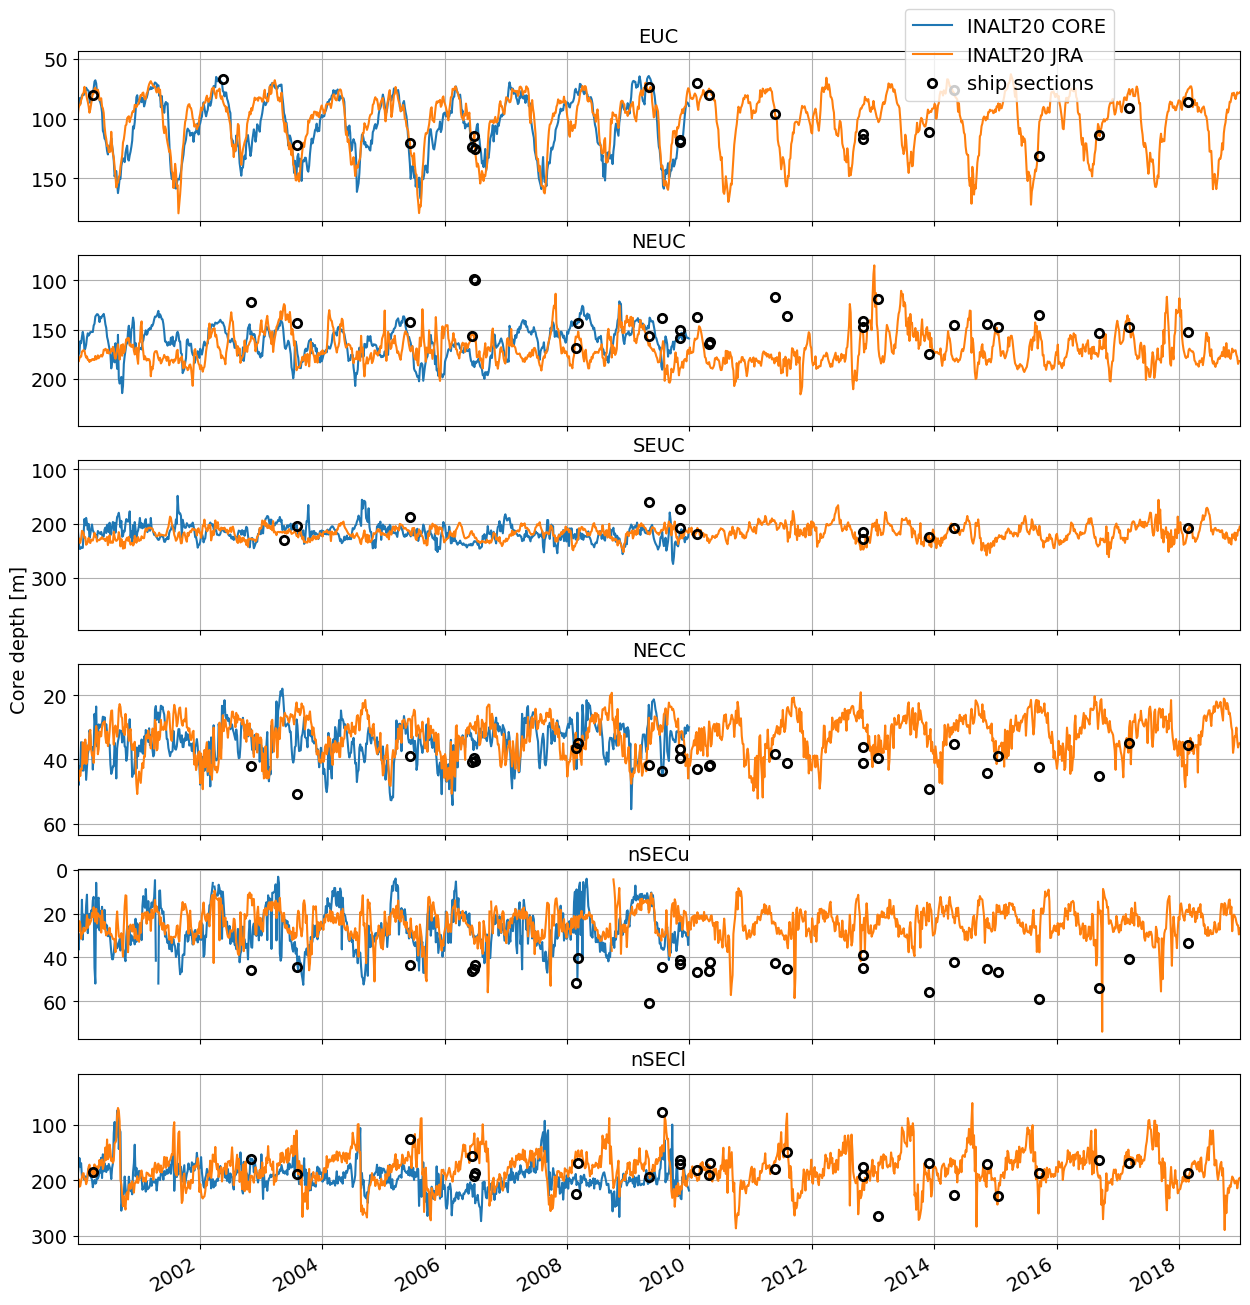

In [35]:
fig,axs = plt.subplots(6,1,figsize=[15,15.5],sharex=True)
title = ['EUC','NEUC','SEUC','NECC','nSECu','nSECl']

EUC_CORE.Z_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[0],label='INALT20 CORE',xlim=[np.datetime64('2000-01-02'),np.datetime64('2018-12-31')])
EUC_JRA.Z_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[0],label='INALT20 JRA')
EUC_obs.ZCM.plot.line('ok',ax=axs[0],label='ship sections',markerfacecolor='None',markeredgewidth=2)

NEUC_CORE.Z_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[1],label='INALT20 CORE')
NEUC_JRA.Z_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[1],label='INALT20 JRA')
NEUC_obs.ZCM.plot.line('ok',ax=axs[1],label='ship sections',markerfacecolor='None',markeredgewidth=2)

SEUC_CORE.Z_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[2],label='INALT20 CORE')
SEUC_JRA.Z_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[2],label='INALT20 JRA')
SEUC_obs.ZCM.plot.line('ok',ax=axs[2],label='ship sections',markerfacecolor='None',markeredgewidth=2)

NECC_CORE.Z_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[3],label='INALT20 CORE')
NECC_JRA.Z_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[3],label='INALT20 JRA')
NECC_obs.ZCM.plot.line('ok',ax=axs[3],label='ship sections',markerfacecolor='None',markeredgewidth=2)

nSECu_CORE.Z_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[4],label='INALT20 CORE')
nSECu_JRA.Z_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[4],label='INALT20 JRA')
nSECu_obs.ZCM.plot.line('ok',ax=axs[4],label='ship sections',markerfacecolor='None',markeredgewidth=2)

nSECl_CORE.Z_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[5],label='INALT20 CORE')
nSECl_JRA.Z_CM.sel(lon=-23,method='nearest').plot.line(ax=axs[5],label='INALT20 JRA')
nSECl_obs.ZCM.plot.line('ok',ax=axs[5],label='ship sections',markerfacecolor='None',markeredgewidth=2)

for i,ax in enumerate(axs.flat):
    ax.grid()
    ax.set_title(title[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.invert_yaxis()
    
axs[0].legend(loc=1, bbox_to_anchor=(0.9,1.3))
fig.text(0.08, 0.5, 'Core depth [m]', va='center', rotation='vertical')
if savefig:
    plt.savefig((out_dir_fig / f"Currents_ZCM_model_ship_2000_2018{fig_format}"),dpi=300)

# Mooring transport comparison - 19 years

### Linear Trend obs and JRA

In [36]:
yy1,yy2='2008-08','2018-07'
time = EUC_JRA.time_counter.sel(time_counter=slice(yy1,yy2))
JRA_EUC_trend = detrend_data(EUC_JRA.T_30.sel(time_counter=slice(yy1,yy2)).sel(lon=-23,method='nearest'),'time_counter',time)
JRA_EUC_trend_W3 = detrend_data(EUC_JRA.INT_3.sel(time_counter=slice(yy1,yy2)).sel(lon=-23,method='nearest'),'time_counter',time)
OBS_EUC_trend = detrend_data(moor_EUC.sel(time=slice(yy1,yy2)).resample(time='5D').mean(),'time',time)

yy3,yy4='2011','2018'
JRA_NEUC_trend = detrend_data(NEUC_JRA.T_fixed.sel(time_counter=slice(yy3,yy4)).sel(lon=-23,method='nearest'),'time_counter',time)
OBS_NEUC_trend = detrend_data(moor_NEUC.sel(time=slice(yy3,yy4)).resample(time='5D').mean(),'time',time)

/gxfs_work/geomar/smomw294/.conda/envs/py3_std/lib/python3.9/site-packages/dask/array/core.py:4923: RuntimeWarning: invalid value encountered in sqrt
  result = function(*args, **kwargs)


In [37]:
display(f"Linear trend of {JRA_EUC_trend.INT_trnd_10yrs.values:.1f} Sv/dec for JRA EUC transport ({yy1} to {yy2}), significant on a 95% interval: {JRA_EUC_trend.INT_trnd_signf.values}")
display(f"Linear trend of {JRA_EUC_trend.INT_trnd_10yrs.values:.1f} Sv/dec for JRA EUC W3 transport ({yy1} to {yy2}), significant on a 95% interval: {JRA_EUC_trend.INT_trnd_signf.values}")
display(f"Linear trend of {OBS_EUC_trend.INT_trnd_10yrs.values:.1f} Sv/dec for moored EUC transport ({yy1} to {yy2}), significant on a 95% interval: {OBS_EUC_trend.INT_trnd_signf.values}")
display(f"Linear trend of {JRA_NEUC_trend.INT_trnd_10yrs.values:.1f} Sv/dec for JRA NEUC transport ({yy3} to {yy4}), significant on a 95% interval: {JRA_NEUC_trend.INT_trnd_signf.values}")
display(f"Linear trend of {OBS_NEUC_trend.INT_trnd_10yrs.values:.1f} Sv/dec for moored NEUC transport ({yy3} to {yy4}), significant on a 95% interval: {OBS_NEUC_trend.INT_trnd_signf.values}")

'Linear trend of 0.9 Sv/dec for JRA EUC transport (2008-08 to 2018-07), significant on a 95% interval: True'

'Linear trend of 0.9 Sv/dec for JRA EUC W3 transport (2008-08 to 2018-07), significant on a 95% interval: True'

'Linear trend of 3.3 Sv/dec for moored EUC transport (2008-08 to 2018-07), significant on a 95% interval: True'

'Linear trend of 0.2 Sv/dec for JRA NEUC transport (2011 to 2018), significant on a 95% interval: False'

'Linear trend of 0.2 Sv/dec for moored NEUC transport (2011 to 2018), significant on a 95% interval: False'

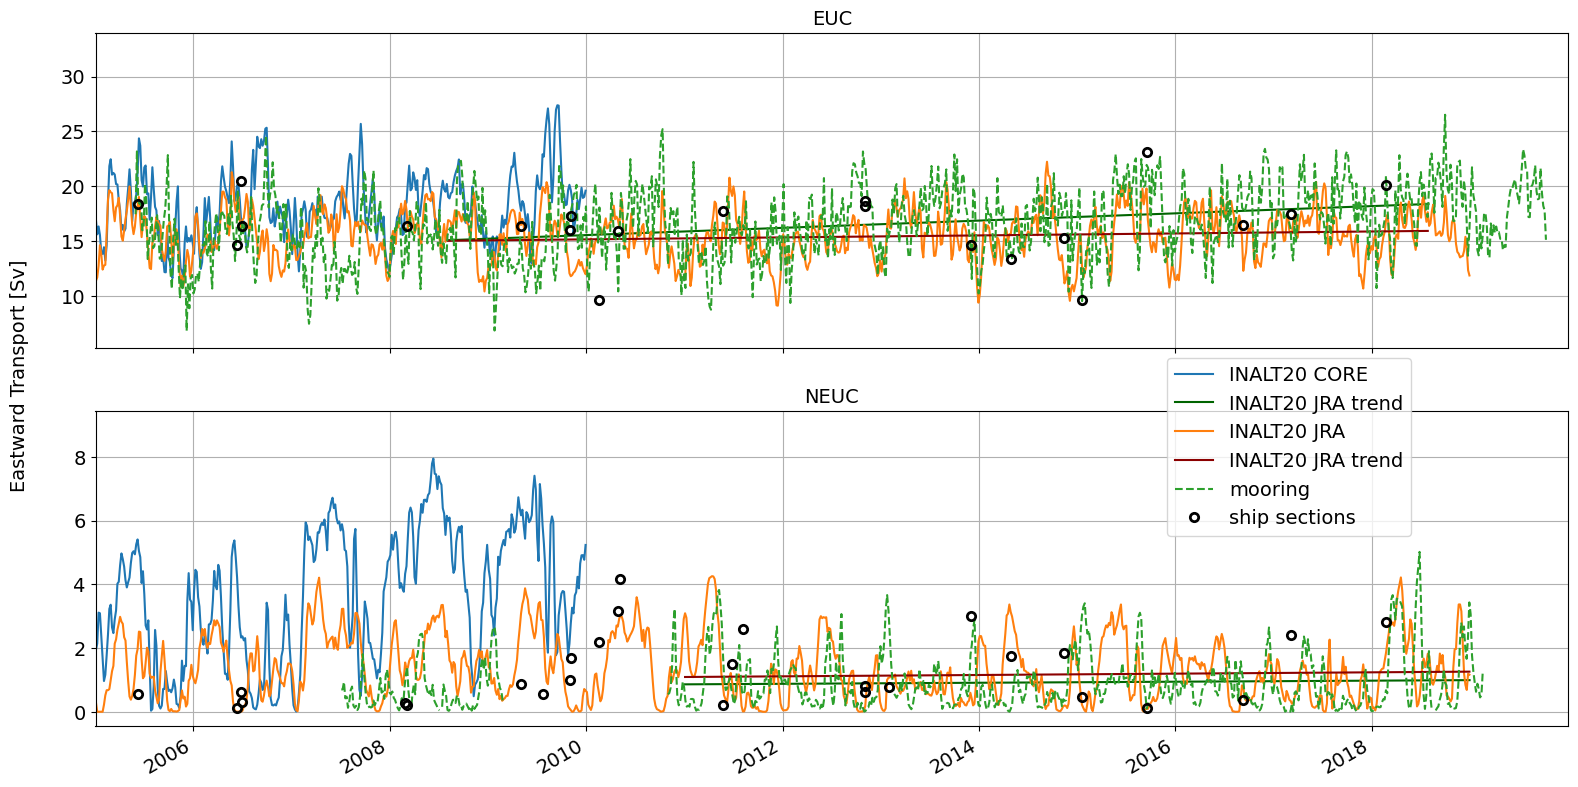

In [38]:
fig,axs = plt.subplots(2,1,figsize=[19,9],sharex=True)
title = ['EUC','NEUC']

EUC_CORE.T_30.sel(lon=-23,method='nearest').plot.line(ax=axs[0],label='INALT20 CORE',xlim=[np.datetime64('2005-01-02'),np.datetime64('2019-12-31')])
OBS_EUC_trend.INT_trnd.plot.line(ax=axs[0],color='darkgreen',label='INALT20 JRA trend')
EUC_JRA.T_30.sel(lon=-23,method='nearest').plot.line(ax=axs[0],label='INALT20 JRA')
JRA_EUC_trend.INT_trnd.plot.line(ax=axs[0],color='darkred',label='INALT20 JRA trend')
moor_EUC.resample(time='5D').mean('time').plot.line('--',ax=axs[0],label='mooring')
EUC_fix.plot.line('ok',ax=axs[0],label='ship sections',markerfacecolor='None',markeredgewidth=2)

NEUC_CORE.T_fixed.sel(lon=-23,method='nearest').plot.line(ax=axs[1],label='INALT20 CORE')
OBS_NEUC_trend.INT_trnd.plot.line(ax=axs[1],color='darkgreen',label='INALT20 JRA trend')
NEUC_JRA.T_fixed.sel(lon=-23,method='nearest').plot.line(ax=axs[1],label='INALT20 JRA')
JRA_NEUC_trend.INT_trnd.plot.line(ax=axs[1],color='darkred',label='INALT20 JRA trend')
moor_NEUC.where(moor_NEUC!=0).resample(time='5D').mean('time').plot.line('--',ax=axs[1],label='mooring')
NEUC_fix.plot.line('ok',ax=axs[1],label='ship sections',markerfacecolor='None',markeredgewidth=2)

for i,ax in enumerate(axs.flat):
    ax.grid()
    ax.set_title(title[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
axs[1].legend(loc=1, bbox_to_anchor=(0.9,1.2))
fig.text(0.08, 0.5, 'Eastward Transport [Sv]', va='center', rotation='vertical')

if savefig:
    plt.savefig((out_dir_fig / f"NEUC_EUC_INT_model_mooring_2005_2018{fig_format}"),dpi=300)

## Calculate Power Spectrum for observational period

In [39]:
# select same timeseries length
x_JRA = NEUC_JRA.T_fixed.sel(time_counter=slice('2010-11','2018')).sel(lon=-23,method='nearest')
x_CORE = NEUC_CORE.T_fixed.sel(time_counter=slice('2001-11','2009')).sel(lon=-23,method='nearest')
x_moor = moor_NEUC.sel(time=slice('2010-11','2018')).resample(time='5D').mean()

ps_JRA_NEUC,ps_CORE_NEUC,ps_moor_NEUC = calc_power_spec(x_JRA,x_CORE,x_moor)

x_JRA = EUC_JRA.T_30.sel(time_counter=slice('2005-06','2018')).sel(lon=-23,method='nearest')

# ds_HF = harm_fit(x_JRA,dims=dims)
# ds_AH = reconstr_ts(ds_HF,ds[dims].values,365,dims=dims)
# ds_SH = reconstr_ts(ds_HF,ds[dims].values,365/2,dims=dims)
# x_JRA = ds-ds_AH-ds_SH

x_CORE = EUC_CORE.T_30.sel(time_counter=slice('1996-06','2009')).sel(lon=-23,method='nearest')
x_moor = moor_EUC.sel(time=slice('2005-06','2018')).resample(time='5D').mean()

ps_JRA_EUC,ps_CORE_EUC,ps_moor_EUC = calc_power_spec(x_JRA,x_CORE,x_moor)

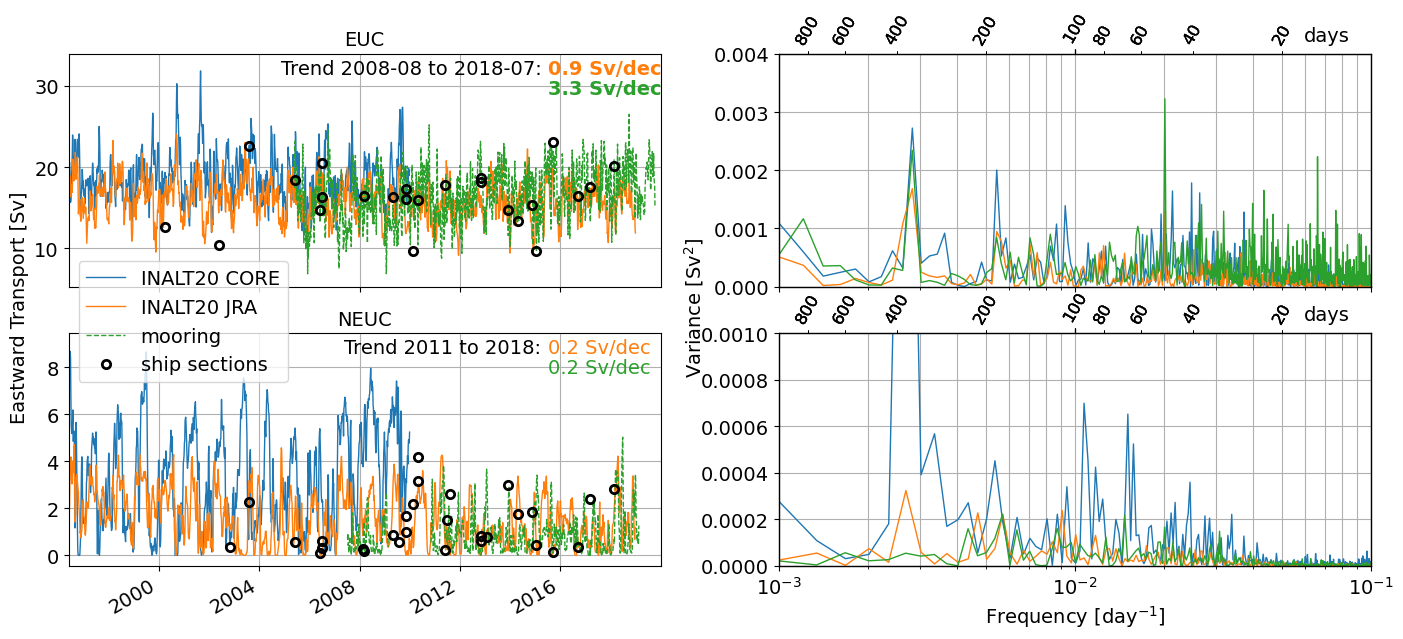

In [40]:
lw=1

fig,axs = plt.subplots(2,2,figsize=[0.7*24,0.7*9.5])
title = ['EUC','NEUC']


EUC_CORE.T_30.sel(lon=-23,method='nearest').plot.line(ax=axs[0,0],label='INALT20 CORE',xlim=[np.datetime64('1996-06-01'),np.datetime64('2019-12-31')],linewidth=lw)
EUC_JRA.T_30.sel(lon=-23,method='nearest').plot.line(ax=axs[0,0],label='INALT20 JRA',linewidth=lw)
moor_EUC.resample(time='5D').mean('time').plot.line('--',ax=axs[0,0],label='mooring',linewidth=lw)
EUC_fix.plot.line('ok',ax=axs[0,0],label='ship sections',markerfacecolor='None',markeredgewidth=2)
fig.text(0.41, 0.85, f"Trend {yy1} to {yy2}: ",ha='right')
fontw='heavy' if JRA_EUC_trend.INT_trnd_signf else 'normal'
fig.text(0.41, 0.85, f"{JRA_EUC_trend.INT_trnd_10yrs.values:.1f} Sv/dec",weight=fontw,color='C1')
fontw='heavy' if OBS_EUC_trend.INT_trnd_signf else 'normal'
fig.text(0.41, 0.82, f"{OBS_EUC_trend.INT_trnd_10yrs.values:.1f} Sv/dec",weight=fontw,color='C2')


NEUC_CORE.T_fixed.sel(lon=-23,method='nearest').plot.line(ax=axs[1,0],label='INALT20 CORE',xlim=[np.datetime64('1996-06-01'),np.datetime64('2019-12-31')],linewidth=lw)
NEUC_JRA.T_fixed.sel(lon=-23,method='nearest').plot.line(ax=axs[1,0],label='INALT20 JRA',linewidth=lw)
moor_NEUC.where(moor_NEUC!=0).resample(time='5D').mean('time').plot.line('--',ax=axs[1,0],label='mooring',linewidth=lw)
NEUC_fix.plot.line('ok',ax=axs[1,0],label='ship sections',markerfacecolor='None',markeredgewidth=2)

fig.text(0.41, 0.43, f"Trend {yy3} to {yy4}: ",ha='right')
fontw='heavy' if JRA_NEUC_trend.INT_trnd_signf else 'normal'
fig.text(0.41, 0.43, f"{JRA_NEUC_trend.INT_trnd_10yrs.values:.1f} Sv/dec",weight=fontw,color='C1')
fontw='heavy' if OBS_NEUC_trend.INT_trnd_signf else 'normal'
fig.text(0.41, 0.40, f"{OBS_NEUC_trend.INT_trnd_10yrs.values:.1f} Sv/dec",weight=fontw,color='C2')

plot_spectrum(ps_CORE_EUC.sel(f_time_counter=slice(1e-3,1e-1)), 
              variance_preserving=True, ylim=[0,4e-3], ax=axs[0,1],label='CORE',linewidth=lw);
plot_spectrum(ps_JRA_EUC.sel(f_time_counter=slice(1e-3,1e-1)), variance_preserving=True, ylim=[0,4e-3], ax=axs[0,1],label='JRA',linewidth=lw);
plot_spectrum(ps_moor_EUC.sel(f_time=slice(1e-3,1e-1)), variance_preserving=True, ylim=[0,4e-3], ax=axs[0,1],label='mooring',linewidth=lw);

plot_spectrum(ps_CORE_NEUC.sel(f_time_counter=slice(1e-3,1e-1)), variance_preserving=True, ylim=[0,1e-3], ax=axs[1,1],label='CORE',linewidth=lw);
plot_spectrum(ps_JRA_NEUC.sel(f_time_counter=slice(1e-3,1e-1)), variance_preserving=True, ylim=[0,1e-3], ax=axs[1,1],label='JRA',linewidth=lw);
plot_spectrum(ps_moor_NEUC.sel(f_time=slice(1e-3,1e-1)), variance_preserving=True, ylim=[0,1e-3], ax=axs[1,1],label='mooring',linewidth=lw);


for i,ax in enumerate(axs[:,0]):
    gl= ax.grid()
    ax.set_title(title[i])
    ax.set_xlabel('')
    ax.set_ylabel('')    


axs[1,0].legend(loc=2, bbox_to_anchor=(0,1.35))
fig.text(0.09, 0.5, 'Eastward Transport [Sv]', va='center', rotation='vertical')
fig.text(0.49, 0.5, 'Variance [Sv$^2$]', va='center', rotation='vertical')
fig.text(0.86, 0.9, 'days', ha='left')
fig.text(0.86, 0.48, 'days', ha='left')    
axs[1,1].set_xlabel('Frequency [day$^{-1}$]')
axs[0,1].set_xticklabels('')
axs[0,0].set_xticklabels('')

if savefig:
    plt.savefig((out_dir_fig / f"NEUC_EUC_INT_model_mooring_PS_2005_2018{fig_format}"),dpi=300)

## Restrict to certain time period

In [41]:
# select same timeseries length
tlim_CORE = ['1980','2009']
tlim_JRA = ['1980','2009']
x_JRA = NEUC_JRA.INT.sel(time_counter=slice(tlim_JRA[0],tlim_JRA[1])).mean('lon')
x_CORE = NEUC_CORE.INT.sel(time_counter=slice(tlim_CORE[0],tlim_CORE[1])).mean('lon') #https://nbviewer.jupyter.org/github/willirath/2021-07_bc-modes_harmonics_fitting/tree/main/
ps_JRA_NEUC,ps_CORE_NEUC,NEUC_JRA_dtrnd,NEUC_CORE_dtrnd = calc_power_spec_model(x_JRA,x_CORE,'time_counter',time)


x_JRA = EUC_JRA.INT.sel(time_counter=slice(tlim_JRA[0],tlim_JRA[1])).mean('lon').compute()
x_CORE = EUC_CORE.INT.sel(time_counter=slice(tlim_CORE[0],tlim_CORE[1])).mean('lon').compute()
ps_JRA_EUC,ps_CORE_EUC,EUC_JRA_dtrnd,EUC_CORE_dtrnd = calc_power_spec_model(x_JRA,x_CORE,'time_counter',time)

x_JRA = SEUC_JRA.INT.sel(time_counter=slice(tlim_JRA[0],tlim_JRA[1])).mean('lon').compute()
x_CORE = SEUC_CORE.INT.sel(time_counter=slice(tlim_CORE[0],tlim_CORE[1])).mean('lon').compute()
ps_JRA_SEUC,ps_CORE_SEUC,SEUC_JRA_dtrnd,SEUC_CORE_dtrnd = calc_power_spec_model(x_JRA,x_CORE,'time_counter',time)

x_JRA = NECC_JRA.INT.sel(time_counter=slice(tlim_JRA[0],tlim_JRA[1])).mean('lon').compute()
x_CORE = NECC_CORE.INT.sel(time_counter=slice(tlim_CORE[0],tlim_CORE[1])).mean('lon').compute()
ps_JRA_NECC,ps_CORE_NECC,NECC_JRA_dtrnd,NECC_CORE_dtrnd = calc_power_spec_model(x_JRA,x_CORE,'time_counter',time)

x_JRA = nSECu_JRA.INT.sel(time_counter=slice(tlim_JRA[0],tlim_JRA[1])).mean('lon').compute()
x_CORE = nSECu_CORE.INT.sel(time_counter=slice(tlim_CORE[0],tlim_CORE[1])).mean('lon').compute()
ps_JRA_nSECu,ps_CORE_nSECu,nSECu_JRA_dtrnd,nSECu_CORE_dtrnd = calc_power_spec_model(x_JRA,x_CORE,'time_counter',time)

x_JRA = nSECl_JRA.INT.sel(time_counter=slice(tlim_JRA[0],tlim_JRA[1])).mean('lon').compute()
x_CORE = nSECl_CORE.INT.sel(time_counter=slice(tlim_CORE[0],tlim_CORE[1])).mean('lon').compute()
ps_JRA_nSECl,ps_CORE_nSECl,nSECl_JRA_dtrnd,nSECl_CORE_dtrnd = calc_power_spec_model(x_JRA,x_CORE,'time_counter',time)

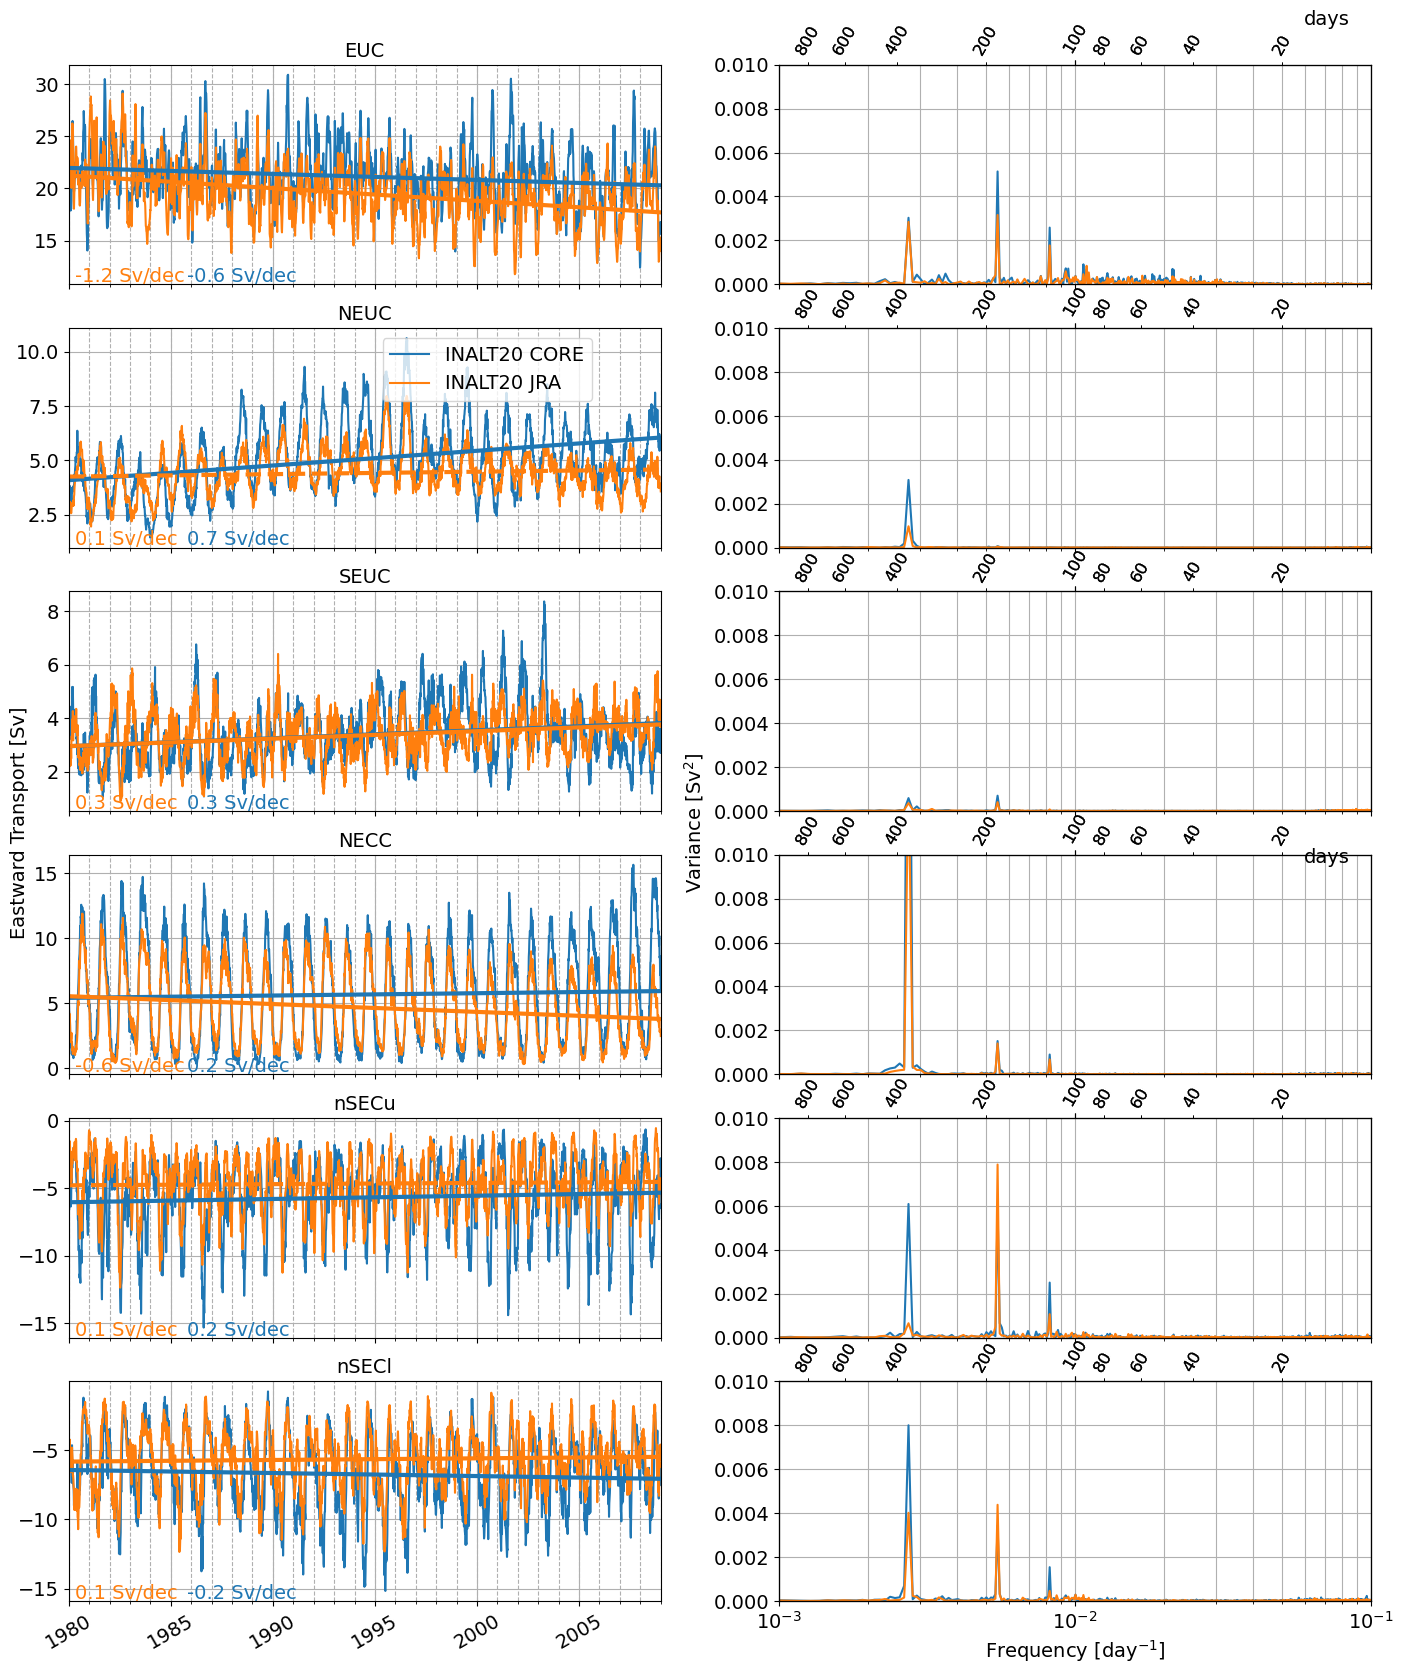

In [42]:
fig,axs = plt.subplots(2*3,2,figsize=[24*0.7,9.5*3*0.7])
title = ['EUC','NEUC','SEUC','NECC','nSECu','nSECl']

plot_PS_INT(EUC_CORE_dtrnd,EUC_JRA_dtrnd,ps_CORE_EUC,ps_JRA_EUC,0,axs,tlim_CORE[0],tlim_JRA[1])
plot_PS_INT(NEUC_CORE_dtrnd,NEUC_JRA_dtrnd,ps_CORE_NEUC,ps_JRA_NEUC,1,axs,tlim_CORE[0],tlim_JRA[1])
plot_PS_INT(SEUC_CORE_dtrnd,SEUC_JRA_dtrnd,ps_CORE_SEUC,ps_JRA_SEUC,2,axs,tlim_CORE[0],tlim_JRA[1])
plot_PS_INT(NECC_CORE_dtrnd,NECC_JRA_dtrnd,ps_CORE_NECC,ps_JRA_NECC,3,axs,tlim_CORE[0],tlim_JRA[1])
plot_PS_INT(nSECu_CORE_dtrnd,nSECu_JRA_dtrnd,ps_CORE_nSECu,ps_JRA_nSECu,4,axs,tlim_CORE[0],tlim_JRA[1])
plot_PS_INT(nSECl_CORE_dtrnd,nSECl_JRA_dtrnd,ps_CORE_nSECl,ps_JRA_nSECl,5,axs,tlim_CORE[0],tlim_JRA[1])

for i,ax in enumerate(axs[:,0]):
    ax.set_title(title[i])
    ax.set_xlabel('')
    ax.set_ylabel('')    
    ax.xaxis.set_major_locator(dates.YearLocator(5,month=1,day=2))
    ax.xaxis.set_minor_locator(dates.MonthLocator(bymonth=(1)))
    gl= ax.grid()
    ax.grid(which='minor',linestyle='--')

for ax in axs[:-1,:].flat:
    ax.set_xticklabels('')

axs[1,0].legend(loc=1, bbox_to_anchor=(0.9,1))

axs[-1,0].xaxis.set_major_formatter(dates.DateFormatter('%Y'))
for label in axs[-1,0].get_xticklabels():
    label.set(rotation=30, ha='center')

fig.text(0.09, 0.5, 'Eastward Transport [Sv]', va='center', rotation='vertical',fontsize=14)
fig.text(0.49, 0.5, 'Variance [Sv$^2$]', va='center', rotation='vertical',fontsize=14)
fig.text(0.86, 0.9, 'days', ha='left',fontsize=14)
fig.text(0.86, 0.48, 'days', ha='left',fontsize=14)    
axs[-1,1].set_xlabel('Frequency [day$^{-1}$]')

if savefig:
    plt.savefig((out_dir_fig / f"All_INT_model_mooring_PS_zonal_mean_{tlim_JRA[0]}_{tlim_JRA[1]}{fig_format}"),dpi=300,bbox_inches='tight')

In [43]:
def disp_text_trends(EUC_JRA_dtrnd,yy1,yy2,model_current):
    display(f"Linear trend of {EUC_JRA_dtrnd.INT_trnd_10yrs.values:.1f} Sv/dec for {model_current} transport ({yy1} to {yy2}), significant on a 95% interval: {EUC_JRA_dtrnd.INT_trnd_signf.values}")

disp_text_trends(EUC_JRA_dtrnd,tlim_JRA[0],tlim_JRA[1],'JRA EUC')
disp_text_trends(EUC_CORE_dtrnd,tlim_CORE[0],tlim_CORE[1],'CORE EUC')

disp_text_trends(NEUC_JRA_dtrnd,tlim_JRA[0],tlim_JRA[1],'JRA NEUC')
disp_text_trends(NEUC_CORE_dtrnd,tlim_CORE[0],tlim_CORE[1],'CORE NEUC')

disp_text_trends(SEUC_JRA_dtrnd,tlim_JRA[0],tlim_JRA[1],'JRA SEUC')
disp_text_trends(SEUC_CORE_dtrnd,tlim_CORE[0],tlim_CORE[1],'CORE SEUC')

disp_text_trends(NECC_JRA_dtrnd,tlim_JRA[0],tlim_JRA[1],'JRA NECC')
disp_text_trends(NECC_CORE_dtrnd,tlim_CORE[0],tlim_CORE[1],'CORE NECC')

disp_text_trends(nSECu_JRA_dtrnd,tlim_JRA[0],tlim_JRA[1],'JRA nSECu')
disp_text_trends(nSECu_CORE_dtrnd,tlim_CORE[0],tlim_CORE[1],'CORE nSECu')

disp_text_trends(nSECl_JRA_dtrnd,tlim_JRA[0],tlim_JRA[1],'JRA nSECl')
disp_text_trends(nSECl_CORE_dtrnd,tlim_CORE[0],tlim_CORE[1],'CORE nSECl')

'Linear trend of -1.2 Sv/dec for JRA EUC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of -0.6 Sv/dec for CORE EUC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.1 Sv/dec for JRA NEUC transport (1980 to 2009), significant on a 95% interval: False'

'Linear trend of 0.7 Sv/dec for CORE NEUC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.3 Sv/dec for JRA SEUC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.3 Sv/dec for CORE SEUC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of -0.6 Sv/dec for JRA NECC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.2 Sv/dec for CORE NECC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.1 Sv/dec for JRA nSECu transport (1980 to 2009), significant on a 95% interval: False'

'Linear trend of 0.2 Sv/dec for CORE nSECu transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.1 Sv/dec for JRA nSECl transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of -0.2 Sv/dec for CORE nSECl transport (1980 to 2009), significant on a 95% interval: True'

EUC  & -1.0 Sv/dec (True) & -0.4 Sv/dec (True)
NEUC & 0.1 Sv/dec (False) & 0.7 Sv/dec (True)
SEUC & 0.4 Sv/dec (True) & 0.3 Sv/dec (True)
NECC & -0.6 Sv/dec (True) & 0.2 Sv/dec (True)
nSECu  & 0.1 Sv/dec (False) & 0.2 Sv/dec (True)
nSECl  & 0.1 Sv/dec: (True) & -0.2 Sv/dec (True)

# Longitudinal range

In [44]:
# select same timeseries length
tlim_CORE = ['1980','2009']
tlim_JRA = ['1980','2009']
for lonIdx in [-15,-25,-35]:
    print(lonIdx)
    x_JRA = NEUC_JRA.sel(lon=lonIdx,method='nearest').INT.sel(time_counter=slice(tlim_JRA[0],tlim_JRA[1])).compute()
    x_CORE = NEUC_CORE.sel(lon=lonIdx,method='nearest').INT.sel(time_counter=slice(tlim_CORE[0],tlim_CORE[1])).compute() #https://nbviewer.jupyter.org/github/willirath/2021-07_bc-modes_harmonics_fitting/tree/main/
    ps_JRA_NEUC,ps_CORE_NEUC,NEUC_JRA_dtrnd,NEUC_CORE_dtrnd = calc_power_spec_model(x_JRA,x_CORE,'time_counter',time)

    x_JRA = EUC_JRA.sel(lon=lonIdx,method='nearest').INT.sel(time_counter=slice(tlim_JRA[0],tlim_JRA[1])).compute()
    x_CORE = EUC_CORE.sel(lon=lonIdx,method='nearest').INT.sel(time_counter=slice(tlim_CORE[0],tlim_CORE[1])).compute()
    ps_JRA_EUC,ps_CORE_EUC,EUC_JRA_dtrnd,EUC_CORE_dtrnd = calc_power_spec_model(x_JRA,x_CORE,'time_counter',time)

    x_JRA = SEUC_JRA.sel(lon=lonIdx,method='nearest').INT.sel(time_counter=slice(tlim_JRA[0],tlim_JRA[1])).compute()
    x_CORE = SEUC_CORE.sel(lon=lonIdx,method='nearest').INT.sel(time_counter=slice(tlim_CORE[0],tlim_CORE[1])).compute()
    ps_JRA_SEUC,ps_CORE_SEUC,SEUC_JRA_dtrnd,SEUC_CORE_dtrnd = calc_power_spec_model(x_JRA,x_CORE,'time_counter',time)

    x_JRA = NECC_JRA.sel(lon=lonIdx,method='nearest').INT.sel(time_counter=slice(tlim_JRA[0],tlim_JRA[1])).compute()
    x_CORE = NECC_CORE.sel(lon=lonIdx,method='nearest').INT.sel(time_counter=slice(tlim_CORE[0],tlim_CORE[1])).compute()
    ps_JRA_NECC,ps_CORE_NECC,NECC_JRA_dtrnd,NECC_CORE_dtrnd = calc_power_spec_model(x_JRA,x_CORE,'time_counter',time)

    x_JRA = nSECu_JRA.sel(lon=lonIdx,method='nearest').INT.sel(time_counter=slice(tlim_JRA[0],tlim_JRA[1])).compute()
    x_CORE = nSECu_CORE.sel(lon=lonIdx,method='nearest').INT.sel(time_counter=slice(tlim_CORE[0],tlim_CORE[1])).compute()
    ps_JRA_nSECu,ps_CORE_nSECu,nSECu_JRA_dtrnd,nSECu_CORE_dtrnd = calc_power_spec_model(x_JRA,x_CORE,'time_counter',time)

    x_JRA = nSECl_JRA.sel(lon=lonIdx,method='nearest').INT.sel(time_counter=slice(tlim_JRA[0],tlim_JRA[1])).compute()
    x_CORE = nSECl_CORE.sel(lon=lonIdx,method='nearest').INT.sel(time_counter=slice(tlim_CORE[0],tlim_CORE[1])).compute()
    ps_JRA_nSECl,ps_CORE_nSECl,nSECl_JRA_dtrnd,nSECl_CORE_dtrnd = calc_power_spec_model(x_JRA,x_CORE,'time_counter',time)
    
    print(EUC_JRA.sel(lon=lonIdx,method='nearest').lon.values)
    disp_text_trends(EUC_JRA_dtrnd,tlim_JRA[0],tlim_JRA[1],'JRA EUC')
    disp_text_trends(EUC_CORE_dtrnd,tlim_CORE[0],tlim_CORE[1],'CORE EUC')

    print(NEUC_JRA.sel(lon=lonIdx,method='nearest').lon.values)
    disp_text_trends(NEUC_JRA_dtrnd,tlim_JRA[0],tlim_JRA[1],'JRA NEUC')
    disp_text_trends(NEUC_CORE_dtrnd,tlim_CORE[0],tlim_CORE[1],'CORE NEUC')

    print(SEUC_JRA.sel(lon=lonIdx,method='nearest').lon.values)
    disp_text_trends(SEUC_JRA_dtrnd,tlim_JRA[0],tlim_JRA[1],'JRA SEUC')
    disp_text_trends(SEUC_CORE_dtrnd,tlim_CORE[0],tlim_CORE[1],'CORE SEUC')

    print(NECC_JRA.sel(lon=lonIdx,method='nearest').lon.values)
    disp_text_trends(NECC_JRA_dtrnd,tlim_JRA[0],tlim_JRA[1],'JRA NECC')
    disp_text_trends(NECC_CORE_dtrnd,tlim_CORE[0],tlim_CORE[1],'CORE NECC')

    print(nSECu_JRA.sel(lon=lonIdx,method='nearest').lon.values)
    disp_text_trends(nSECu_JRA_dtrnd,tlim_JRA[0],tlim_JRA[1],'JRA nSECu')
    disp_text_trends(nSECu_CORE_dtrnd,tlim_CORE[0],tlim_CORE[1],'CORE nSECu')

    print(nSECl_JRA.sel(lon=lonIdx,method='nearest').lon.values)
    disp_text_trends(nSECl_JRA_dtrnd,tlim_JRA[0],tlim_JRA[1],'JRA nSECl')
    disp_text_trends(nSECl_CORE_dtrnd,tlim_CORE[0],tlim_CORE[1],'CORE nSECl')

-15
-14.975


'Linear trend of -1.5 Sv/dec for JRA EUC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of -0.8 Sv/dec for CORE EUC transport (1980 to 2009), significant on a 95% interval: True'

-17.025


'Linear trend of -0.6 Sv/dec for JRA NEUC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.2 Sv/dec for CORE NEUC transport (1980 to 2009), significant on a 95% interval: True'

-14.975


'Linear trend of -0.1 Sv/dec for JRA SEUC transport (1980 to 2009), significant on a 95% interval: False'

'Linear trend of 0.2 Sv/dec for CORE SEUC transport (1980 to 2009), significant on a 95% interval: True'

-17.025


'Linear trend of -0.3 Sv/dec for JRA NECC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.1 Sv/dec for CORE NECC transport (1980 to 2009), significant on a 95% interval: True'

-14.975


'Linear trend of -0.1 Sv/dec for JRA nSECu transport (1980 to 2009), significant on a 95% interval: False'

'Linear trend of 0.3 Sv/dec for CORE nSECu transport (1980 to 2009), significant on a 95% interval: False'

-14.975


'Linear trend of 0.2 Sv/dec for JRA nSECl transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.2 Sv/dec for CORE nSECl transport (1980 to 2009), significant on a 95% interval: True'

-25
-24.975


'Linear trend of -1.3 Sv/dec for JRA EUC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of -0.3 Sv/dec for CORE EUC transport (1980 to 2009), significant on a 95% interval: True'

-24.975


'Linear trend of -0.3 Sv/dec for JRA NEUC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.7 Sv/dec for CORE NEUC transport (1980 to 2009), significant on a 95% interval: True'

-24.975


'Linear trend of 0.5 Sv/dec for JRA SEUC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.4 Sv/dec for CORE SEUC transport (1980 to 2009), significant on a 95% interval: True'

-24.975


'Linear trend of -0.5 Sv/dec for JRA NECC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.3 Sv/dec for CORE NECC transport (1980 to 2009), significant on a 95% interval: True'

-24.975


'Linear trend of 0.2 Sv/dec for JRA nSECu transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.2 Sv/dec for CORE nSECu transport (1980 to 2009), significant on a 95% interval: False'

-24.975


'Linear trend of 0.4 Sv/dec for JRA nSECl transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of -0.3 Sv/dec for CORE nSECl transport (1980 to 2009), significant on a 95% interval: False'

-35
-34.975


'Linear trend of -0.7 Sv/dec for JRA EUC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of -0.4 Sv/dec for CORE EUC transport (1980 to 2009), significant on a 95% interval: True'

-34.975


'Linear trend of 0.6 Sv/dec for JRA NEUC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.8 Sv/dec for CORE NEUC transport (1980 to 2009), significant on a 95% interval: True'

-29.975


'Linear trend of 0.6 Sv/dec for JRA SEUC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.6 Sv/dec for CORE SEUC transport (1980 to 2009), significant on a 95% interval: True'

-34.975


'Linear trend of -0.8 Sv/dec for JRA NECC transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of -0.1 Sv/dec for CORE NECC transport (1980 to 2009), significant on a 95% interval: False'

-34.975


'Linear trend of 0.4 Sv/dec for JRA nSECu transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of 0.5 Sv/dec for CORE nSECu transport (1980 to 2009), significant on a 95% interval: False'

-34.975


'Linear trend of -0.5 Sv/dec for JRA nSECl transport (1980 to 2009), significant on a 95% interval: True'

'Linear trend of -0.7 Sv/dec for CORE nSECl transport (1980 to 2009), significant on a 95% interval: False'

\tophline
Current Lon JRA Significance CORE Significance
\middlehline
EUC  &  & -1.0 Sv/dec (True) & -0.4 Sv/dec (True) \\
NEUC &  & 0.1 Sv/dec (False) & 0.7 Sv/dec (True) \\
SEUC &  & 0.4 Sv/dec (True) & 0.3 Sv/dec (True) \\
NECC &  & -0.6 Sv/dec (True) & 0.2 Sv/dec (True) \\
nSECu &   & 0.1 Sv/dec (False) & 0.2 Sv/dec (True) \\
nSECl  &  & 0.1 Sv/dec: (True) & -0.2 Sv/dec (True) \\
\middlehline
EUC & -14.975 & -1.5 (True) & -0.8 (True)
NEUC & -17.025 & -0.6 (True) & 0.2 (True)
SEUC & -14.975 & -0.1 (False) & 0.2 (True)
NECC & -17.025 & -0.3 (True) & 0.1 (True)
nSECu & -14.975 & -0.1 (False) & 0.3 (False)
nSECl & -14.975 & 0.2 (True) & 0.2 (True )
\middlehline
EUC & -24.975 & -1.3 (True) & -0.3 (True)
NEUC & -24.975 & -0.3 (True) & 0.7 (True)
SEUC & -24.975 & 0.5 (True) & 0.4 (True)
NECC & -24.975 & -0.5 (True) & 0.3 (True)
nSECu & -24.975 & 0.2 (True) & 0.2 (False)
nSECl & -24.975 & 0.4 (True) & -0.3 (False)
\middlehline
EUC & -34.975 & -0.7 (True) & -0.4 (True)
NEUC & -34.975 & 0.6 (True) & 0.8 (True)
SEUC & -29.975 & 0.6 (True) & 0.6 (True)
NECC & -34.975 & -0.8 (True) & -0.1 (False)
nSECu & -34.975 & 0.4 (True) & 0.5 (False)
nSECl & -34.975 & -0.5 (True) & -0.7 (False)
\bottomhline

# Seasonal cycle mooring

In [45]:
with xr.set_options(keep_attrs=True):
    NEUC_JRA_cyc = NEUC_JRA.sel(time_counter=slice('2010-11','2018')).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').sel(lon=-23,method='nearest')
    NEUC_JRA_AH_SAH_CYC,NEUC_JRA_SAH_CYC,NEUC_JRA_AH_CYC = calc_AH_SAH_model(
        NEUC_JRA.sel(lon=-23,method='nearest').T_fixed.sel(time_counter=slice('2010-11','2018')),NEUC_JRA_cyc)
    NEUC_CORE_cyc = NEUC_CORE.sel(time_counter=slice('2001-11','2009')).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').sel(lon=-23,method='nearest')
    NEUC_CORE_AH_SAH_CYC,NEUC_CORE_SAH_CYC,NEUC_CORE_AH_CYC = calc_AH_SAH_model(
        NEUC_CORE.sel(lon=-23,method='nearest').T_fixed.sel(time_counter=slice('2001-11','2009')),NEUC_CORE_cyc)
    NEUC_moor_cyc = moor_NEUC.sel(time=slice('2010-11','2018')).groupby(
        'time.dayofyear').mean(dim='time')
    NEUC_moor_AH_SAH_CYC,NEUC_moor_SAH_CYC,NEUC_moor_AH_CYC = calc_AH_SAH_obs(
        moor_NEUC.sel(time=slice('2010-11','2018')),NEUC_JRA_cyc)
    NEUC_ship_cyc = NEUC_fix.groupby('time.dayofyear').mean('time')
    
    
    EUC_JRA_cyc = EUC_JRA.sel(time_counter=slice('2005-06','2018')).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').sel(lon=-23,method='nearest')
    EUC_JRA_AH_SAH_CYC,EUC_JRA_SAH_CYC,EUC_JRA_AH_CYC = calc_AH_SAH_model(
        EUC_JRA.sel(lon=-23,method='nearest').T_30.sel(time_counter=slice('2005-06','2018')),EUC_JRA_cyc)
    EUC3_JRA_AH_SAH_CYC,EUC3_JRA_SAH_CYC,EUC3_JRA_AH_CYC = calc_AH_SAH_model(
        EUC_JRA.sel(lon=-23,method='nearest').INT_3.sel(time_counter=slice('2005-06','2018')),EUC_JRA_cyc)
    
    EUC_CORE_cyc = EUC_CORE.sel(time_counter=slice('1996-06','2009')).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').sel(lon=-23,method='nearest')
    EUC_CORE_AH_SAH_CYC,EUC_CORE_SAH_CYC,EUC_CORE_AH_CYC = calc_AH_SAH_model(
        EUC_CORE.sel(lon=-23,method='nearest').T_30.sel(time_counter=slice('1996-06','2009')),EUC_CORE_cyc)
    EUC3_CORE_AH_SAH_CYC,EUC3_CORE_SAH_CYC,EUC3_CORE_AH_CYC = calc_AH_SAH_model(
        EUC_CORE.sel(lon=-23,method='nearest').INT_3.sel(time_counter=slice('1996-06','2009')),EUC_CORE_cyc)
    
    EUC_moor_cyc = (moor_EUC.where(moor_EUC!=0)).sel(time=slice('2005-06','2018')).groupby(
        'time.dayofyear').mean(dim='time')
    EUC_moor_AH_SAH_CYC,EUC_moor_SAH_CYC,EUC_moor_AH_CYC = calc_AH_SAH_obs(
        (moor_EUC.where(moor_EUC!=0)).sel(time=slice('2010-11','2018')),EUC_JRA_cyc)
    EUC_ship_cyc = EUC_fix.groupby('time.dayofyear').mean('time')

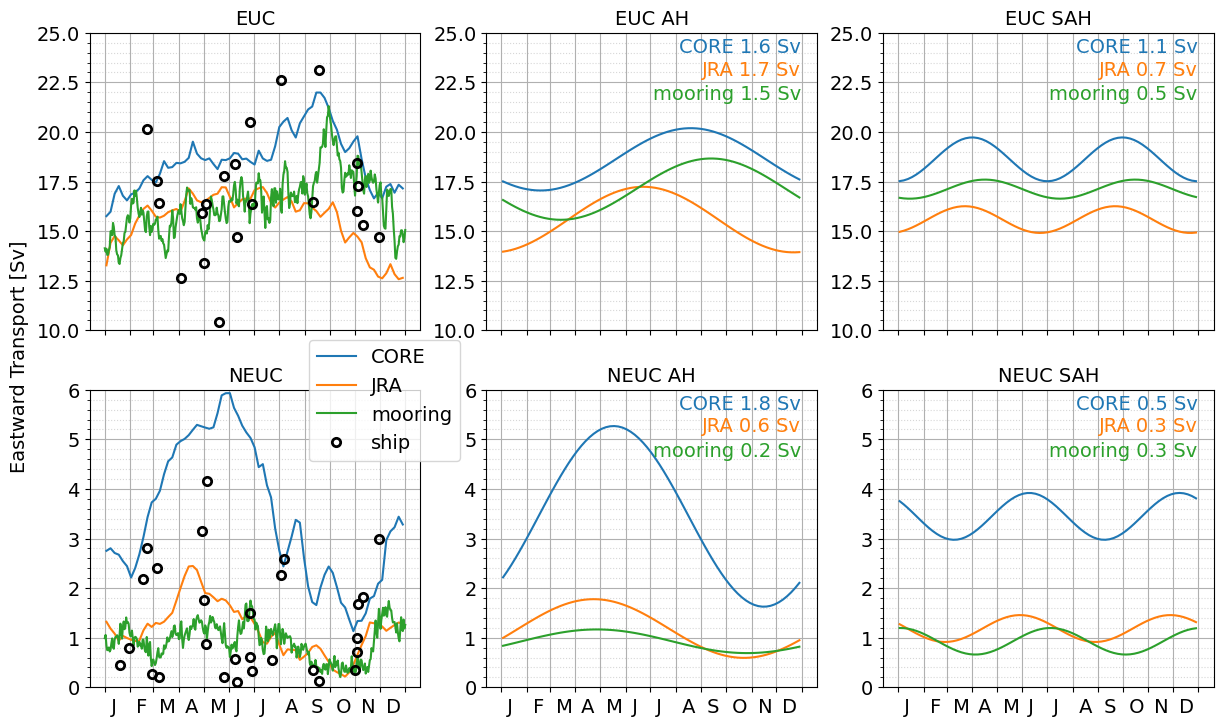

In [46]:
fig,axs = plt.subplots(2,3,figsize=[14.5,8.5],sharex=True)
title = ['EUC','EUC AH','EUC SAH','NEUC','NEUC AH','NEUC SAH']

EUC_CORE_cyc.T_30.plot.line('C0',ax=axs[0,0],label='CORE',ylim = [10,25])
# EUC_CORE_AH_SAH_CYC.plot.line('--C0',ax=axs[0],x='dayofyear',label='CORE AH+SAH')
EUC_CORE_AH_CYC.plot.line('C0',ax=axs[0,1],x='dayofyear',label='CORE AH',ylim = [10,25])
EUC_CORE_SAH_CYC.plot.line('C0',ax=axs[0,2],x='dayofyear',label='CORE SAH',ylim = [10,25])

EUC_JRA_cyc.T_30.plot.line('C1',ax=axs[0,0],label='JRA')
# EUC_JRA_AH_SAH_CYC.plot.line('--C1',ax=axs[0],x='dayofyear',label='JRA AH+SAH')
EUC_JRA_AH_CYC.plot.line('C1',ax=axs[0,1],x='dayofyear',label='JRA AH')
EUC_JRA_SAH_CYC.plot.line('C1',ax=axs[0,2],x='dayofyear',label='JRA SAH')

EUC_moor_cyc.plot.line('C2',ax=axs[0,0],label='mooring')
# EUC_moor_AH_SAH_CYC.plot.line('--C2',ax=axs[0],x='dayofyear',label='moor AH+SAH')
EUC_moor_AH_CYC.plot.line('C2',ax=axs[0,1],x='dayofyear',label='moor AH')
EUC_moor_SAH_CYC.plot.line('C2',ax=axs[0,2],x='dayofyear',label='moor SAH')

EUC_ship_cyc.plot.line('ok',ax=axs[0,0],label='ship',markerfacecolor='None',markeredgewidth=2)

NEUC_CORE_cyc.T_fixed.plot.line(ax=axs[1,0],label='CORE',ylim = [0,6])
# NEUC_CORE_AH_SAH_CYC.plot.line('--C0',ax=axs[1],x='dayofyear',label='CORE AH+SAH')
NEUC_CORE_AH_CYC.plot.line('C0',ax=axs[1,1],x='dayofyear',label='CORE AH',ylim = [0,6])
NEUC_CORE_SAH_CYC.plot.line('C0',ax=axs[1,2],x='dayofyear',label='CORE SAH',ylim = [0,6])

NEUC_JRA_cyc.T_fixed.plot.line(ax=axs[1,0],label='JRA')
# NEUC_JRA_AH_SAH_CYC.plot.line('--C1',ax=axs[1],x='dayofyear',label='JRA AH+SAH')
NEUC_JRA_AH_CYC.plot.line('C1',ax=axs[1,1],x='dayofyear',label='JRA AH')
NEUC_JRA_SAH_CYC.plot.line('C1',ax=axs[1,2],x='dayofyear',label='JRA SAH')

NEUC_moor_cyc.plot.line(ax=axs[1,0],label='mooring')
# NEUC_moor_AH_SAH_CYC.plot.line('--C2',ax=axs[0],x='dayofyear',label='moor AH+SAH')
NEUC_moor_AH_CYC.plot.line('C2',ax=axs[1,1],x='dayofyear',label='moor AH')
NEUC_moor_SAH_CYC.plot.line('C2',ax=axs[1,2],x='dayofyear',label='moor SAH')

NEUC_ship_cyc.plot.line('ok',ax=axs[1,0],label='ship',markerfacecolor='None',markeredgewidth=2)

for i,ax in enumerate(axs.flat):
    ax.grid(which='major')
    ax.grid(which='minor',linestyle=':',alpha=0.5)
    ax.minorticks_on()
    ax.set_title(title[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks(np.cumsum([1,31,28,31,30,31,30,31,31,30,31,30,31]),minor=True)
    ax.set_xticks(np.cumsum([1,31,28,31,30,31,30,31,31,30,31,30,31]))

for i,ax in enumerate(axs[1,:]):
    ax.set_xticklabels((' J',' F',' M',' A',' M',' J',' J',' A',' S',' O',' N',' D',''),ha='left')
    
    
axs[1,0].legend(loc=1, bbox_to_anchor=(1.15,1.2))
fig.text(0.07, 0.5, 'Eastward Transport [Sv]', va='center', rotation='vertical')

### Amplitudes
axs[0,1].text(365, 24,
              f'CORE {((EUC_CORE_AH_CYC.max()-EUC_CORE_AH_CYC.min())/2).values:.1f} Sv',
              c='C0',ha='right')
axs[0,1].text(365, 22.85,
              f'JRA {((EUC_JRA_AH_CYC.max()-EUC_JRA_AH_CYC.min())/2).values:.1f} Sv',
              c='C1',ha='right')
axs[0,1].text(365, 21.65,
              f'mooring {((EUC_moor_AH_CYC.max()-EUC_moor_AH_CYC.min())/2).values:.1f} Sv',
              c='C2',ha='right')

axs[0,2].text(365, 24,
              f'CORE {((EUC_CORE_SAH_CYC.max()-EUC_CORE_SAH_CYC.min())/2).values:.1f} Sv',
              c='C0',ha='right')
axs[0,2].text(365, 22.85,
              f'JRA {((EUC_JRA_SAH_CYC.max()-EUC_JRA_SAH_CYC.min())/2).values:.1f} Sv',
              c='C1',ha='right')
axs[0,2].text(365, 21.65,
              f'mooring {((EUC_moor_SAH_CYC.max()-EUC_moor_SAH_CYC.min())/2).values:.1f} Sv',
              c='C2',ha='right')

axs[1,1].text(365, 5.6,
              f'CORE {((NEUC_CORE_AH_CYC.max()-NEUC_CORE_AH_CYC.min())/2).values:.1f} Sv',
              c='C0',ha='right')
axs[1,1].text(365, 5.15,
              f'JRA {((NEUC_JRA_AH_CYC.max()-NEUC_JRA_AH_CYC.min())/2).values:.1f} Sv',
              c='C1',ha='right')
axs[1,1].text(365, 4.65,
              f'mooring {((NEUC_moor_AH_CYC.max()-NEUC_moor_AH_CYC.min())/2).values:.1f} Sv',
              c='C2',ha='right')

axs[1,2].text(365, 5.6,
              f'CORE {((NEUC_CORE_SAH_CYC.max()-NEUC_CORE_SAH_CYC.min())/2).values:.1f} Sv',
              c='C0',ha='right')
axs[1,2].text(365, 5.15,
              f'JRA {((NEUC_JRA_SAH_CYC.max()-NEUC_JRA_SAH_CYC.min())/2).values:.1f} Sv',
              c='C1',ha='right')
axs[1,2].text(365, 4.65,
              f'mooring {((NEUC_moor_SAH_CYC.max()-NEUC_moor_SAH_CYC.min())/2).values:.1f} Sv',
              c='C2',ha='right')

if savefig:
    plt.savefig((out_dir_fig / f"NEUC_EUC_INT_model_mooring_seas_cyc{fig_format}"),dpi=300,bbox_inches='tight')

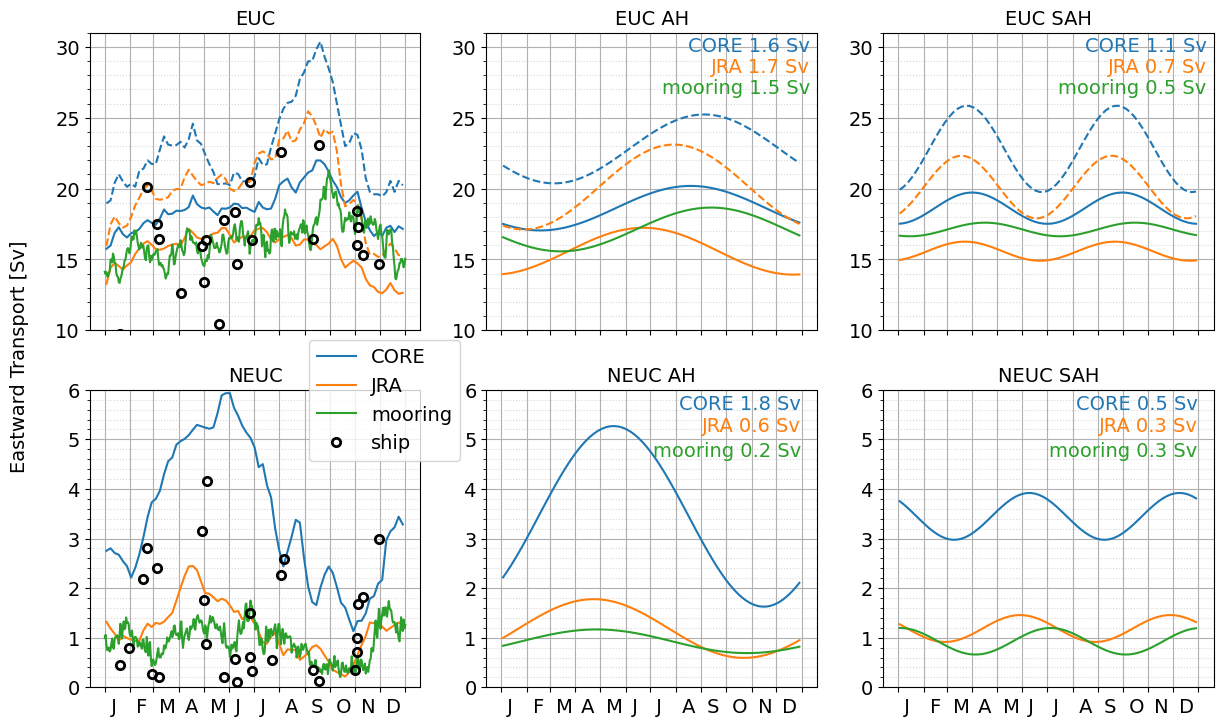

In [47]:
fig,axs = plt.subplots(2,3,figsize=[14.5,8.5],sharex=True)
title = ['EUC','EUC AH','EUC SAH','NEUC','NEUC AH','NEUC SAH']

EUC_CORE_cyc.T_30.plot.line('C0',ax=axs[0,0],label='CORE',ylim = [10,31])
# EUC_CORE_AH_SAH_CYC.plot.line('--C0',ax=axs[0],x='dayofyear',label='CORE AH+SAH')
EUC_CORE_AH_CYC.plot.line('C0',ax=axs[0,1],x='dayofyear',label='CORE AH',ylim = [10,31])
EUC_CORE_SAH_CYC.plot.line('C0',ax=axs[0,2],x='dayofyear',label='CORE SAH',ylim = [10,31])

EUC_CORE_cyc.INT_3.plot.line('--C0',ax=axs[0,0],label='CORE W=3°')
# EUC_CORE_AH_SAH_CYC.plot.line('--C0',ax=axs[0],x='dayofyear',label='CORE AH+SAH')
EUC3_CORE_AH_CYC.plot.line('--C0',ax=axs[0,1],x='dayofyear',label='CORE AH W=3°')
EUC3_CORE_SAH_CYC.plot.line('--C0',ax=axs[0,2],x='dayofyear',label='CORE SAH W=3°')

EUC_JRA_cyc.T_30.plot.line('C1',ax=axs[0,0],label='JRA')
# EUC_JRA_AH_SAH_CYC.plot.line('--C1',ax=axs[0],x='dayofyear',label='JRA AH+SAH')
EUC_JRA_AH_CYC.plot.line('C1',ax=axs[0,1],x='dayofyear',label='JRA AH')
EUC_JRA_SAH_CYC.plot.line('C1',ax=axs[0,2],x='dayofyear',label='JRA SAH')

EUC_JRA_cyc.INT_3.plot.line('--C1',ax=axs[0,0],label='JRA W=3°')
# EUC_JRA_AH_SAH_CYC.plot.line('--C1',ax=axs[0],x='dayofyear',label='JRA AH+SAH')
EUC3_JRA_AH_CYC.plot.line('--C1',ax=axs[0,1],x='dayofyear',label='JRA AH W=3°')
EUC3_JRA_SAH_CYC.plot.line('--C1',ax=axs[0,2],x='dayofyear',label='JRA SAH W=3°')

EUC_moor_cyc.plot.line('C2',ax=axs[0,0],label='mooring')
# EUC_moor_AH_SAH_CYC.plot.line('--C2',ax=axs[0],x='dayofyear',label='moor AH+SAH')
EUC_moor_AH_CYC.plot.line('C2',ax=axs[0,1],x='dayofyear',label='moor AH')
EUC_moor_SAH_CYC.plot.line('C2',ax=axs[0,2],x='dayofyear',label='moor SAH')

EUC_ship_cyc.plot.line('ok',ax=axs[0,0],label='ship',markerfacecolor='None',markeredgewidth=2)

NEUC_CORE_cyc.T_fixed.plot.line(ax=axs[1,0],label='CORE',ylim = [0,6])
# NEUC_CORE_AH_SAH_CYC.plot.line('--C0',ax=axs[1],x='dayofyear',label='CORE AH+SAH')
NEUC_CORE_AH_CYC.plot.line('C0',ax=axs[1,1],x='dayofyear',label='CORE AH',ylim = [0,6])
NEUC_CORE_SAH_CYC.plot.line('C0',ax=axs[1,2],x='dayofyear',label='CORE SAH',ylim = [0,6])

NEUC_JRA_cyc.T_fixed.plot.line(ax=axs[1,0],label='JRA')
# NEUC_JRA_AH_SAH_CYC.plot.line('--C1',ax=axs[1],x='dayofyear',label='JRA AH+SAH')
NEUC_JRA_AH_CYC.plot.line('C1',ax=axs[1,1],x='dayofyear',label='JRA AH')
NEUC_JRA_SAH_CYC.plot.line('C1',ax=axs[1,2],x='dayofyear',label='JRA SAH')

NEUC_moor_cyc.plot.line(ax=axs[1,0],label='mooring')
# NEUC_moor_AH_SAH_CYC.plot.line('--C2',ax=axs[0],x='dayofyear',label='moor AH+SAH')
NEUC_moor_AH_CYC.plot.line('C2',ax=axs[1,1],x='dayofyear',label='moor AH')
NEUC_moor_SAH_CYC.plot.line('C2',ax=axs[1,2],x='dayofyear',label='moor SAH')

NEUC_ship_cyc.plot.line('ok',ax=axs[1,0],label='ship',markerfacecolor='None',markeredgewidth=2)

for i,ax in enumerate(axs.flat):
    ax.grid(which='major')
    ax.grid(which='minor',linestyle=':',alpha=0.5)
    ax.minorticks_on()
    ax.set_title(title[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks(np.cumsum([1,31,28,31,30,31,30,31,31,30,31,30,31]),minor=True)
    ax.set_xticks(np.cumsum([1,31,28,31,30,31,30,31,31,30,31,30,31]))

for i,ax in enumerate(axs[1,:]):
    ax.set_xticklabels((' J',' F',' M',' A',' M',' J',' J',' A',' S',' O',' N',' D',''),ha='left')
    
    
axs[1,0].legend(loc=1, bbox_to_anchor=(1.15,1.2))
fig.text(0.07, 0.5, 'Eastward Transport [Sv]', va='center', rotation='vertical')

### Amplitudes
axs[0,1].annotate(f'CORE {((EUC_CORE_AH_CYC.max()-EUC_CORE_AH_CYC.min())/2).values:.1f} Sv',
              c='C0', xy=(1,1), xycoords='axes fraction',
                xytext=(-5, -3), textcoords='offset points', 
                 ha='right', verticalalignment='top')
axs[0,1].annotate(f'JRA {((EUC_JRA_AH_CYC.max()-EUC_JRA_AH_CYC.min())/2).values:.1f} Sv',
              c='C1', xy=(1,1), xycoords='axes fraction',
                xytext=(-5, -18), textcoords='offset points', 
                 ha='right', verticalalignment='top')
axs[0,1].annotate(f'mooring {((EUC_moor_AH_CYC.max()-EUC_moor_AH_CYC.min())/2).values:.1f} Sv',
              c='C2', xy=(1,1), xycoords='axes fraction',
                xytext=(-5, -33), textcoords='offset points', 
                 ha='right', verticalalignment='top')

axs[0,2].annotate(f'CORE {((EUC_CORE_SAH_CYC.max()-EUC_CORE_SAH_CYC.min())/2).values:.1f} Sv',
              c='C0', xy=(1,1), xycoords='axes fraction',
                xytext=(-5, -3), textcoords='offset points', 
                 ha='right', verticalalignment='top')
axs[0,2].annotate(f'JRA {((EUC_JRA_SAH_CYC.max()-EUC_JRA_SAH_CYC.min())/2).values:.1f} Sv',
              c='C1', xy=(1,1), xycoords='axes fraction',
                xytext=(-5, -18), textcoords='offset points', 
                 ha='right', verticalalignment='top')
axs[0,2].annotate(f'mooring {((EUC_moor_SAH_CYC.max()-EUC_moor_SAH_CYC.min())/2).values:.1f} Sv',
              c='C2', xy=(1,1), xycoords='axes fraction',
                xytext=(-5, -33), textcoords='offset points', 
                 ha='right', verticalalignment='top')

axs[1,1].text(365, 5.6,
              f'CORE {((NEUC_CORE_AH_CYC.max()-NEUC_CORE_AH_CYC.min())/2).values:.1f} Sv',
              c='C0',ha='right')
axs[1,1].text(365, 5.15,
              f'JRA {((NEUC_JRA_AH_CYC.max()-NEUC_JRA_AH_CYC.min())/2).values:.1f} Sv',
              c='C1',ha='right')
axs[1,1].text(365, 4.65,
              f'mooring {((NEUC_moor_AH_CYC.max()-NEUC_moor_AH_CYC.min())/2).values:.1f} Sv',
              c='C2',ha='right')

axs[1,2].text(365, 5.6,
              f'CORE {((NEUC_CORE_SAH_CYC.max()-NEUC_CORE_SAH_CYC.min())/2).values:.1f} Sv',
              c='C0',ha='right')
axs[1,2].text(365, 5.15,
              f'JRA {((NEUC_JRA_SAH_CYC.max()-NEUC_JRA_SAH_CYC.min())/2).values:.1f} Sv',
              c='C1',ha='right')
axs[1,2].text(365, 4.65,
              f'mooring {((NEUC_moor_SAH_CYC.max()-NEUC_moor_SAH_CYC.min())/2).values:.1f} Sv',
              c='C2',ha='right')

if savefig:
    plt.savefig((out_dir_fig / f"NEUC_EUC_INT_3W_model_mooring_seas_cyc{fig_format}"),dpi=300,bbox_inches='tight')

In [48]:
print(f'Amplitude of EUC annual cycle in CORE is {((EUC_CORE_AH_CYC.max()-EUC_CORE_AH_CYC.min())/2).values:.1f} Sv')
print(f'Amplitude of EUC annual cycle in JRA is {((EUC_JRA_AH_CYC.max()-EUC_JRA_AH_CYC.min())/2).values:.1f} Sv')
print(f'Amplitude of EUC annual cycle in moor is {((EUC_moor_AH_CYC.max()-EUC_moor_AH_CYC.min())/2).values:.1f} Sv')

print(f'Amplitude of EUC semi-annual cycle in CORE is {((EUC_CORE_SAH_CYC.max()-EUC_CORE_SAH_CYC.min())/2).values:.1f} Sv')
print(f'Amplitude of EUC semi-annual cycle in JRA is {((EUC_JRA_SAH_CYC.max()-EUC_JRA_SAH_CYC.min())/2).values:.1f} Sv')
print(f'Amplitude of EUC semi-annual cycle in moor is {((EUC_moor_SAH_CYC.max()-EUC_moor_SAH_CYC.min())/2).values:.1f} Sv')

print(f'Amplitude of EUC W=3° annual cycle in CORE is {((EUC3_CORE_AH_CYC.max()-EUC3_CORE_AH_CYC.min())/2).values:.1f} Sv')
print(f'Amplitude of EUC W=3° annual cycle in JRA is {((EUC3_JRA_AH_CYC.max()-EUC3_JRA_AH_CYC.min())/2).values:.1f} Sv')

Amplitude of EUC annual cycle in CORE is 1.6 Sv
Amplitude of EUC annual cycle in JRA is 1.7 Sv
Amplitude of EUC annual cycle in moor is 1.5 Sv
Amplitude of EUC semi-annual cycle in CORE is 1.1 Sv
Amplitude of EUC semi-annual cycle in JRA is 0.7 Sv
Amplitude of EUC semi-annual cycle in moor is 0.5 Sv
Amplitude of EUC W=3° annual cycle in CORE is 2.4 Sv
Amplitude of EUC W=3° annual cycle in JRA is 3.0 Sv


In [49]:
print(f'Phase of EUC AH max in CORE ', str(datetime.datetime.strptime(f'2022 {int(EUC_CORE_AH_CYC.idxmax().values)}', '%Y %j')))
print(f'Phase of EUC AH max in JRA ', str(datetime.datetime.strptime(f'2022 {int(EUC_JRA_AH_CYC.idxmax().values)}', '%Y %j')))
print(f'Phase of EUC AH max in moor ', str(datetime.datetime.strptime(f'2022 {int(EUC_moor_AH_CYC.idxmax().values)}', '%Y %j')))

print(f'Phase of EUC SAH max in CORE ' + str(datetime.datetime.strptime(f'2022 {int(EUC_CORE_SAH_CYC.sel(dayofyear=slice(180,None)).idxmax().values)}', '%Y %j')))
print(f'Phase of EUC SAH max in JRA ' + str(datetime.datetime.strptime(f'2022 {int(EUC_JRA_SAH_CYC.sel(dayofyear=slice(180,None)).idxmax().values)}', '%Y %j')))
print(f'Phase of EUC SAH max in moor ' + str(datetime.datetime.strptime(f'2022 {int(EUC_moor_SAH_CYC.sel(dayofyear=slice(180,None)).idxmax().values)}', '%Y %j')))

print(f'Phase of EUC W=3° AH max in CORE ', str(datetime.datetime.strptime(f'2022 {int(EUC3_CORE_AH_CYC.idxmax().values)}', '%Y %j')))
print(f'Phase of EUC W=3° AH max in JRA ', str(datetime.datetime.strptime(f'2022 {int(EUC3_JRA_AH_CYC.idxmax().values)}', '%Y %j')))
print(f'Phase of EUC W=3° SAH max in CORE ' + str(datetime.datetime.strptime(f'2022 {int(EUC3_CORE_SAH_CYC.sel(dayofyear=slice(180,None)).idxmax().values)}', '%Y %j')))
print(f'Phase of EUC W=3° SAH max in JRA ' + str(datetime.datetime.strptime(f'2022 {int(EUC3_JRA_SAH_CYC.sel(dayofyear=slice(180,None)).idxmax().values)}', '%Y %j')))

EUC3_CORE_AH_CYC.idxmax().values-EUC3_JRA_AH_CYC.idxmax().values

Phase of EUC AH max in CORE  2022-08-21 00:00:00
Phase of EUC AH max in JRA  2022-06-22 00:00:00
Phase of EUC AH max in moor  2022-09-15 00:00:00
Phase of EUC SAH max in CORE 2022-09-30 00:00:00
Phase of EUC SAH max in JRA 2022-09-20 00:00:00
Phase of EUC SAH max in moor 2022-10-15 00:00:00
Phase of EUC W=3° AH max in CORE  2022-09-05 00:00:00
Phase of EUC W=3° AH max in JRA  2022-08-01 00:00:00
Phase of EUC W=3° SAH max in CORE 2022-09-25 00:00:00
Phase of EUC W=3° SAH max in JRA 2022-09-15 00:00:00


35.0

In [50]:
print(f'Amplitude of NEUC annual cycle in CORE is {((NEUC_CORE_AH_CYC.max()-NEUC_CORE_AH_CYC.min())/2).values:.1f} Sv')
print(f'Amplitude of NEUC annual cycle in JRA is {((NEUC_JRA_AH_CYC.max()-NEUC_JRA_AH_CYC.min())/2).values:.1f} Sv')
print(f'Amplitude of NEUC annual cycle in moor is {((NEUC_moor_AH_CYC.max()-NEUC_moor_AH_CYC.min())/2).values:.1f} Sv')

print(f'Amplitude of NEUC semi-annual cycle in CORE is {((NEUC_CORE_SAH_CYC.max()-NEUC_CORE_SAH_CYC.min())/2).values:.1f} Sv')
print(f'Amplitude of NEUC semi-annual cycle in JRA is {((NEUC_JRA_SAH_CYC.max()-NEUC_JRA_SAH_CYC.min())/2).values:.1f} Sv')
print(f'Amplitude of NEUC semi-annual cycle in moor is {((NEUC_moor_SAH_CYC.max()-NEUC_moor_SAH_CYC.min())/2).values:.1f} Sv')

Amplitude of NEUC annual cycle in CORE is 1.8 Sv
Amplitude of NEUC annual cycle in JRA is 0.6 Sv
Amplitude of NEUC annual cycle in moor is 0.2 Sv
Amplitude of NEUC semi-annual cycle in CORE is 0.5 Sv
Amplitude of NEUC semi-annual cycle in JRA is 0.3 Sv
Amplitude of NEUC semi-annual cycle in moor is 0.3 Sv


In [51]:
print(f'Phase of NEUC AH max in CORE ', str(datetime.datetime.strptime(f'2022 {int(NEUC_CORE_AH_CYC.idxmax().values)}', '%Y %j')))
print(f'Phase of NEUC AH max in JRA ', str(datetime.datetime.strptime(f'2022 {int(NEUC_JRA_AH_CYC.idxmax().values)}', '%Y %j')))
print(f'Phase of NEUC AH max in moor ', str(datetime.datetime.strptime(f'2022 {int(NEUC_moor_AH_CYC.idxmax().values)}', '%Y %j')))

print(f'Phase of NEUC SAH max in CORE ' + str(datetime.datetime.strptime(f'2022 {int(NEUC_CORE_SAH_CYC.sel(dayofyear=slice(180,None)).idxmax().values)}', '%Y %j')))
print(f'Phase of NEUC SAH max in JRA ' + str(datetime.datetime.strptime(f'2022 {int(NEUC_JRA_SAH_CYC.sel(dayofyear=slice(180,None)).idxmax().values)}', '%Y %j')))
print(f'Phase of NEUC SAH max in moor ' + str(datetime.datetime.strptime(f'2022 {int(NEUC_moor_SAH_CYC.sel(dayofyear=slice(None,180)).idxmax().values)}', '%Y %j')))

Phase of NEUC AH max in CORE  2022-05-18 00:00:00
Phase of NEUC AH max in JRA  2022-04-23 00:00:00
Phase of NEUC AH max in moor  2022-04-28 00:00:00
Phase of NEUC SAH max in CORE 2022-12-09 00:00:00
Phase of NEUC SAH max in JRA 2022-11-29 00:00:00
Phase of NEUC SAH max in moor 2022-01-03 00:00:00


# Seasonal cycle Model

In [52]:
tlim_min_J,tlim_max_J = '1980','2009' #'2000','2018'
tlim_min_C,tlim_max_C = '1980','2009' #'1991','2019'

# seasonal cyc model
with xr.set_options(keep_attrs=True):
    NEUC_JRA_cyc = NEUC_JRA.sel(time_counter=slice(tlim_min_J,tlim_max_J)).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').compute()
    NEUC_CORE_cyc = NEUC_CORE.sel(time_counter=slice(tlim_min_C,tlim_max_C)).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').compute()
    EUC_JRA_cyc = EUC_JRA.sel(time_counter=slice(tlim_min_J,tlim_max_J)).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').compute()
    EUC_CORE_cyc = EUC_CORE.sel(time_counter=slice(tlim_min_C,tlim_max_C)).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').compute()
    SEUC_JRA_cyc = SEUC_JRA.sel(time_counter=slice(tlim_min_J,tlim_max_J)).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').compute()
    SEUC_CORE_cyc = SEUC_CORE.sel(time_counter=slice(tlim_min_C,tlim_max_C)).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').compute()
    NECC_JRA_cyc = NECC_JRA.sel(time_counter=slice(tlim_min_J,tlim_max_J)).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').compute()
    NECC_CORE_cyc = NECC_CORE.sel(time_counter=slice(tlim_min_C,tlim_max_C)).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').compute()
    nSECu_JRA_cyc = nSECu_JRA.sel(time_counter=slice(tlim_min_J,tlim_max_J)).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').compute()
    nSECu_CORE_cyc = nSECu_CORE.sel(time_counter=slice(tlim_min_C,tlim_max_C)).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').compute()
    nSECl_JRA_cyc = nSECl_JRA.sel(time_counter=slice(tlim_min_J,tlim_max_J)).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').compute()
    nSECl_CORE_cyc = nSECl_CORE.sel(time_counter=slice(tlim_min_C,tlim_max_C)).groupby(
        'time_counter.dayofyear').mean(dim='time_counter').compute()

# seasonal cyc ship
with xr.set_options(keep_attrs=True):
    NEUC_ship_cyc = NEUC_obs.groupby('time.dayofyear').mean('time')
    EUC_ship_cyc = EUC_obs.groupby('time.dayofyear').mean('time')
    SEUC_ship_cyc = SEUC_obs.groupby('time.dayofyear').mean('time')
    NECC_ship_cyc = NECC_obs.groupby('time.dayofyear').mean('time')
    nSECu_ship_cyc = nSECu_obs.groupby('time.dayofyear').mean('time')
    nSECl_ship_cyc = nSECl_obs.groupby('time.dayofyear').mean('time')

2024-01-29 11:17:08,486 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:17:17,839 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:17:19,045 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:17:20,432 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:17:41,139 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:17:42,309 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:17:43,782 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2024-01-29 11:17:52,541 - distributed.utils_perf - WARNING - full garbage collections took

In [53]:
# seasonal cyc ship
with xr.set_options(keep_attrs=True):
    NEUC_35_ship_cyc = NEUC_obs_35.groupby('time.dayofyear').mean('time')
    EUC_35_ship_cyc = EUC_obs_35.groupby('time.dayofyear').mean('time')
    nSECu_35_ship_cyc = nSECu_obs_35.groupby('time.dayofyear').mean('time')
    nSECl_35_ship_cyc = nSECl_obs_35.groupby('time.dayofyear').mean('time')

In [54]:
# harmonic cycles model
with xr.set_options(keep_attrs=True):
    NEUC_JRA_AH_SAH_CYC,NEUC_JRA_SAH_CYC,NEUC_JRA_AH_CYC = calc_AH_SAH_model(
        NEUC_JRA.sel(lon=-23,method='nearest').INT.sel(time_counter=slice(tlim_min_J,tlim_max_J)),NEUC_JRA_cyc)
    NEUC_CORE_AH_SAH_CYC,NEUC_CORE_SAH_CYC,NEUC_CORE_AH_CYC = calc_AH_SAH_model(
        NEUC_CORE.sel(lon=-23,method='nearest').INT.sel(time_counter=slice(tlim_min_C,tlim_max_C)),NEUC_CORE_cyc)

    EUC_JRA_AH_SAH_CYC,EUC_JRA_SAH_CYC,EUC_JRA_AH_CYC = calc_AH_SAH_model(
        EUC_JRA.sel(lon=-23,method='nearest').INT.sel(time_counter=slice(tlim_min_J,tlim_max_J)),EUC_JRA_cyc)
    EUC3_JRA_AH_SAH_CYC,EUC3_JRA_SAH_CYC,EUC3_JRA_AH_CYC = calc_AH_SAH_model(
        EUC_JRA.sel(lon=-23,method='nearest').INT_3.sel(time_counter=slice(tlim_min_J,tlim_max_J)),EUC_JRA_cyc)        

    EUC_CORE_AH_SAH_CYC,EUC_CORE_SAH_CYC,EUC_CORE_AH_CYC = calc_AH_SAH_model(
        EUC_CORE.sel(lon=-23,method='nearest').INT.sel(time_counter=slice(tlim_min_C,tlim_max_C)),EUC_CORE_cyc)
    EUC3_CORE_AH_SAH_CYC,EUC3_CORE_SAH_CYC,EUC3_CORE_AH_CYC = calc_AH_SAH_model(
        EUC_CORE.sel(lon=-23,method='nearest').INT_3.sel(time_counter=slice(tlim_min_C,tlim_max_C)),EUC_CORE_cyc)    

    SEUC_JRA_AH_SAH_CYC,SEUC_JRA_SAH_CYC,SEUC_JRA_AH_CYC = calc_AH_SAH_model(
        SEUC_JRA.sel(lon=-23,method='nearest').INT.sel(time_counter=slice(tlim_min_J,tlim_max_J)),SEUC_JRA_cyc)
    SEUC_CORE_AH_SAH_CYC,SEUC_CORE_SAH_CYC,SEUC_CORE_AH_CYC = calc_AH_SAH_model(
        SEUC_CORE.sel(lon=-23,method='nearest').INT.sel(time_counter=slice(tlim_min_C,tlim_max_C)),SEUC_CORE_cyc)

    NECC_JRA_AH_SAH_CYC,NECC_JRA_SAH_CYC,NECC_JRA_AH_CYC = calc_AH_SAH_model(
        NECC_JRA.sel(lon=-23,method='nearest').INT.sel(time_counter=slice(tlim_min_J,tlim_max_J)),NECC_JRA_cyc)
    NECC_CORE_AH_SAH_CYC,NECC_CORE_SAH_CYC,NECC_CORE_AH_CYC = calc_AH_SAH_model(
        NECC_CORE.sel(lon=-23,method='nearest').INT.sel(time_counter=slice(tlim_min_C,tlim_max_C)),NECC_CORE_cyc)     

    nSECu_JRA_AH_SAH_CYC,nSECu_JRA_SAH_CYC,nSECu_JRA_AH_CYC = calc_AH_SAH_model(
        nSECu_JRA.sel(lon=-23,method='nearest').INT.sel(time_counter=slice(tlim_min_J,tlim_max_J)).fillna(0),nSECu_JRA_cyc)
    nSECu_CORE_AH_SAH_CYC,nSECu_CORE_SAH_CYC,nSECu_CORE_AH_CYC = calc_AH_SAH_model(
        nSECu_CORE.sel(lon=-23,method='nearest').INT.sel(time_counter=slice(tlim_min_J,tlim_max_J)).fillna(0),nSECu_CORE_cyc)
    
    nSECl_JRA_AH_SAH_CYC,nSECl_JRA_SAH_CYC,nSECl_JRA_AH_CYC = calc_AH_SAH_model(
        nSECl_JRA.sel(lon=-23,method='nearest').INT.sel(time_counter=slice(tlim_min_J,tlim_max_J)),nSECl_JRA_cyc)
    nSECl_CORE_AH_SAH_CYC,nSECl_CORE_SAH_CYC,nSECl_CORE_AH_CYC = calc_AH_SAH_model(
        nSECl_CORE.sel(lon=-23,method='nearest').INT.sel(time_counter=slice(tlim_min_C,tlim_max_C)),nSECl_CORE_cyc)
    
# harmonic cycles model
lon_idx=-35
with xr.set_options(keep_attrs=True):
    NEUC_35_JRA_AH_SAH_CYC,NEUC_35_JRA_SAH_CYC,NEUC_35_JRA_AH_CYC = calc_AH_SAH_model(
        NEUC_JRA.sel(lon=lon_idx,method='nearest').INT.sel(time_counter=slice(tlim_min_J,tlim_max_J)),NEUC_JRA_cyc)
    NEUC_35_CORE_AH_SAH_CYC,NEUC_35_CORE_SAH_CYC,NEUC_35_CORE_AH_CYC = calc_AH_SAH_model(
        NEUC_CORE.sel(lon=lon_idx,method='nearest').INT.sel(time_counter=slice(tlim_min_C,tlim_max_C)),NEUC_CORE_cyc)

    EUC_35_JRA_AH_SAH_CYC,EUC_35_JRA_SAH_CYC,EUC_35_JRA_AH_CYC = calc_AH_SAH_model(
        EUC_JRA.sel(lon=lon_idx,method='nearest').INT.sel(time_counter=slice(tlim_min_J,tlim_max_J)),EUC_JRA_cyc)
    EUC_35_CORE_AH_SAH_CYC,EUC_35_CORE_SAH_CYC,EUC_35_CORE_AH_CYC = calc_AH_SAH_model(
        EUC_CORE.sel(lon=lon_idx,method='nearest').INT.sel(time_counter=slice(tlim_min_C,tlim_max_C)),EUC_CORE_cyc)

    NECC_35_JRA_AH_SAH_CYC,NECC_35_JRA_SAH_CYC,NECC_35_JRA_AH_CYC = calc_AH_SAH_model(
        NECC_JRA.sel(lon=lon_idx,method='nearest').INT.sel(time_counter=slice(tlim_min_J,tlim_max_J)),NECC_JRA_cyc)
    NECC_35_CORE_AH_SAH_CYC,NECC_35_CORE_SAH_CYC,NECC_35_CORE_AH_CYC = calc_AH_SAH_model(
        NECC_CORE.sel(lon=lon_idx,method='nearest').INT.sel(time_counter=slice(tlim_min_C,tlim_max_C)),NECC_CORE_cyc)     

    nSECu_35_JRA_AH_SAH_CYC,nSECu_35_JRA_SAH_CYC,nSECu_35_JRA_AH_CYC = calc_AH_SAH_model(
        nSECu_JRA.sel(lon=lon_idx,method='nearest').INT.sel(time_counter=slice(tlim_min_J,tlim_max_J)).fillna(0),nSECu_JRA_cyc)
    nSECu_35_CORE_AH_SAH_CYC,nSECu_35_CORE_SAH_CYC,nSECu_35_CORE_AH_CYC = calc_AH_SAH_model(
        nSECu_CORE.sel(lon=lon_idx,method='nearest').INT.sel(time_counter=slice(tlim_min_J,tlim_max_J)).fillna(0),nSECu_CORE_cyc)
    
    nSECl_35_JRA_AH_SAH_CYC,nSECl_35_JRA_SAH_CYC,nSECl_35_JRA_AH_CYC = calc_AH_SAH_model(
        nSECl_JRA.sel(lon=lon_idx,method='nearest').INT.sel(time_counter=slice(tlim_min_J,tlim_max_J)),nSECl_JRA_cyc)
    nSECl_35_CORE_AH_SAH_CYC,nSECl_35_CORE_SAH_CYC,nSECl_35_CORE_AH_CYC = calc_AH_SAH_model(
        nSECl_CORE.sel(lon=lon_idx,method='nearest').INT.fillna(0).sel(time_counter=slice(tlim_min_C,tlim_max_C)),nSECl_CORE_cyc)

2024-01-29 11:19:04,317 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:19:10,624 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:19:12,406 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:19:14,714 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:19:17,627 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:19:20,504 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-01-29 11:19:36,514 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-01-29 11:19:47,424 - distributed.utils_perf - WARNING - full garbage collections took

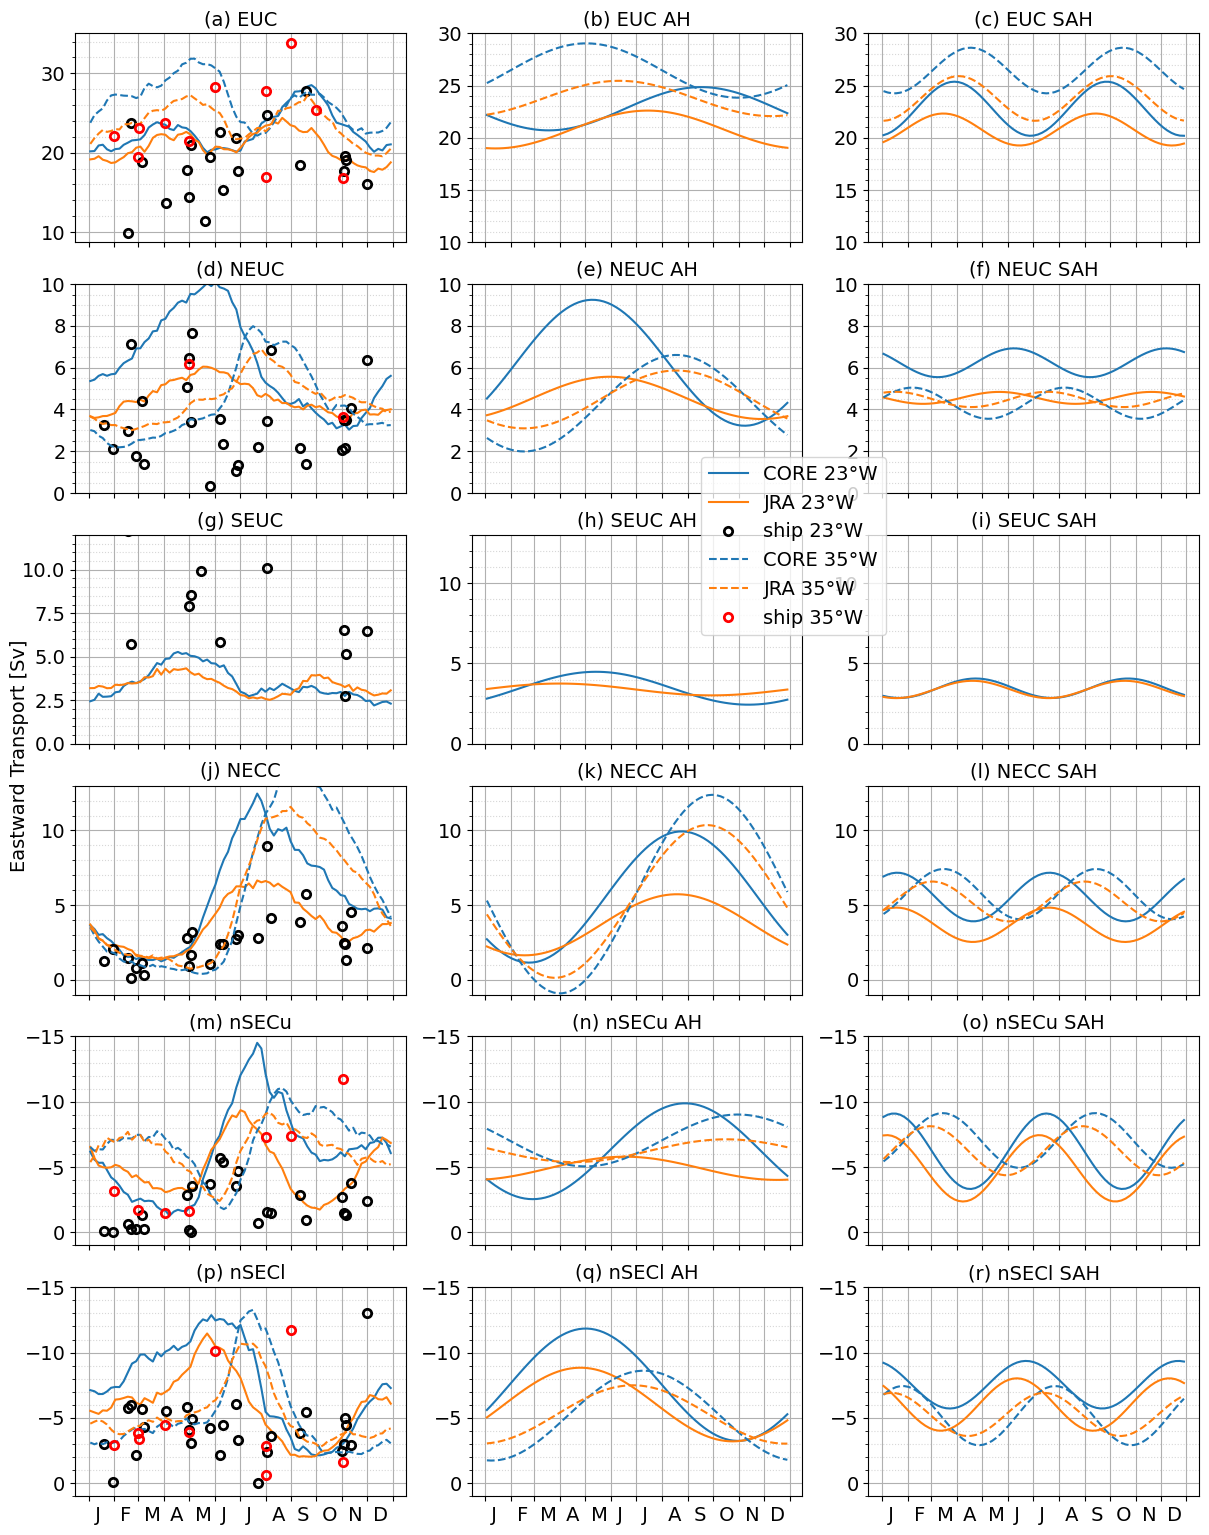

In [55]:
fig,axs = plt.subplots(6,3,figsize=[14.5,19],sharex=True)
title = ['(a) EUC','(b) EUC AH','(c) EUC SAH',
         '(d) NEUC','(e) NEUC AH','(f) NEUC SAH',
         '(g) SEUC','(h) SEUC AH','(i) SEUC SAH',
         '(j) NECC','(k) NECC AH','(l) NECC SAH',
         '(m) nSECu','(n) nSECu AH','(o) nSECu SAH',
         '(p) nSECl','(q) nSECl AH','(r) nSECl SAH']

EUC_CORE_cyc.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[0,0],label='CORE 23°W')
EUC_JRA_cyc.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[0,0],label='JRA 23°W')
EUC_ship_cyc.INT.plot.line('ok',ax=axs[0,0],label='ship 23°W',markerfacecolor='None',markeredgewidth=2)
EUC_CORE_AH_CYC.plot.line(ax=axs[0,1],x='dayofyear',label='CORE AH  23°W',ylim = [10,30])
EUC_JRA_AH_CYC.plot.line(ax=axs[0,1],x='dayofyear',label='JRA AH  23°W')
EUC_CORE_SAH_CYC.plot.line(ax=axs[0,2],x='dayofyear',label='CORE SAH  23°W',ylim = [10,30])
EUC_JRA_SAH_CYC.plot.line(ax=axs[0,2],x='dayofyear',label='JRA SAH  23°W')

EUC_CORE_cyc.INT.sel(lon=-35,method='nearest').plot.line('--',ax=axs[0,0],color='C0',label='CORE 35°W')
EUC_JRA_cyc.INT.sel(lon=-35,method='nearest').plot.line('--',ax=axs[0,0],color='C1',label='JRA 35°W')
EUC_35_ship_cyc.INT.plot.line('or',ax=axs[0,0],label='ship 35°W',markerfacecolor='None',markeredgewidth=2)
EUC_35_CORE_AH_CYC.plot.line('--',ax=axs[0,1],color='C0',x='dayofyear',label='CORE AH 35°W')
EUC_35_JRA_AH_CYC.plot.line('--',ax=axs[0,1],color='C1',x='dayofyear',label='JRA AH 35°w')
EUC_35_CORE_SAH_CYC.plot.line('--',ax=axs[0,2],color='C0',x='dayofyear',label='CORE SAH 35°W')
EUC_35_JRA_SAH_CYC.plot.line('--',ax=axs[0,2],color='C1',x='dayofyear',label='JRA SAH 35°W')

NEUC_CORE_cyc.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[1,0],color='C0',label='CORE',ylim = [0,10])
NEUC_JRA_cyc.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[1,0],color='C1',label='JRA')
NEUC_ship_cyc.INT.plot.line('ok',ax=axs[1,0],label='ship sections',markerfacecolor='None',markeredgewidth=2)
NEUC_CORE_AH_CYC.plot.line(ax=axs[1,1],x='dayofyear',label='CORE AH',ylim = [0,10])
NEUC_JRA_AH_CYC.plot.line(ax=axs[1,1],x='dayofyear',label='JRA AH')
NEUC_CORE_SAH_CYC.plot.line(ax=axs[1,2],x='dayofyear',label='CORE SAH',ylim = [0,10])
NEUC_JRA_SAH_CYC.plot.line(ax=axs[1,2],x='dayofyear',label='JRA SAH')

NEUC_CORE_cyc.INT.sel(lon=-35,method='nearest').plot.line('--',ax=axs[1,0],color='C0',label='CORE')
NEUC_JRA_cyc.INT.sel(lon=-35,method='nearest').plot.line('--',ax=axs[1,0],color='C1',label='JRA')
NEUC_35_ship_cyc.INT.plot.line('or',ax=axs[1,0],label='ship sections',markerfacecolor='None',markeredgewidth=2)
NEUC_35_CORE_AH_CYC.plot.line('--',ax=axs[1,1],color='C0',x='dayofyear',label='CORE AH 35°W')
NEUC_35_JRA_AH_CYC.plot.line('--',ax=axs[1,1],color='C1',x='dayofyear',label='JRA AH 35°w')
NEUC_35_CORE_SAH_CYC.plot.line('--',ax=axs[1,2],color='C0',x='dayofyear',label='CORE SAH 35°W')
NEUC_35_JRA_SAH_CYC.plot.line('--',ax=axs[1,2],color='C1',x='dayofyear',label='JRA SAH 35°W')

SEUC_CORE_cyc.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[2,0],color='C0',label='CORE',ylim = [0,12])
SEUC_JRA_cyc.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[2,0],color='C1',label='JRA')
SEUC_ship_cyc.INT.plot.line('ok',ax=axs[2,0],label='ship sections',markerfacecolor='None',markeredgewidth=2)
SEUC_CORE_AH_CYC.plot.line(ax=axs[2,1],x='dayofyear',label='CORE AH',ylim = [0,13])
SEUC_JRA_AH_CYC.plot.line(ax=axs[2,1],x='dayofyear',label='JRA AH')
SEUC_CORE_SAH_CYC.plot.line(ax=axs[2,2],x='dayofyear',label='CORE SAH',ylim = [0,13])
SEUC_JRA_SAH_CYC.plot.line(ax=axs[2,2],x='dayofyear',label='JRA SAH')

NECC_CORE_cyc.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[3,0],color='C0',label='CORE',ylim = [-1,13])
NECC_JRA_cyc.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[3,0],color='C1',label='JRA')
NECC_ship_cyc.INT.plot.line('ok',ax=axs[3,0],label='ship sections',markerfacecolor='None',markeredgewidth=2)
NECC_CORE_AH_CYC.plot.line(ax=axs[3,1],x='dayofyear',label='CORE AH',ylim = [-1,13])
NECC_JRA_AH_CYC.plot.line(ax=axs[3,1],x='dayofyear',label='JRA AH')
NECC_CORE_SAH_CYC.plot.line(ax=axs[3,2],x='dayofyear',label='CORE SAH',ylim = [-1,13])
NECC_JRA_SAH_CYC.plot.line(ax=axs[3,2],x='dayofyear',label='JRA SAH')

NECC_CORE_cyc.INT.sel(lon=-35,method='nearest').plot.line('--',ax=axs[3,0],color='C0',label='CORE')
NECC_JRA_cyc.INT.sel(lon=-35,method='nearest').plot.line('--',ax=axs[3,0],color='C1',label='JRA')
NECC_35_CORE_AH_CYC.plot.line('--',ax=axs[3,1],color='C0',x='dayofyear',label='CORE AH 35°W')
NECC_35_JRA_AH_CYC.plot.line('--',ax=axs[3,1],color='C1',x='dayofyear',label='JRA AH 35°w')
NECC_35_CORE_SAH_CYC.plot.line('--',ax=axs[3,2],color='C0',x='dayofyear',label='CORE SAH 35°W')
NECC_35_JRA_SAH_CYC.plot.line('--',ax=axs[3,2],color='C1',x='dayofyear',label='JRA SAH 35°W')

nSECu_CORE_cyc.sel(lon=-23,method='nearest').INT.plot.line(ax=axs[4,0],color='C0',label='CORE',ylim = [1,-15])
nSECu_JRA_cyc.sel(lon=-23,method='nearest').INT.plot.line(ax=axs[4,0],color='C1',label='JRA')
nSECu_ship_cyc.INT.plot.line('ok',ax=axs[4,0],label='ship sections',markerfacecolor='None',markeredgewidth=2)
nSECu_CORE_AH_CYC.plot.line(ax=axs[4,1],x='dayofyear',label='CORE AH',ylim = [1,-15])
nSECu_JRA_AH_CYC.plot.line(ax=axs[4,1],x='dayofyear',label='JRA AH')
nSECu_CORE_SAH_CYC.plot.line(ax=axs[4,2],x='dayofyear',label='CORE SAH',ylim = [1,-15])
nSECu_JRA_SAH_CYC.plot.line(ax=axs[4,2],x='dayofyear',label='JRA SAH')

nSECu_CORE_cyc.INT.sel(lon=-35,method='nearest').plot.line('--',ax=axs[4,0],color='C0',label='CORE')
nSECu_JRA_cyc.INT.sel(lon=-35,method='nearest').plot.line('--',ax=axs[4,0],color='C1',label='JRA')
nSECu_35_ship_cyc.INT.plot.line('or',ax=axs[4,0],label='ship sections',markerfacecolor='None',markeredgewidth=2)
nSECu_35_CORE_AH_CYC.plot.line('--',ax=axs[4,1],color='C0',x='dayofyear',label='CORE AH 35°W')
nSECu_35_JRA_AH_CYC.plot.line('--',ax=axs[4,1],color='C1',x='dayofyear',label='JRA AH 35°w')
nSECu_35_CORE_SAH_CYC.plot.line('--',ax=axs[4,2],color='C0',x='dayofyear',label='CORE SAH 35°W')
nSECu_35_JRA_SAH_CYC.plot.line('--',ax=axs[4,2],color='C1',x='dayofyear',label='JRA SAH 35°W')


nSECl_CORE_cyc.sel(lon=-23,method='nearest').INT.plot.line(ax=axs[5,0],color='C0',label='CORE',ylim = [1,-15])
nSECl_JRA_cyc.sel(lon=-23,method='nearest').INT.plot.line(ax=axs[5,0],color='C1',label='JRA')
nSECl_ship_cyc.INT.plot.line('ok',ax=axs[5,0],label='ship sections',markerfacecolor='None',markeredgewidth=2)
nSECl_CORE_AH_CYC.plot.line(ax=axs[5,1],x='dayofyear',label='CORE AH',ylim = [1,-15])
nSECl_JRA_AH_CYC.plot.line(ax=axs[5,1],x='dayofyear',label='JRA AH')
nSECl_CORE_SAH_CYC.plot.line(ax=axs[5,2],x='dayofyear',label='CORE SAH',ylim = [1,-15])
nSECl_JRA_SAH_CYC.plot.line(ax=axs[5,2],x='dayofyear',label='JRA SAH')

nSECl_CORE_cyc.INT.sel(lon=-35,method='nearest').plot.line('--',ax=axs[5,0],color='C0',label='CORE')
nSECl_JRA_cyc.INT.sel(lon=-35,method='nearest').plot.line('--',ax=axs[5,0],color='C1',label='JRA')
nSECl_35_ship_cyc.INT.plot.line('or',ax=axs[5,0],label='ship sections',markerfacecolor='None',markeredgewidth=2)
nSECl_35_CORE_AH_CYC.plot.line('--',ax=axs[5,1],color='C0',x='dayofyear',label='CORE AH 35°W')
nSECl_35_JRA_AH_CYC.plot.line('--',ax=axs[5,1],color='C1',x='dayofyear',label='JRA AH 35°w')
nSECl_35_CORE_SAH_CYC.plot.line('--',ax=axs[5,2],color='C0',x='dayofyear',label='CORE SAH 35°W')
nSECl_35_JRA_SAH_CYC.plot.line('--',ax=axs[5,2],color='C1',x='dayofyear',label='JRA SAH 35°W')

for i,ax in enumerate(axs.flat):
    ax.grid(which='major')
    ax.grid(which='minor',linestyle=':',alpha=0.5)
    ax.minorticks_on()
    ax.set_title(title[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks(np.cumsum([1,31,28,31,30,31,30,31,31,30,31,30,31]),minor=True)
    ax.set_xticks(np.cumsum([1,31,28,31,30,31,30,31,31,30,31,30,31]))

for i,ax in enumerate(axs[5]):  
    ax.set_xticklabels((' J',' F',' M',' A',' M',' J',' J',' A',' S',' O',' N',' D',''),ha='left')
    
# axs[1,0].legend(loc=1, bbox_to_anchor=(2.2,-1.5))
handles, labels = axs[0,0].get_legend_handles_labels()
lgd = fig.legend(handles, labels,loc='center left', bbox_to_anchor=(0.55, 0.61))
fig.text(0.08, 0.5, 'Eastward Transport [Sv]', va='center', rotation='vertical')

if savefig:
    plt.savefig((out_dir_fig / f"Currents_INT_model_mooring_seas_cyc_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')

In [56]:
print(f'Amplitude of EUC W=3° annual cycle in CORE is {((EUC3_CORE_AH_CYC.max()-EUC3_CORE_AH_CYC.min())/2).values:.1f} Sv')
print(f'Amplitude of EUC W=3° annual cycle in JRA is {((EUC3_JRA_AH_CYC.max()-EUC3_JRA_AH_CYC.min())/2).values:.1f} Sv')

print(f'Amplitude of EUC W=3° semi-annual cycle in CORE is {((EUC3_CORE_SAH_CYC.max()-EUC3_CORE_SAH_CYC.min())/2).values:.1f} Sv')
print(f'Amplitude of EUC W=3° semi-annual cycle in JRA is {((EUC3_JRA_SAH_CYC.max()-EUC3_JRA_SAH_CYC.min())/2).values:.1f} Sv')

Amplitude of EUC W=3° annual cycle in CORE is 2.3 Sv
Amplitude of EUC W=3° annual cycle in JRA is 1.9 Sv
Amplitude of EUC W=3° semi-annual cycle in CORE is 2.9 Sv
Amplitude of EUC W=3° semi-annual cycle in JRA is 1.8 Sv


In [57]:
print(f'Phase of EUC W=2° AH max in CORE ', str(datetime.datetime.strptime(f'2022 {int(EUC_CORE_AH_CYC.idxmax().values)}', '%Y %j')))
print(f'Phase of EUC W=2° AH max in JRA ', str(datetime.datetime.strptime(f'2022 {int(EUC_JRA_AH_CYC.idxmax().values)}', '%Y %j')))

print(f'Phase of EUC W=3° AH max in CORE ', str(datetime.datetime.strptime(f'2022 {int(EUC3_CORE_AH_CYC.idxmax().values)}', '%Y %j')))
print(f'Phase of EUC W=3° AH max in JRA ', str(datetime.datetime.strptime(f'2022 {int(EUC3_JRA_AH_CYC.idxmax().values)}', '%Y %j')))

print(f'Phase of EUC W=3° SAH max in CORE ' + str(datetime.datetime.strptime(f'2022 {int(EUC3_CORE_SAH_CYC.sel(dayofyear=slice(180,None)).idxmax().values)}', '%Y %j')))
print(f'Phase of EUC W=3° SAH max in JRA ' + str(datetime.datetime.strptime(f'2022 {int(EUC3_JRA_SAH_CYC.sel(dayofyear=slice(180,None)).idxmax().values)}', '%Y %j')))

Phase of EUC W=2° AH max in CORE  2022-09-15 00:00:00
Phase of EUC W=2° AH max in JRA  2022-07-17 00:00:00
Phase of EUC W=3° AH max in CORE  2022-09-20 00:00:00
Phase of EUC W=3° AH max in JRA  2022-07-27 00:00:00
Phase of EUC W=3° SAH max in CORE 2022-09-25 00:00:00
Phase of EUC W=3° SAH max in JRA 2022-09-15 00:00:00


In [58]:
# fig,axs = plt.subplots(6,3,figsize=[14.5,19],sharex=True)
# EUC_CORE_cyc.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[0,0],label='INALT20 CORE')
# EUC_CORE_cyc.INT_3.sel(lon=-23,method='nearest').plot.line('--',ax=axs[0,0],color='C0',label='INALT20 CORE W=3°')
# EUC_JRA_cyc.INT.sel(lon=-23,method='nearest').plot.line(ax=axs[0,0],label='INALT20 JRA')
# EUC_JRA_cyc.INT_3.sel(lon=-23,method='nearest').plot.line('--',ax=axs[0,0],color='C1',label='INALT20 JRA W=3°')
# EUC_ship_cyc.INT.plot.line('ok',ax=axs[0,0],label='ship sections',markerfacecolor='None',markeredgewidth=2)

# EUC_CORE_AH_CYC.plot.line(ax=axs[0,1],x='dayofyear',label='CORE AH',ylim = [10,25])
# EUC_JRA_AH_CYC.plot.line(ax=axs[0,1],x='dayofyear',label='JRA AH')

# EUC_CORE_SAH_CYC.plot.line(ax=axs[0,2],x='dayofyear',label='CORE SAH',ylim = [10,25])
# EUC_JRA_SAH_CYC.plot.line(ax=axs[0,2],x='dayofyear',label='JRA SAH')

# Current anomalies with respect to seasonal cycle

In [59]:
EUC_JRA_A = EUC_JRA.groupby('time_counter.dayofyear') - EUC_JRA_cyc
NEUC_JRA_A = NEUC_JRA.groupby('time_counter.dayofyear') - NEUC_JRA_cyc
SEUC_JRA_A = SEUC_JRA.groupby('time_counter.dayofyear') - SEUC_JRA_cyc
NECC_JRA_A = NECC_JRA.groupby('time_counter.dayofyear') - NECC_JRA_cyc
nSECu_JRA_A = nSECu_JRA.groupby('time_counter.dayofyear') - nSECu_JRA_cyc
nSECl_JRA_A = nSECl_JRA.groupby('time_counter.dayofyear') - nSECl_JRA_cyc

EUC_CORE_A = EUC_CORE.groupby('time_counter.dayofyear') - EUC_CORE_cyc
NEUC_CORE_A = NEUC_CORE.groupby('time_counter.dayofyear') - NEUC_CORE_cyc
SEUC_CORE_A = SEUC_CORE.groupby('time_counter.dayofyear') - SEUC_CORE_cyc
NECC_CORE_A = NECC_CORE.groupby('time_counter.dayofyear') - NECC_CORE_cyc
nSECu_CORE_A = nSECu_CORE.groupby('time_counter.dayofyear') - nSECu_CORE_cyc
nSECl_CORE_A = nSECl_CORE.groupby('time_counter.dayofyear') - nSECl_CORE_cyc

2024-01-29 11:20:02,692 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-01-29 11:20:03,743 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-01-29 11:20:04,889 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-01-29 11:20:06,191 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


In [60]:
EUC_JRA_A

<xarray.Dataset>
Dimensions:       (lon: 799, time_counter: 4453)
Coordinates:
  * lon           (lon) float32 -39.92 -39.88 -39.83 ... -0.125 -0.075 -0.025
  * time_counter  (time_counter) datetime64[ns] 1958-01-03T12:00:00 ... 2018-...
    dayofyear     (time_counter) int64 3 8 13 18 23 28 ... 343 348 353 358 363
Data variables:
    Y_CM          (lon, time_counter) float64 dask.array<chunksize=(799, 1), meta=np.ndarray>
    Z_CM          (lon, time_counter) float64 dask.array<chunksize=(799, 1), meta=np.ndarray>
    INT           (lon, time_counter) float64 dask.array<chunksize=(799, 1), meta=np.ndarray>
    INT_2p5       (lon, time_counter) float64 dask.array<chunksize=(799, 1), meta=np.ndarray>
    INT_3         (lon, time_counter) float64 dask.array<chunksize=(799, 1), meta=np.ndarray>
    T_30          (lon, time_counter) float64 dask.array<chunksize=(799, 1), meta=np.ndarray>
    T_0           (lon, time_counter) float64 dask.array<chunksize=(799, 1), meta=np.ndarray>

In [61]:
def plot_annual_anomalie(ds_JRA,ds_CORE,var,ylim,yticks,yticklabels,cmin,cmax,levs,xlim,title=['JRA','CORE']):
    fig,axs = plt.subplots(2,1,figsize=[8.5,9.5])
    fs = 18
    SMALL_SIZE = fs
    MEDIUM_SIZE = fs
    BIGGER_SIZE = fs
    
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    font = {'weight' : 'normal',
            'size'   : fs}
    plt.rc('font', **font)

    im = ds_JRA.groupby('time_counter.year').mean('time_counter').plot(
        ax=axs[0],x='year',y='lon',add_colorbar=False,xlim=xlim,ylim=ylim,
            levels=levs,vmin=cmin,vmax=cmax,
            cmap=co.cm.balance,extend='both')
    ds_CORE.groupby('time_counter.year').mean('time_counter').plot(
        ax=axs[1],x='year',y='lon',add_colorbar=False,xlim=xlim,ylim=ylim,
            levels=levs,vmin=cmin,vmax=cmax,
            cmap=co.cm.balance,extend='both')

    for i,ax in enumerate(axs.flat):
        ax.grid()
#         ax.set_title(title[i])
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticklabels,fontsize=fs)
        ax.text(.0, 1.02, title[i], ha='left', va='bottom', transform=ax.transAxes)
    
    fig.tight_layout()
    
    fig.subplots_adjust(bottom=0.19)
    cbar_ax = fig.add_axes([0.15, 0.08, 0.7, 0.05])
    cb = fig.colorbar(im, cax=cbar_ax,orientation='horizontal')
    if var=='INT':
        cb.ax.set_xlabel('Transport Anomaly [Sv]')
    elif var=='YCM':
        cb.ax.set_xlabel('Central Latitude Anomaly [°]')
    elif var=='ZCM':
        cb.ax.set_xlabel('Core Depth Anomaly [m]')
    
    return fig

2024-01-29 11:20:08,607 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-01-29 11:20:10,324 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-01-29 11:20:28,977 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


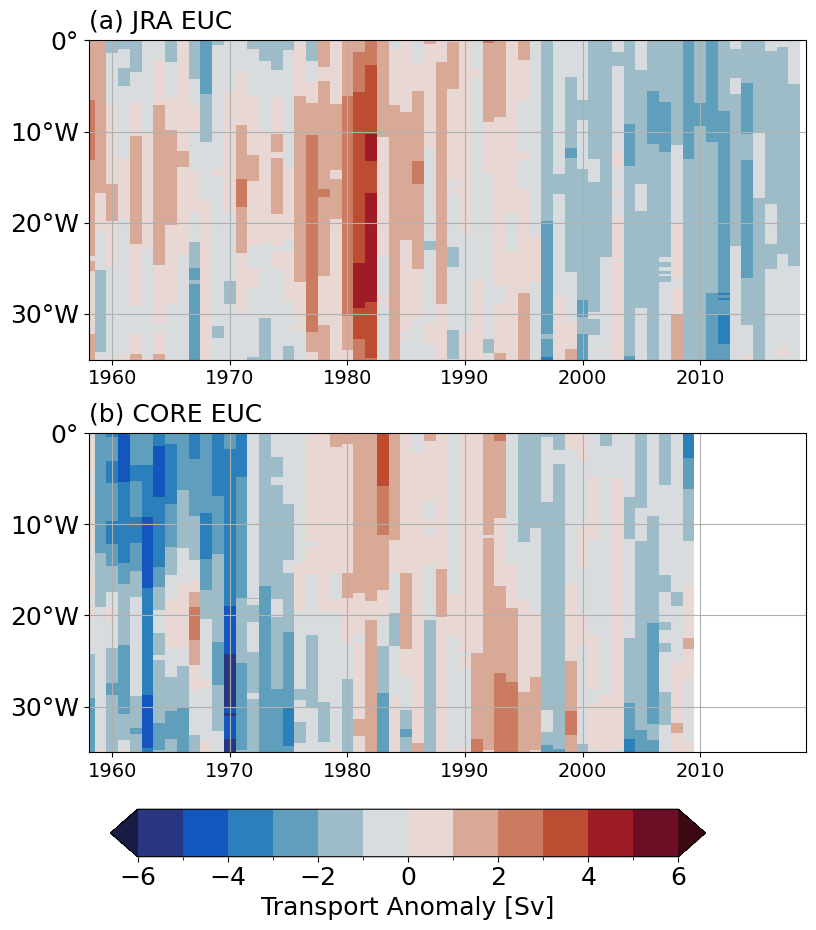

In [62]:
ylim_plot = [1958,2019]
fig1 = plot_annual_anomalie(EUC_JRA_A.INT,EUC_CORE_A.INT,'INT',[-35,0],[-30,-20,-10,0],('30°W','20°W','10°W','0°'),-6,6,13,ylim_plot,title=['(a) JRA EUC','(b) CORE EUC'])
fig1.savefig((out_dir_fig / f"EUC_INT_anomaly_climJ{tlim_min_J}_{tlim_max_J}_climC{tlim_min_C}_{tlim_max_C}_ylim{ylim_plot[0]}_{ylim_plot[1]}{fig_format}"),dpi=300,bbox_inches='tight')

2024-01-29 11:20:45,403 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-01-29 11:20:47,289 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2024-01-29 11:21:06,907 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2024-01-29 11:21:22,553 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2024-01-29 11:21:25,846 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-01-29 11:21:42,976 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-01-29 11:21:53,722 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-01-29 11:22:01,067 - distributed.utils_perf - WARNING - full garbage collections took

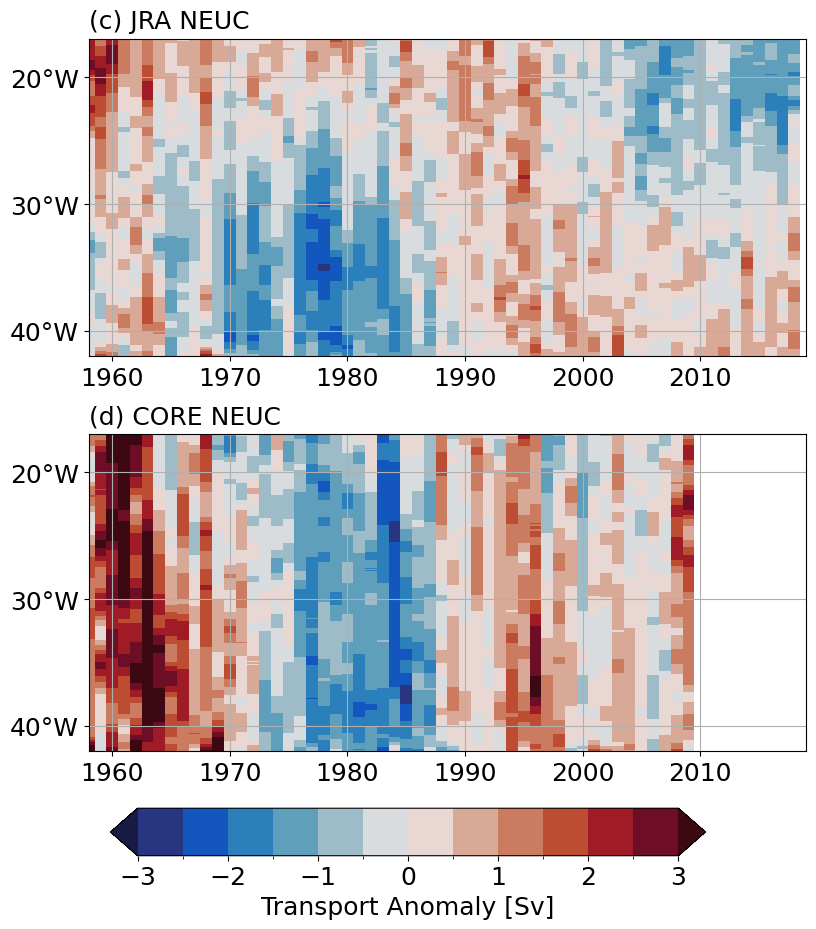

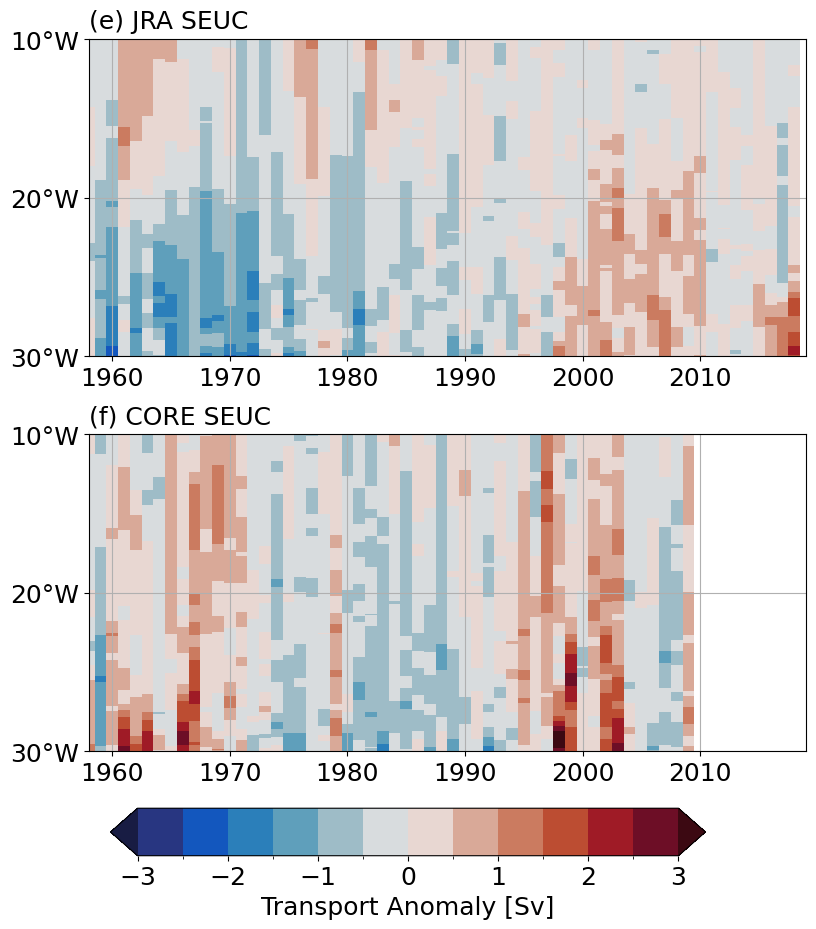

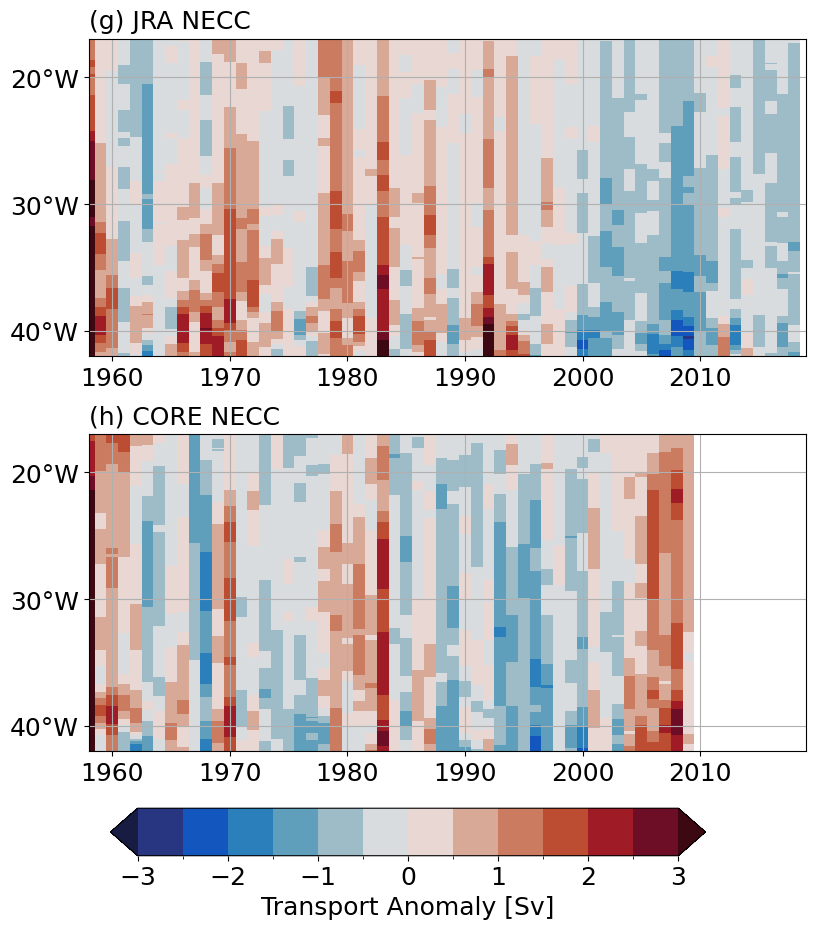

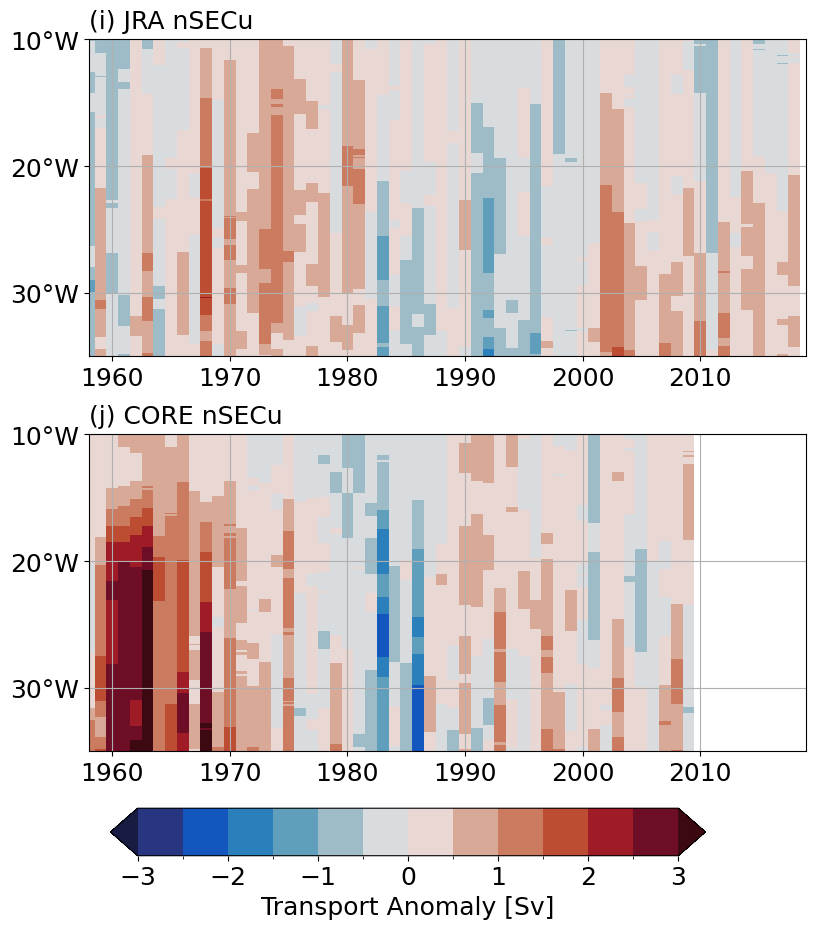

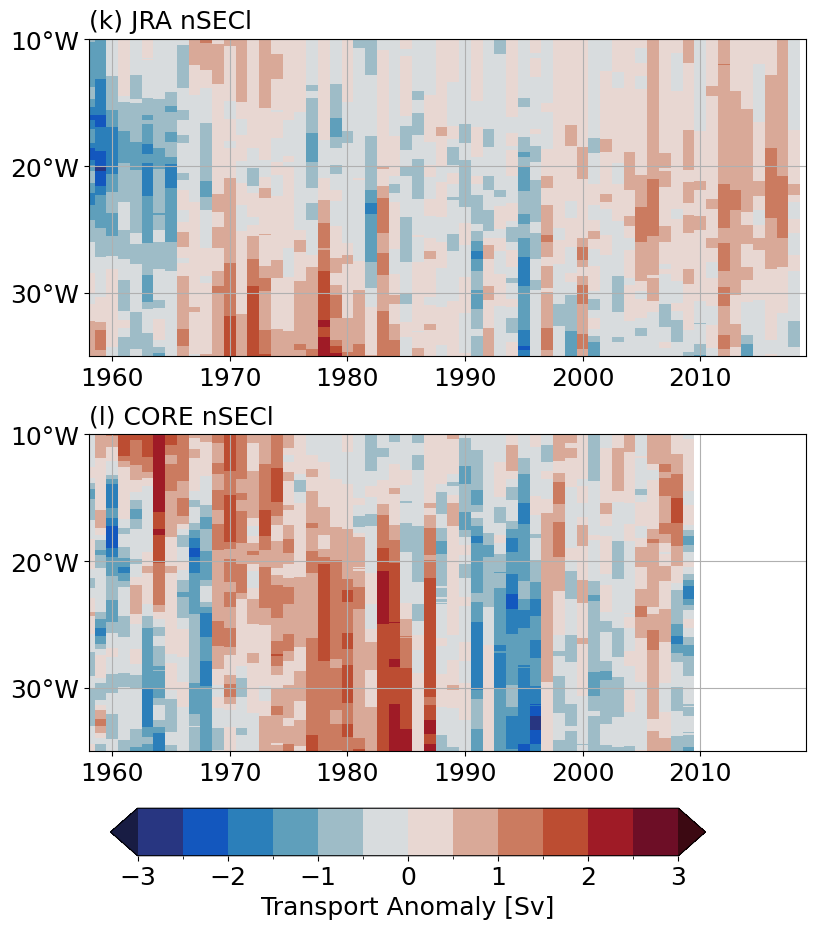

In [63]:
fig2 = plot_annual_anomalie(NEUC_JRA_A.INT,NEUC_CORE_A.INT,'INT',[-42,-17],[-40,-30,-20],('40°W','30°W','20°W'),-3,3,13,ylim_plot,title=['(c) JRA NEUC','(d) CORE NEUC'])
fig3 = plot_annual_anomalie(SEUC_JRA_A.INT,SEUC_CORE_A.INT,'INT',[-30,-10],[-30,-20,-10],('30°W','20°W','10°W'),-3,3,13,ylim_plot,title=['(e) JRA SEUC','(f) CORE SEUC'])
fig4 = plot_annual_anomalie(NECC_JRA_A.INT,NECC_CORE_A.INT,'INT',[-42,-17],[-40,-30,-20],('40°W','30°W','20°W'),-3,3,13,ylim_plot,title=['(g) JRA NECC','(h) CORE NECC'])
fig5 = plot_annual_anomalie(nSECu_JRA_A.INT,nSECu_CORE_A.INT,'INT',[-35,-10],[-30,-20,-10],('30°W','20°W','10°W'),-3,3,13,ylim_plot,title=['(i) JRA nSECu','(j) CORE nSECu'])
fig6 = plot_annual_anomalie(nSECl_JRA_A.INT,nSECl_CORE_A.INT,'INT',[-35,-10],[-30,-20,-10],('30°W','20°W','10°W'),-3,3,13,ylim_plot,title=['(k) JRA nSECl','(l) CORE nSECl'])
if savefig:
    fig2.savefig((out_dir_fig / f"NEUC_INT_anomaly_climJ{tlim_min_J}_{tlim_max_J}_climC{tlim_min_C}_{tlim_max_C}_ylim{ylim_plot[0]}_{ylim_plot[1]}{fig_format}"),dpi=300,bbox_inches='tight')
    fig3.savefig((out_dir_fig / f"SEUC_INT_anomaly_climJ{tlim_min_J}_{tlim_max_J}_climC{tlim_min_C}_{tlim_max_C}_ylim{ylim_plot[0]}_{ylim_plot[1]}{fig_format}"),dpi=300,bbox_inches='tight')
    fig4.savefig((out_dir_fig / f"NECC_INT_anomaly_climJ{tlim_min_J}_{tlim_max_J}_climC{tlim_min_C}_{tlim_max_C}_ylim{ylim_plot[0]}_{ylim_plot[1]}{fig_format}"),dpi=300,bbox_inches='tight')
    fig5.savefig((out_dir_fig / f"nSECu_INT_anomaly_climJ{tlim_min_J}_{tlim_max_J}_climC{tlim_min_C}_{tlim_max_C}_ylim{ylim_plot[0]}_{ylim_plot[1]}{fig_format}"),dpi=300,bbox_inches='tight')
    fig6.savefig((out_dir_fig / f"nSECl_INT_anomaly_climJ{tlim_min_J}_{tlim_max_J}_climC{tlim_min_C}_{tlim_max_C}_ylim{ylim_plot[0]}_{ylim_plot[1]}{fig_format}"),dpi=300,bbox_inches='tight')

2024-01-29 11:23:49,257 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-01-29 11:24:07,527 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-01-29 11:24:16,877 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-01-29 11:24:26,016 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-01-29 11:24:44,348 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-01-29 11:24:55,078 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-01-29 11:25:03,265 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-01-29 11:25:22,243 - distributed.utils_perf - WARNING - full garbage collections took

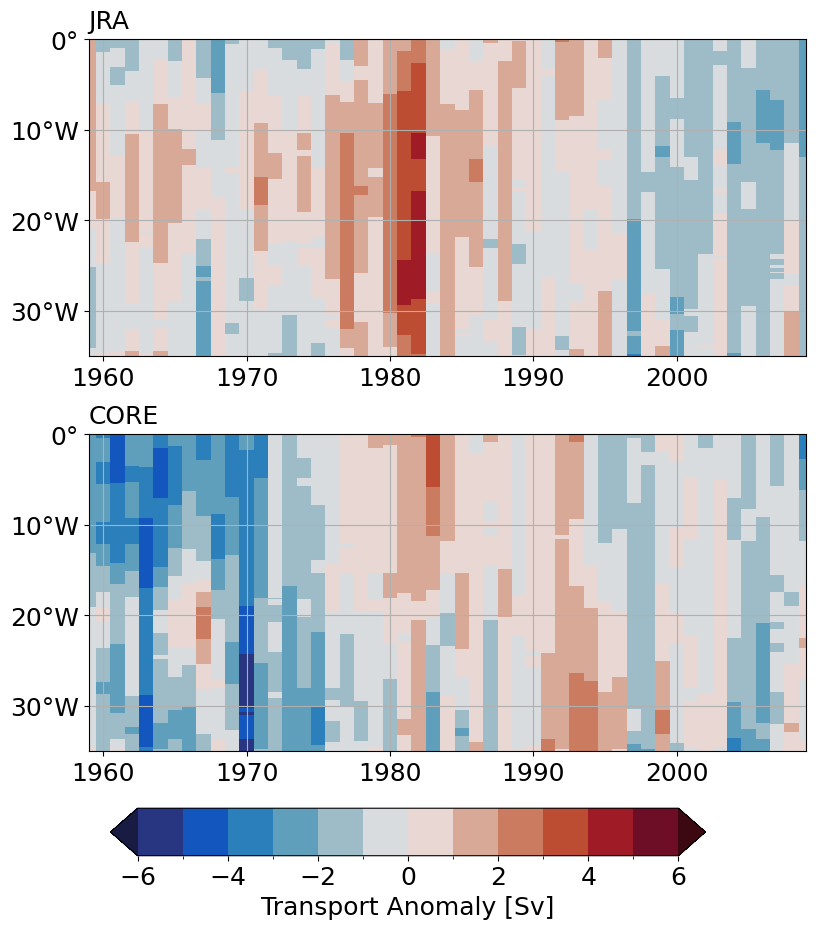

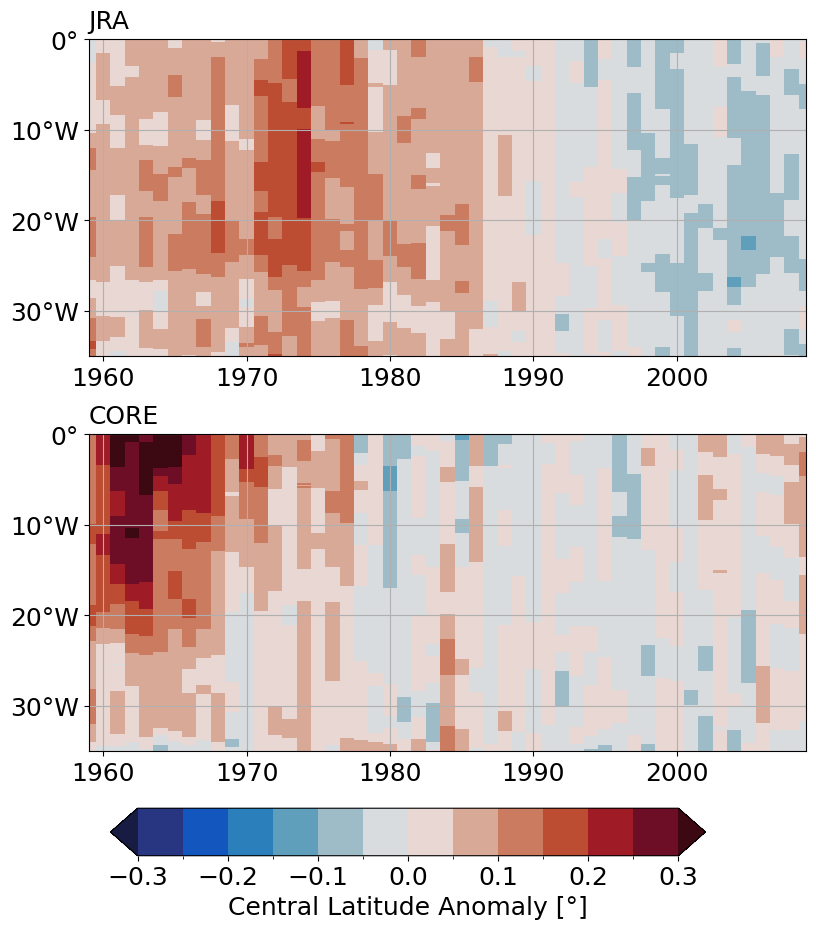

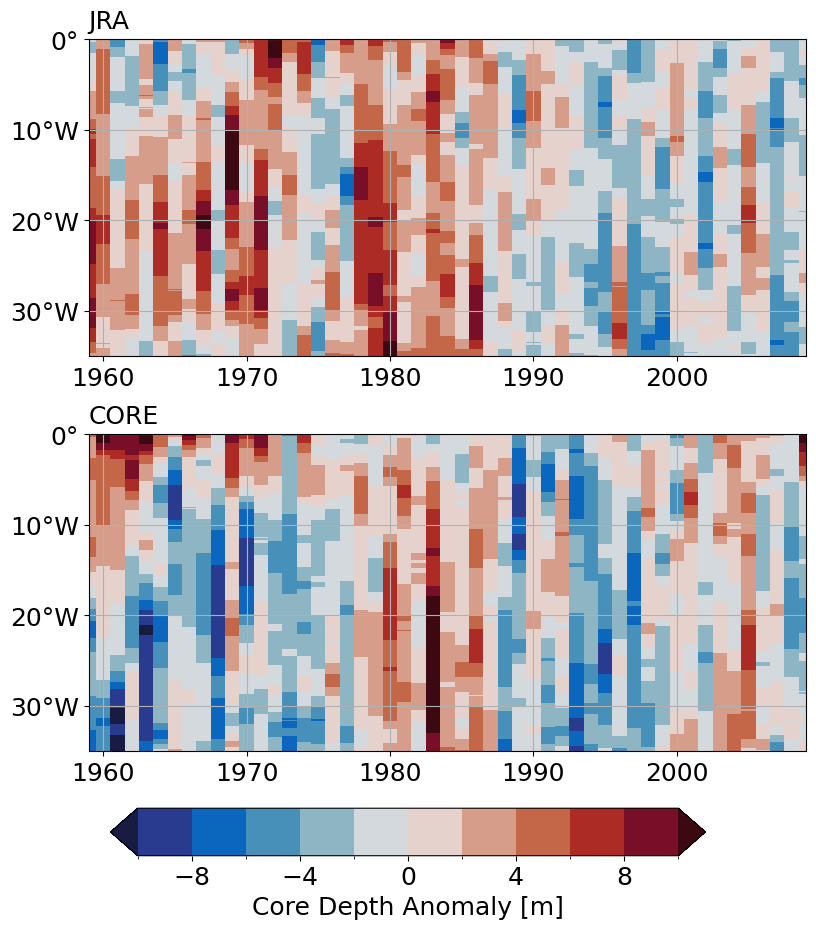

In [64]:
fig1 = plot_annual_anomalie(EUC_JRA_A.INT,EUC_CORE_A.INT,'INT',[-35,0],[-30,-20,-10,0],('30°W','20°W','10°W','0°'),-6,6,13,[1959,2009])
fig2 = plot_annual_anomalie(EUC_JRA_A.Y_CM,EUC_CORE_A.Y_CM,'YCM',[-35,0],[-30,-20,-10,0],('30°W','20°W','10°W','0°'),-.3,.3,13,[1959,2009])
fig3 = plot_annual_anomalie(EUC_JRA_A.Z_CM,EUC_CORE_A.Z_CM,'ZCM',[-35,0],[-30,-20,-10,0],('30°W','20°W','10°W','0°'),-10,10,11,[1959,2009])
if savefig:
    fig1.savefig((out_dir_fig / f"EUC_INT_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')
    fig2.savefig((out_dir_fig / f"EUC_YCM_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')
    fig3.savefig((out_dir_fig / f"EUC_ZCM_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')

2024-01-29 11:25:44,202 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-01-29 11:26:02,019 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-01-29 11:26:11,566 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-01-29 11:26:20,609 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-01-29 11:26:38,320 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-01-29 11:26:48,610 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-01-29 11:26:56,572 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-01-29 11:27:11,082 - distributed.utils_perf - WARNING - full garbage collections took

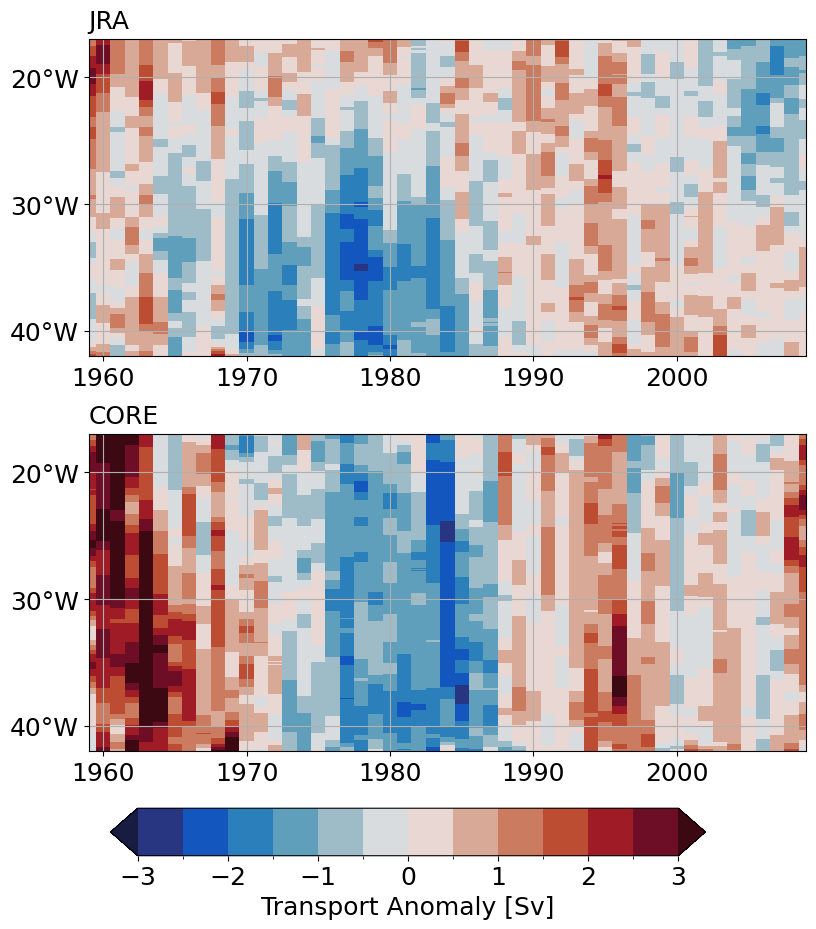

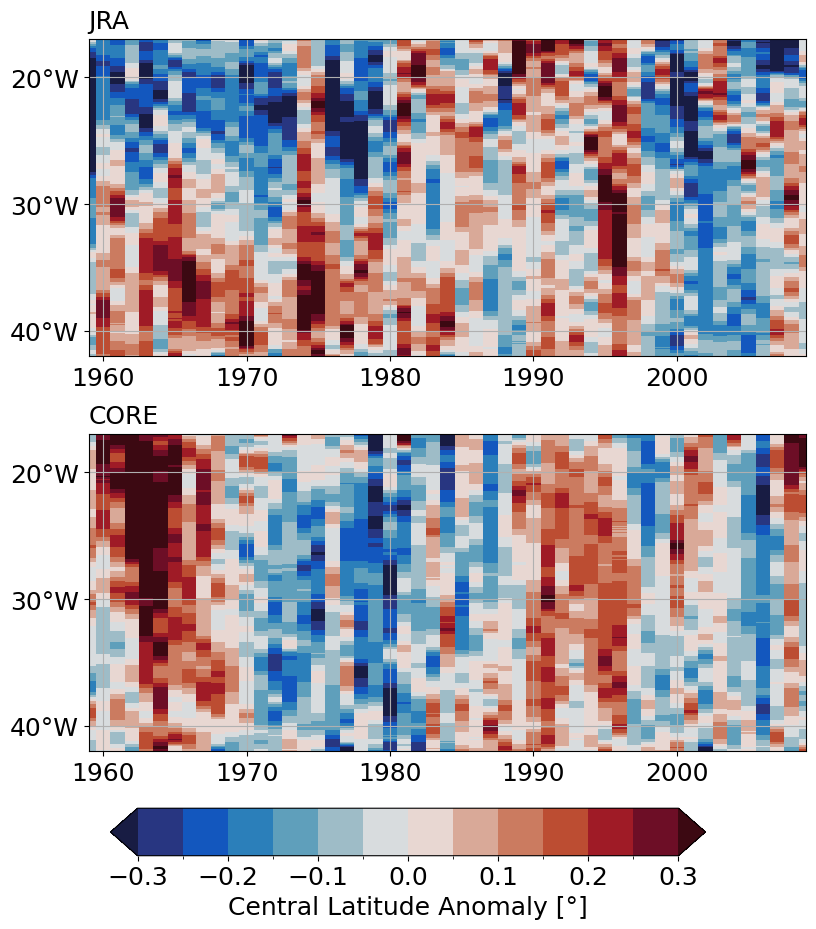

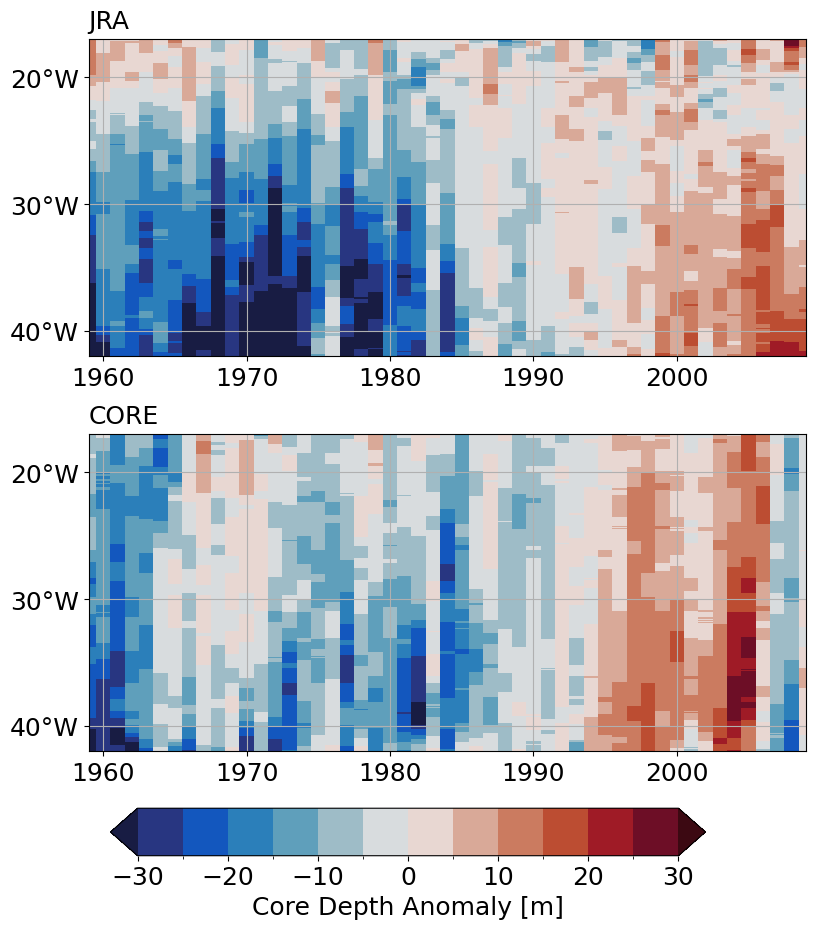

In [65]:
fig1 = plot_annual_anomalie(NEUC_JRA_A.INT,NEUC_CORE_A.INT,'INT',[-42,-17],[-40,-30,-20],('40°W','30°W','20°W'),-3,3,13,[1959,2009])
fig2 = plot_annual_anomalie(NEUC_JRA_A.Y_CM,NEUC_CORE_A.Y_CM,'YCM',[-42,-17],[-40,-30,-20],('40°W','30°W','20°W'),-.3,.3,13,[1959,2009])
fig3 = plot_annual_anomalie(NEUC_JRA_A.Z_CM,NEUC_CORE_A.Z_CM,'ZCM',[-42,-17],[-40,-30,-20],('40°W','30°W','20°W'),-30,30,13,[1959,2009])
if savefig:
    fig1.savefig((out_dir_fig / f"NEUC_INT_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')
    fig2.savefig((out_dir_fig / f"NEUC_YCM_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')
    fig3.savefig((out_dir_fig / f"NEUC_ZCM_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')

2024-01-29 11:27:34,521 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-01-29 11:27:36,252 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2024-01-29 11:27:38,334 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2024-01-29 11:27:39,703 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2024-01-29 11:27:41,323 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2024-01-29 11:27:43,110 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2024-01-29 11:27:45,047 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2024-01-29 11:27:47,241 - distributed.utils_perf - WARNING - full garbage collections took

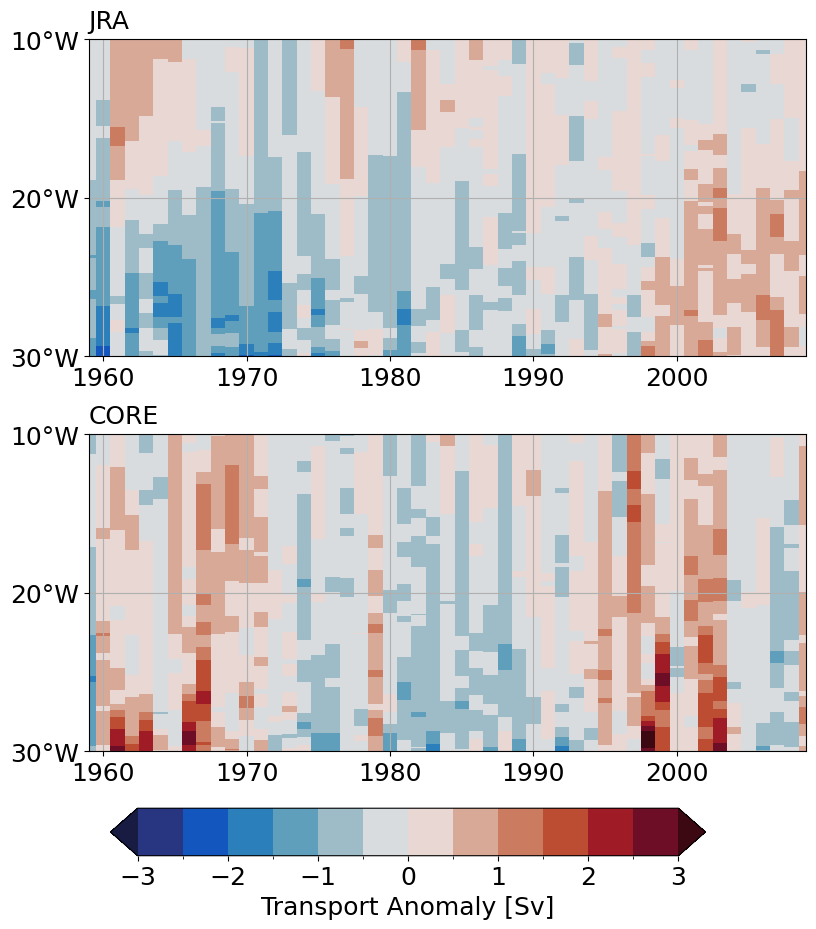

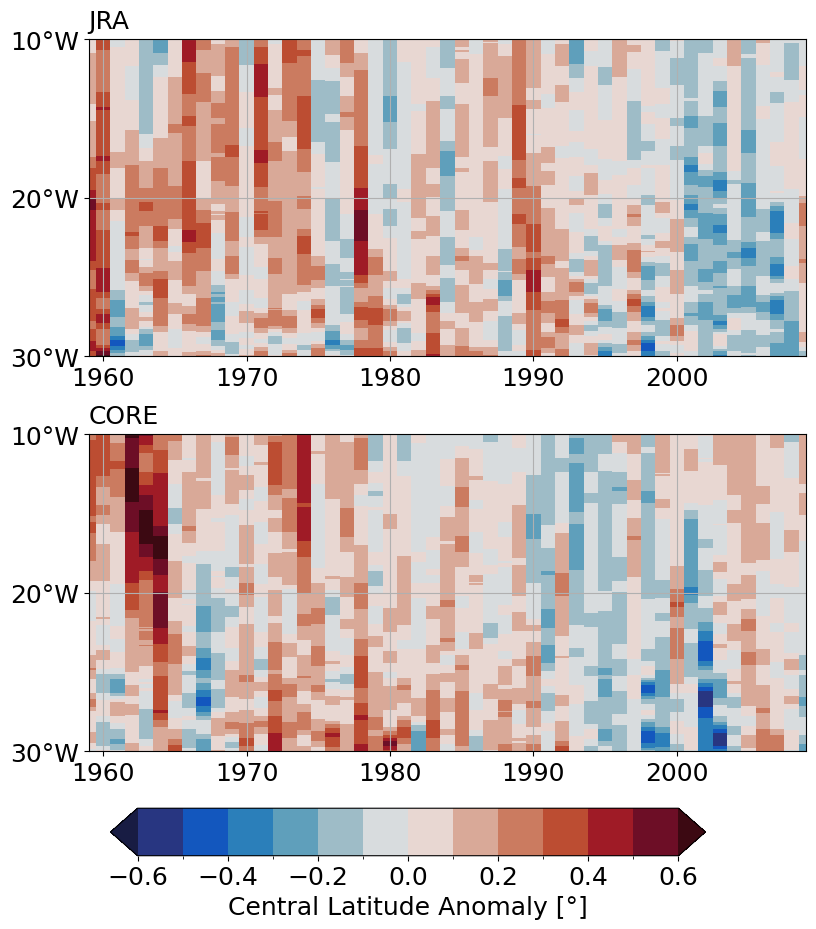

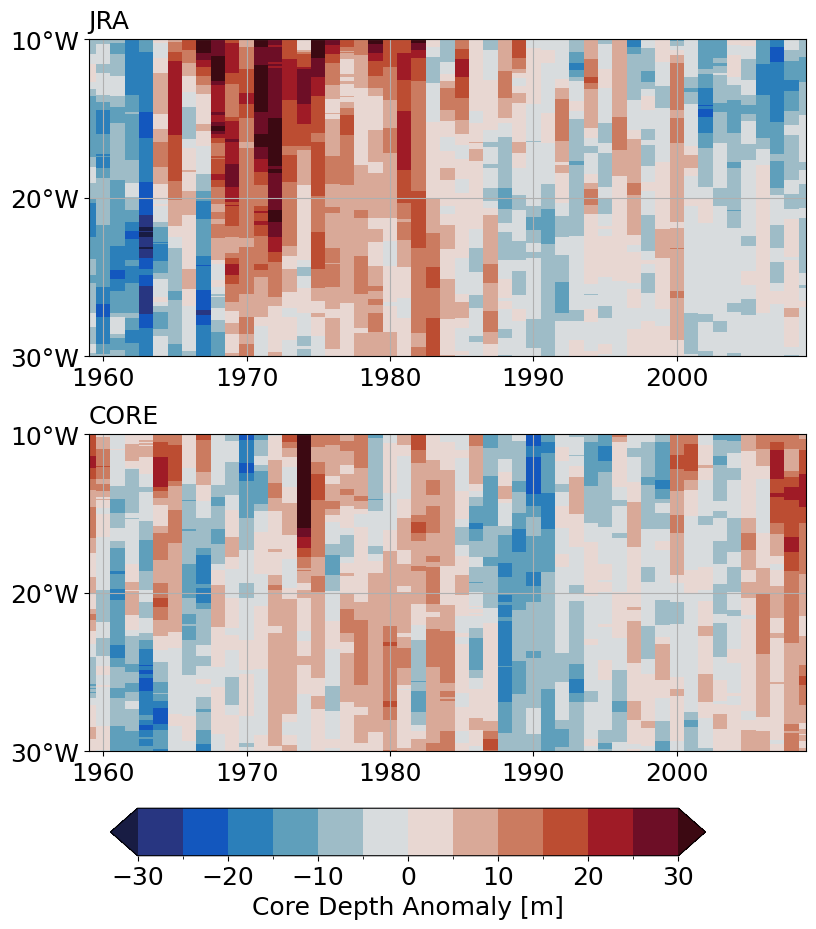

In [66]:
fig1 = plot_annual_anomalie(SEUC_JRA_A.INT,SEUC_CORE_A.INT,'INT',[-30,-10],[-30,-20,-10],('30°W','20°W','10°W'),-3,3,13,[1959,2009])
fig2 = plot_annual_anomalie(SEUC_JRA_A.Y_CM,SEUC_CORE_A.Y_CM,'YCM',[-30,-10],[-30,-20,-10],('30°W','20°W','10°W'),-.6,.6,13,[1959,2009])
fig3 = plot_annual_anomalie(SEUC_JRA_A.Z_CM,SEUC_CORE_A.Z_CM,'ZCM',[-30,-10],[-30,-20,-10],('30°W','20°W','10°W'),-30,30,13,[1959,2009])
if savefig:
    fig1.savefig((out_dir_fig / f"SEUC_INT_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')
    fig2.savefig((out_dir_fig / f"SEUC_YCM_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')
    fig3.savefig((out_dir_fig / f"SEUC_ZCM_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')

2024-01-29 11:29:27,858 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-01-29 11:29:28,539 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:29:30,096 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:29:31,789 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:29:33,326 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:29:35,016 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:29:36,810 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-01-29 11:29:38,974 - distributed.utils_perf - WARNING - full garbage collections took

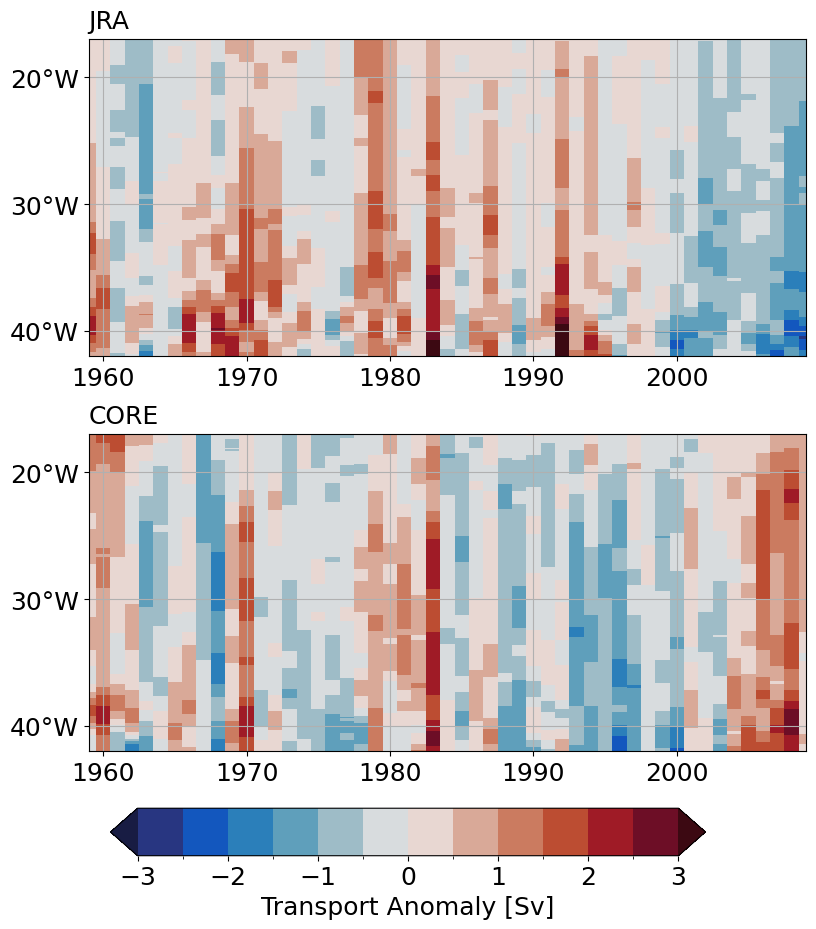

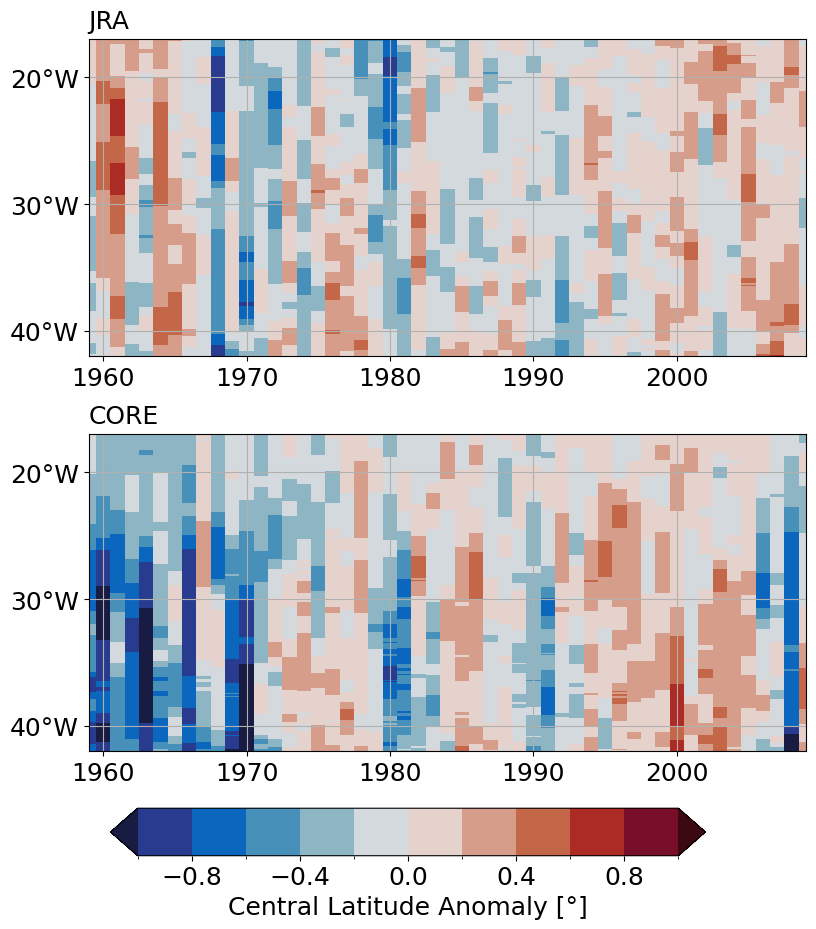

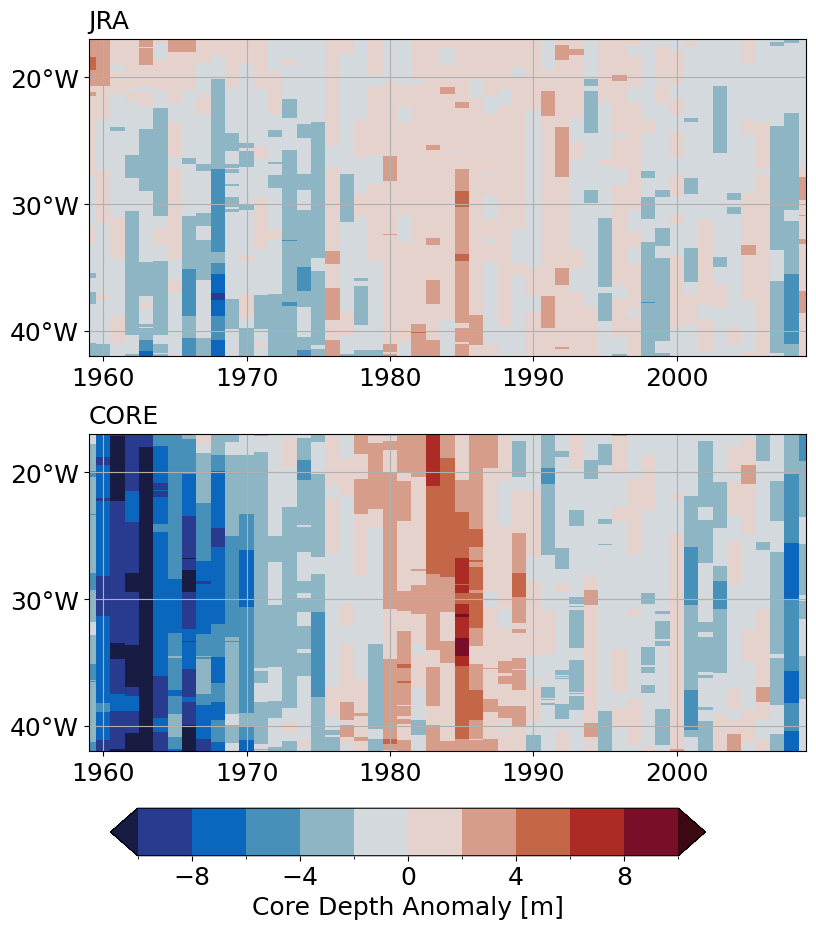

In [67]:
fig1 = plot_annual_anomalie(NECC_JRA_A.INT,NECC_CORE_A.INT,'INT',[-42,-17],[-40,-30,-20],('40°W','30°W','20°W'),-3,3,13,[1959,2009])
fig2 = plot_annual_anomalie(NECC_JRA_A.Y_CM,NECC_CORE_A.Y_CM,'YCM',[-42,-17],[-40,-30,-20],('40°W','30°W','20°W'),-1,1,11,[1959,2009])
fig3 = plot_annual_anomalie(NECC_JRA_A.Z_CM,NECC_CORE_A.Z_CM,'ZCM',[-42,-17],[-40,-30,-20],('40°W','30°W','20°W'),-10,10,11,[1959,2009])
if savefig:
    fig1.savefig((out_dir_fig / f"NECC_INT_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')
    fig2.savefig((out_dir_fig / f"NECC_YCM_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')
    fig3.savefig((out_dir_fig / f"NECC_ZCM_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')

2024-01-29 11:31:21,935 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-01-29 11:31:41,486 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-01-29 11:31:54,547 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-01-29 11:31:59,692 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-01-29 11:32:18,082 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-01-29 11:32:33,443 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-01-29 11:32:36,951 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-01-29 11:32:54,987 - distributed.utils_perf - WARNING - full garbage collections took

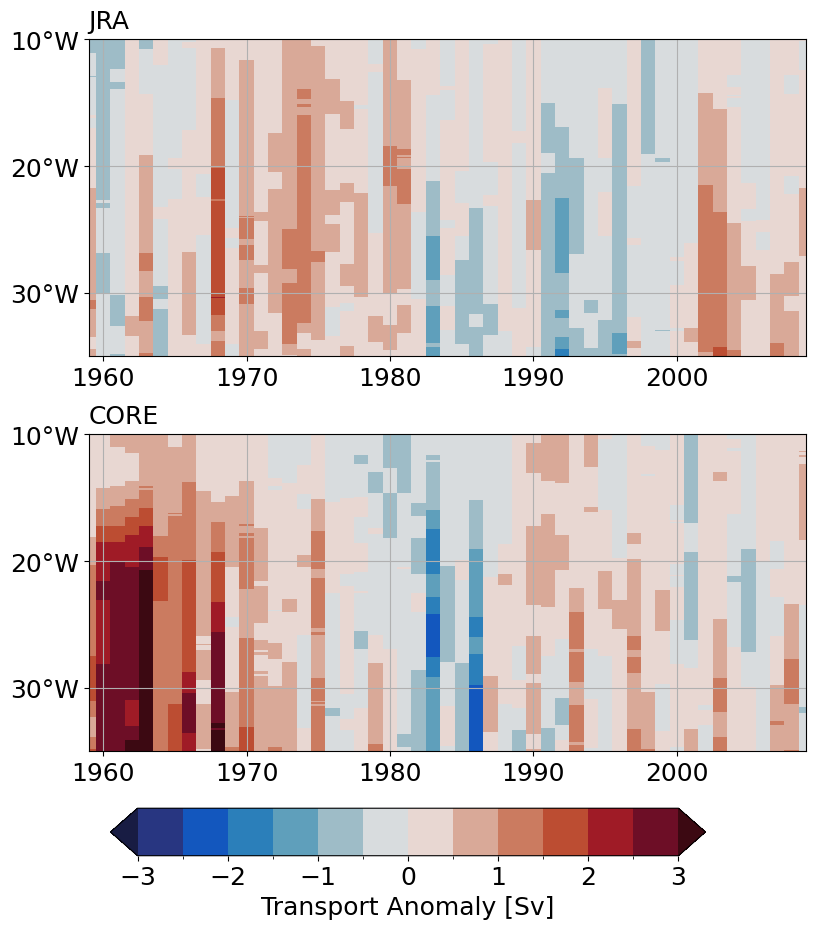

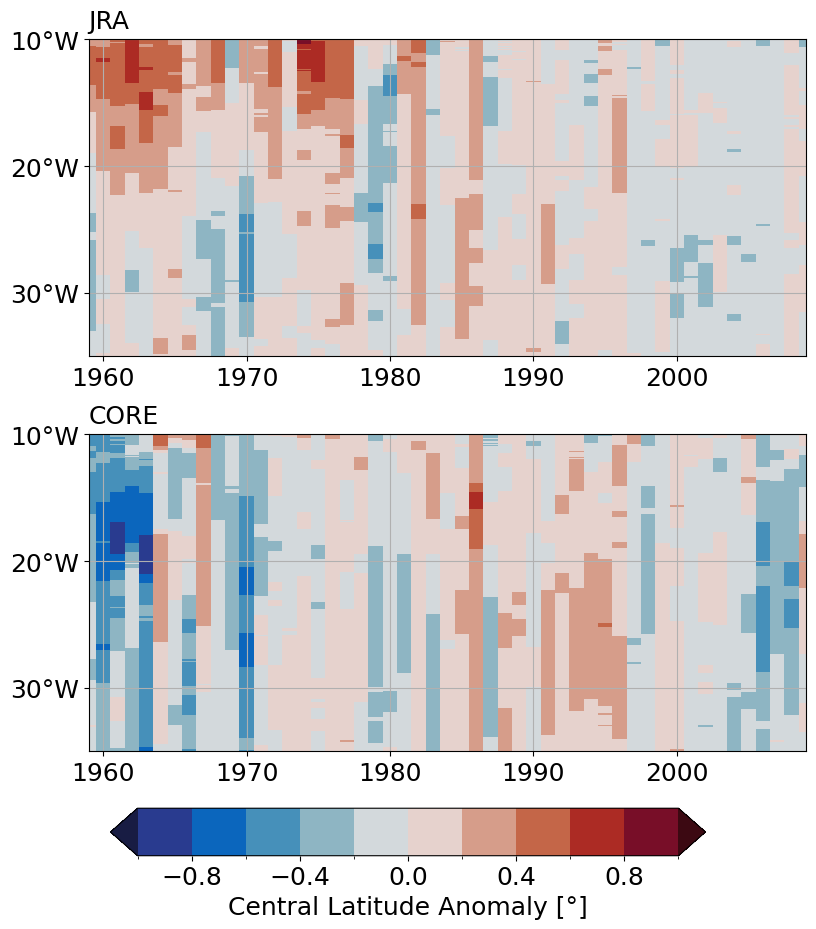

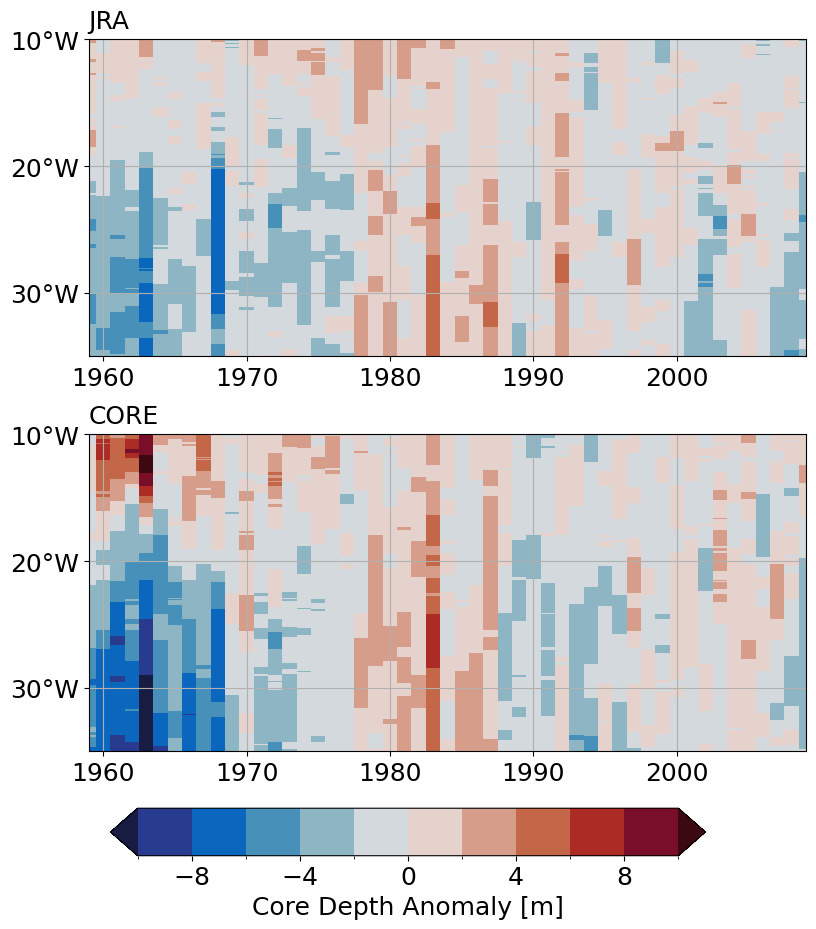

In [68]:
fig1 = plot_annual_anomalie(nSECu_JRA_A.INT,nSECu_CORE_A.INT,'INT',[-35,-10],[-30,-20,-10],('30°W','20°W','10°W'),-3,3,13,[1959,2009])
fig2 = plot_annual_anomalie(nSECu_JRA_A.Y_CM,nSECu_CORE_A.Y_CM,'YCM',[-35,-10],[-30,-20,-10],('30°W','20°W','10°W'),-1,1,11,[1959,2009])
fig3 = plot_annual_anomalie(nSECu_JRA_A.Z_CM,nSECu_CORE_A.Z_CM,'ZCM',[-35,-10],[-30,-20,-10],('30°W','20°W','10°W'),-10,10,11,[1959,2009])
if savefig:
    fig1.savefig((out_dir_fig / f"nSECu_INT_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')
    fig2.savefig((out_dir_fig / f"nSECu_YCM_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')
    fig3.savefig((out_dir_fig / f"nSECu_ZCM_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')

2024-01-29 11:33:12,474 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-01-29 11:33:15,276 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-01-29 11:33:36,401 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-01-29 11:33:47,354 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-01-29 11:33:55,262 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-01-29 11:34:13,295 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-01-29 11:34:27,775 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-01-29 11:34:31,403 - distributed.utils_perf - WARNING - full garbage collections took

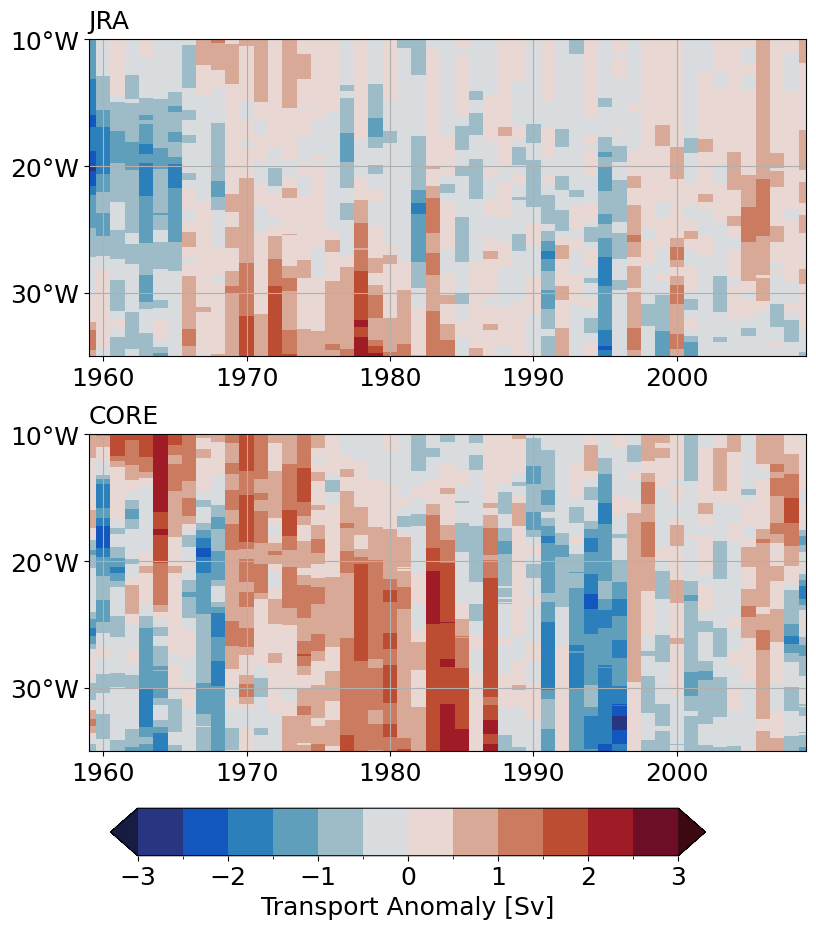

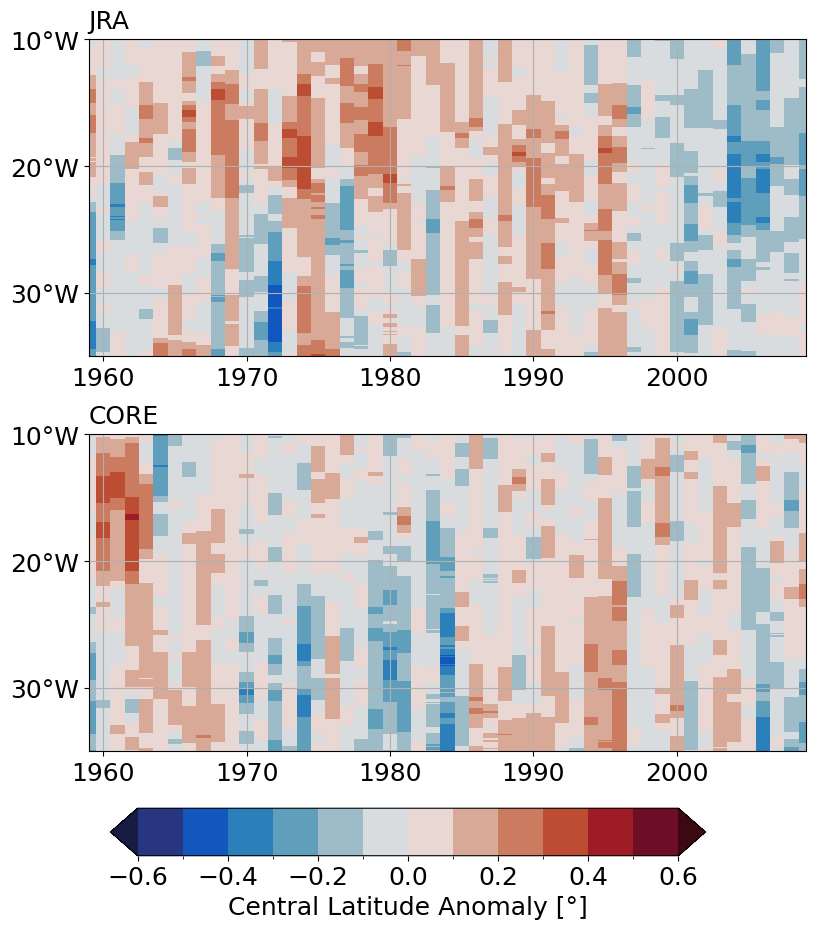

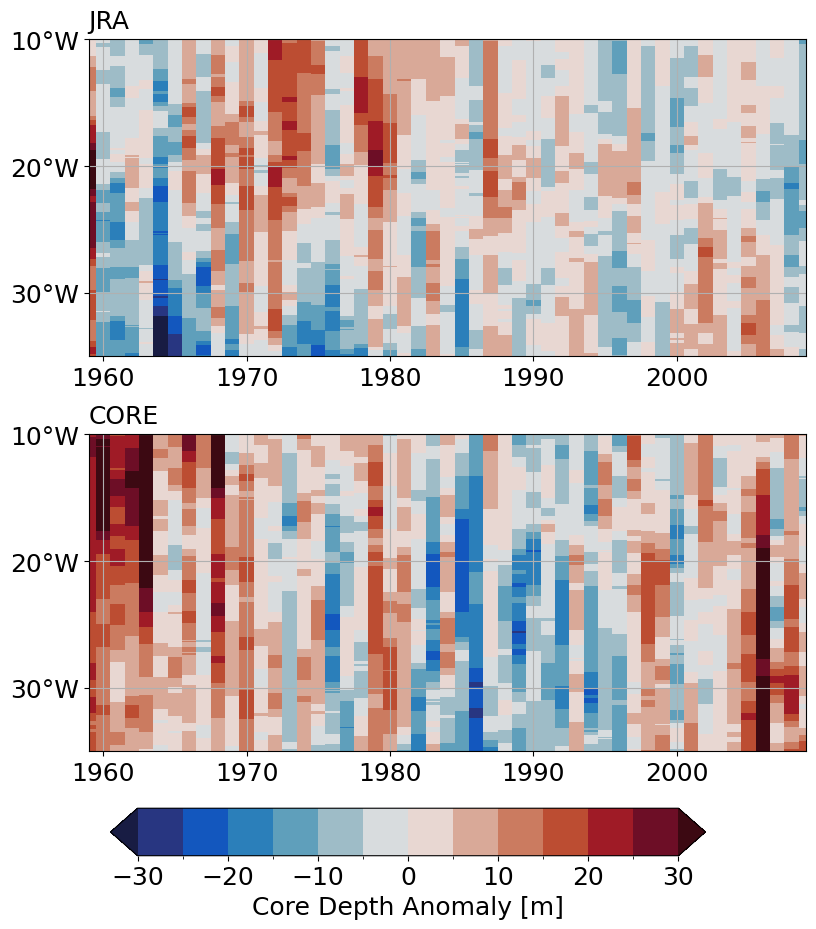

In [69]:
fig1 = plot_annual_anomalie(nSECl_JRA_A.INT,nSECl_CORE_A.INT,'INT',[-35,-10],[-30,-20,-10],('30°W','20°W','10°W'),-3,3,13,[1959,2009])
fig2 = plot_annual_anomalie(nSECl_JRA_A.Y_CM,nSECl_CORE_A.Y_CM,'YCM',[-35,-10],[-30,-20,-10],('30°W','20°W','10°W'),-.6,.6,13,[1959,2009])
fig3 = plot_annual_anomalie(nSECl_JRA_A.Z_CM,nSECl_CORE_A.Z_CM,'ZCM',[-35,-10],[-30,-20,-10],('30°W','20°W','10°W'),-30,30,13,[1959,2009])
if savefig:
    fig1.savefig((out_dir_fig / f"nSECl_INT_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')
    fig2.savefig((out_dir_fig / f"nSECl_YCM_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')
    fig3.savefig((out_dir_fig / f"nSECl_ZCM_anomaly_JRA{tlim_min_J}_{tlim_max_J}_CORE{tlim_min_C}_{tlim_max_C}{fig_format}"),dpi=300,bbox_inches='tight')